In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from pathlib import Path

import sys
sys.path.append('../../')

import phys_ml.visualization.vertex_visualization as vertvis
from phys_ml.analysis.vertex import *
from phys_ml.evaluation import vertex as verteval
from phys_ml.load_data.vertex import *
from phys_ml.trainer.vertex import *
from phys_ml.util import slurm_generate

In [ ]:
# back_up existing info_files
info_fn = 'eval_info.pkl'
verteval.backup_info(info_fn)

## dev

In [ ]:
###############    TEST RUN    ################
info_fn = 'eval_info_test.pkl'
info_test = verteval.load_info_dict(info_fn)
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': 2000, 'test_ratio': 0.33, 'epochs': 5,
                                           'subset': 3, 'subset_shuffle': False})

In [ ]:
verteval.eval_train(trainer, info_test, info_fn, [128, 64, 32])

In [ ]:
!pip show lightning

In [ ]:
!pip show torch

## slurm

In [ ]:
# config
base_dir = '/gpfs/data/fs71925/shepp123/'
sample_count = int((2000 * 576 * 3) / (24 * 6))
hidden_dims = [128, 64, 32]
trainer_kwargs = {
    'config_name': 'confmod_auto_encoder.json', 
    'subconfig_name': 'AUTO_ENCODER_VERTEX_24X6', 
    'config_kwargs': {
        'path_train': base_dir + 'frgs_6d',
        'hidden_dims': hidden_dims,
        'epochs': 100,
        'sample_count_per_vertex': sample_count, 
        'test_ratio': 0.2, 
        'subset': -1, 
        'subset_shuffle': False, 
        'devices': 'auto', 
        'device_type': 'gpu', 
        'num_dataloader_workers': 8, 
        'batch_size': 2048,
    }
}
slurm_options = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2', time='00:10:00')
slurm_kwargs = {'project_name': 'vertex_24x6', 'pyenv_dir': base_dir + 'pyenv', 
                'trainer': 'vertex.VertexTrainer24x6', 'slurm_options': slurm_options, 'trainer_kwargs': trainer_kwargs}

In [ ]:
# test run
slurm_options_dev = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2_devel', time='00:10:00')
slurm_generate.create(project_name='vertex_24x6', script_name='vsc_test', 
                      pyenv_dir= base_dir + 'PhysML/.venv', slurm_options=slurm_options_dev, 
                      trainer='vertex.VertexTrainer24x6', trainer_kwargs=trainer_kwargs)

In [ ]:
# 02: high samples, high epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = sample_count
trainer_kwargs['config_kwargs']['batch_size'] = 8192
trainer_kwargs['config_kwargs']['epochs'] = 1000
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 15
slurm_options.time = '01:30:00'
slurm_generate.create(script_name='s24000_e1000', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: high samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = sample_count
trainer_kwargs['config_kwargs']['batch_size'] = 8192
trainer_kwargs['config_kwargs']['epochs'] = 100
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 15
slurm_options.time = '00:15:00'
slurm_generate.create(script_name='s24000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, high epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 4096
trainer_kwargs['config_kwargs']['epochs'] = 1000
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 8
slurm_options.time = '00:10:00'
slurm_generate.create(script_name='s2000_e1000', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 4096
trainer_kwargs['config_kwargs']['epochs'] = 100
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 8
slurm_options.time = '00:05:00'
slurm_generate.create(script_name='s2000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32]
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = ?
trainer_kwargs['config_kwargs']['batch_size'] = ?
trainer_kwargs['config_kwargs']['epochs'] = ?
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32]
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = ?
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 16]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 16]
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32_16', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 8]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 8]
slurm_generate.create(script_name='128_64_32_8', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 32, 16, 4]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 32, 16, 4]
slurm_generate.create(script_name='128_32_16_4', **slurm_kwargs)
# job-id:
# dir:

# 01 Full training

* training on all vertices
* 24,000 samples -> with smaller sample-vectors (size=144) of the 24^6-vertex this results in same amount of data points as training on 576^3-vertex with 2000 samples

In [ ]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
sample_count = int((2000 * 576 * 3) / (24 * 6))
config_kwargs={'path_train': '../../../frgs_6d', 
               'hidden_dims': [128, 64, 32],
               'epochs': 100,
               'sample_count_per_vertex': sample_count, 
               'test_ratio': 0.2, 
               'subset': None, 
               'subset_shuffle': False, 
               'devices': 'auto', 
               'num_dataloader_workers': 4, 
               'strategy': 'auto', 
               'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32], resume=True, version=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 41004: 'val_loss' reached 0.04766 (best 0.04766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=0-step=41004.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 1, global step 82008: 'val_loss' reached

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 123012: 'val_loss' reached 0.01302 (best 0.01302), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=2-step=123012.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 164016: 'val_loss' reached 0.00906 (best 0.00906), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=3-step=164016.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 205020: 'val_loss' reached 0.00633 (best 0.00633), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=4-step=205020.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 246024: 'val_loss' reached 0.00421 (best 0.00421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=5-step=246024.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 287028: 'val_loss' reached 0.00266 (best 0.00266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=6-step=287028.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 328032: 'val_loss' reached 0.00163 (best 0.00163), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=7-step=328032.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 369036: 'val_loss' reached 0.00122 (best 0.00122), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=8-step=369036.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 410040: 'val_loss' reached 0.00084 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=9-step=410040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 10, global step 451044: 'val_loss' reached 0.00119 (best 0.00084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=10-step=451044.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 492048: 'val_loss' reached 0.00029 (best 0.00029), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=11-step=492048.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 533052: 'val_loss' reached 0.00019 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=12-step=533052.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 574056: 'val_loss' reached 0.00020 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=13-step=574056.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 615060: 'val_loss' reached 0.00022 (best 0.00019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=14-step=615060.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 15, global step 656064: 'val_loss' reached 0.00010 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=15-step=656064.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 697068: 'val_loss' reached 0.00012 (best 0.00010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=16-step=697068.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 738072: 'val_loss' reached 0.00009 (best 0.00009), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=17-step=738072.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 779076: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=18-step=779076.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 820080: 'val_loss' reached 0.00011 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=19-step=820080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 861084: 'val_loss' reached 0.00026 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=20-step=861084.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 21, global step 902088: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 943092: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=22-step=943092.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 984096: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=23-step=984096.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1025100: 'val_loss' reached 0.00020 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=24-step=1025100.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1066104: 'val_loss' reached 0.00014 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=25-step=1066104.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1107108: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=26-step=1107108.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1148112: 'val_loss' reached 0.00013 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=27-step=1148112.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1189116: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=28-step=1189116.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1230120: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=29-step=1230120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1271124: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1312128: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1353132: 'val_loss' reached 0.00010 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=32-step=1353132.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1394136: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1435140: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=34-step=1435140.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1476144: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1517148: 'val_loss' reached 0.00009 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=36-step=1517148.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1558152: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1599156: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1640160: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=39-step=1640160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1681164: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1722168: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1763172: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1804176: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 44, global step 1845180: 'val_loss' reached 0.00007 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=44-step=1845180.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1886184: 'val_loss' reached 0.00008 (best 0.00007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=45-step=1886184.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1927188: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 47, global step 1968192: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2009196: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2050200: 'val_loss' reached 0.00006 (best 0.00006), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=49-step=2050200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2091204: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2173212: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=52-step=2173212.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2214216: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2255220: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2296224: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=55-step=2296224.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 56, global step 2337228: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2378232: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2419236: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2501244: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 2542248: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 62, global step 2583252: 'val_loss' was 

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 2624256: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 2665260: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=64-step=2665260.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 2706264: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 2747268: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 2788272: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2829276: 'val_loss' reached 0.00005 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=68-step=2829276.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2870280: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=69-step=2870280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2911284: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2952288: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2993292: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3034296: 'val_loss' reached 0.00006 (best 0.00005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=73-step=3034296.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3075300: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3116304: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3157308: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3198312: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3239316: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3280320: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3321324: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 3362328: 'val_loss' reached 0.00004 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=81-step=3362328.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 3403332: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=82-step=3403332.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 3444336: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 3485340: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 3526344: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 3567348: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 3649356: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 3690360: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3731364: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3813372: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3854376: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3895380: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3936384: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 3977388: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4018392: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4059396: 'val_loss' reached 0.00005 (best 0.00004), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=98-step=4059396.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4100400: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16], resume=True, version=6)

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=89-step=3690360.ckpt'
 >>> Loaded checkpoint


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints exists and is not empty.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=89-step=3690360.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3739320: 'val_loss' reached 0.00611 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=90-step=3739320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 3788280: 'val_loss' reached 0.00600 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=91-step=3788280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3837240: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3886200: 'val_loss' reached 0.00598 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=93-step=3886200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3935160: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3984120: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4033080: 'val_loss' reached 0.00604 (best 0.00591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=96-step=4033080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4082040: 'val_loss' reached 0.00575 (best 0.00575), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=97-step=4082040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4131000: 'val_loss' reached 0.00586 (best 0.00575), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=98-step=4131000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4179960: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 16
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 48960: 'val_loss' reached 0.26078 (best 0.26078), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=0-step=48960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 97920: 'val_loss' reached 0.22823 (best 0.22823), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=1-step=97920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 146880: 'val_loss' reached 0.22066 (best 0.22066), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=2-step=146880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 3, global step 195840: 'val_loss' reached 0.18741 (best 0.18741), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=3-step=195840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 244800: 'val_loss' reached 0.16373 (best 0.16373), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=4-step=244800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 293760: 'val_loss' reached 0.15273 (best 0.15273), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=5-step=293760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 342720: 'val_loss' reached 0.14655 (best 0.14655), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=6-step=342720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 391680: 'val_loss' reached 0.13982 (best 0.13982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=7-step=391680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 440640: 'val_loss' reached 0.13571 (best 0.13571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=8-step=440640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 489600: 'val_loss' reached 0.13203 (best 0.13203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=9-step=489600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 538560: 'val_loss' reached 0.13214 (best 0.13203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=10-step=538560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 587520: 'val_loss' reached 0.12783 (best 0.12783), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=11-step=587520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 636480: 'val_loss' reached 0.12690 (best 0.12690), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=12-step=636480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 685440: 'val_loss' reached 0.12403 (best 0.12403), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=13-step=685440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 734400: 'val_loss' reached 0.12256 (best 0.12256), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=14-step=734400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 783360: 'val_loss' reached 0.12215 (best 0.12215), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=15-step=783360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 832320: 'val_loss' reached 0.12173 (best 0.12173), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=16-step=832320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 881280: 'val_loss' reached 0.11980 (best 0.11980), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=17-step=881280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 930240: 'val_loss' reached 0.11814 (best 0.11814), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=18-step=930240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 979200: 'val_loss' reached 0.11749 (best 0.11749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=19-step=979200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 1028160: 'val_loss' reached 0.12358 (best 0.11749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=20-step=1028160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 1077120: 'val_loss' reached 0.11608 (best 0.11608), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=21-step=1077120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 1126080: 'val_loss' reached 0.11562 (best 0.11562), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=22-step=1126080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 1175040: 'val_loss' reached 0.11446 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=23-step=1175040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1224000: 'val_loss' reached 0.11546 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=24-step=1224000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1272960: 'val_loss' reached 0.11506 (best 0.11446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=25-step=1272960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1321920: 'val_loss' reached 0.11431 (best 0.11431), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=26-step=1321920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1370880: 'val_loss' reached 0.11324 (best 0.11324), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=27-step=1370880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1419840: 'val_loss' reached 0.11505 (best 0.11324), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=28-step=1419840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1468800: 'val_loss' reached 0.11101 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=29-step=1468800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1517760: 'val_loss' reached 0.11382 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=30-step=1517760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1566720: 'val_loss' reached 0.11370 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=31-step=1566720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1615680: 'val_loss' reached 0.11172 (best 0.11101), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=32-step=1615680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1664640: 'val_loss' reached 0.10910 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=33-step=1664640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1713600: 'val_loss' reached 0.11095 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=34-step=1713600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1762560: 'val_loss' reached 0.11210 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=35-step=1762560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1811520: 'val_loss' reached 0.11011 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=36-step=1811520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1860480: 'val_loss' reached 0.11348 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=37-step=1860480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1909440: 'val_loss' reached 0.11124 (best 0.10910), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=38-step=1909440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1958400: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 2007360: 'val_loss' reached 0.10903 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=40-step=2007360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 2056320: 'val_loss' reached 0.10941 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=41-step=2056320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 2105280: 'val_loss' reached 0.10927 (best 0.10903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=42-step=2105280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 2154240: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 2203200: 'val_loss' reached 0.10674 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=44-step=2203200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 2252160: 'val_loss' reached 0.10919 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=45-step=2252160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 2301120: 'val_loss' reached 0.10816 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=46-step=2301120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 2350080: 'val_loss' reached 0.10967 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=47-step=2350080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 2399040: 'val_loss' reached 0.10873 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=48-step=2399040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2448000: 'val_loss' reached 0.10894 (best 0.10674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=49-step=2448000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2496960: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 2545920: 'val_loss' reached 0.10485 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=51-step=2545920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2594880: 'val_loss' reached 0.10757 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=52-step=2594880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2643840: 'val_loss' reached 0.10583 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=53-step=2643840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2692800: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2741760: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 2790720: 'val_loss' reached 0.10762 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=56-step=2790720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2839680: 'val_loss' reached 0.10747 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=57-step=2839680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2888640: 'val_loss' reached 0.10754 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=58-step=2888640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 2937600: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2986560: 'val_loss' reached 0.10850 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=60-step=2986560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 3035520: 'val_loss' reached 0.10512 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=61-step=3035520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 3084480: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 3133440: 'val_loss' reached 0.10703 (best 0.10485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=63-step=3133440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 3182400: 'val_loss' reached 0.08722 (best 0.08722), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=64-step=3182400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 3231360: 'val_loss' reached 0.08130 (best 0.08130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=65-step=3231360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 3280320: 'val_loss' reached 0.08100 (best 0.08100), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=66-step=3280320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 3329280: 'val_loss' reached 0.07949 (best 0.07949), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=67-step=3329280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 3378240: 'val_loss' reached 0.07785 (best 0.07785), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=68-step=3378240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 3427200: 'val_loss' reached 0.07670 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=69-step=3427200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 3476160: 'val_loss' reached 0.07694 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=70-step=3476160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 3525120: 'val_loss' reached 0.07814 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=71-step=3525120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 3574080: 'val_loss' reached 0.07852 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=72-step=3574080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3623040: 'val_loss' reached 0.08624 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=73-step=3623040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3672000: 'val_loss' reached 0.08188 (best 0.07670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=74-step=3672000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3720960: 'val_loss' reached 0.07643 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=75-step=3720960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3769920: 'val_loss' reached 0.07778 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=76-step=3769920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3818880: 'val_loss' reached 0.07883 (best 0.07643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=77-step=3818880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3867840: 'val_loss' reached 0.07405 (best 0.07405), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=78-step=3867840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3916800: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3965760: 'val_loss' reached 0.07338 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=80-step=3965760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 4014720: 'val_loss' reached 0.07446 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=81-step=4014720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 4063680: 'val_loss' reached 0.07607 (best 0.07338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=82-step=4063680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 4112640: 'val_loss' reached 0.07332 (best 0.07332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=83-step=4112640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 4161600: 'val_loss' reached 0.07369 (best 0.07332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=84-step=4161600.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 4210560: 'val_loss' reached 0.07280 (best 0.07280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=85-step=4210560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 4259520: 'val_loss' reached 0.07318 (best 0.07280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=86-step=4259520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 4308480: 'val_loss' reached 0.07230 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=87-step=4308480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 4357440: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 4406400: 'val_loss' reached 0.07572 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=89-step=4406400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 4455360: 'val_loss' reached 0.07556 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=90-step=4455360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 4504320: 'val_loss' reached 0.07376 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=91-step=4504320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 4553280: 'val_loss' reached 0.07522 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=92-step=4553280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 4602240: 'val_loss' reached 0.07230 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 4651200: 'val_loss' reached 0.07312 (best 0.07230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=94-step=4651200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 4700160: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4749120: 'val_loss' reached 0.07210 (best 0.07210), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=96-step=4749120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4798080: 'val_loss' reached 0.07064 (best 0.07064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=97-step=4798080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4847040: 'val_loss' reached 0.07279 (best 0.07064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=98-step=4847040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4896000: 'val_loss' was not in top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 8
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

 >>> Load checkpoint from '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=70-step=3476160.ckpt'
 >>> Loaded checkpoint


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints exists and is not empty.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=70-step=3476160.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 3525120: 'val_loss' reached 0.19077 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=71-step=3525120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 3574080: 'val_loss' reached 0.19157 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=72-step=3574080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 3623040: 'val_loss' reached 0.19102 (best 0.19050), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=73-step=3623040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3672000: 'val_loss' reached 0.18994 (best 0.18994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=74-step=3672000.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3720960: 'val_loss' reached 0.19004 (best 0.18994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=75-step=3720960.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3769920: 'val_loss' reached 0.18874 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=76-step=3769920.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3818880: 'val_loss' reached 0.18923 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=77-step=3818880.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3867840: 'val_loss' reached 0.18995 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=78-step=3867840.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3916800: 'val_loss' reached 0.18968 (best 0.18874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=79-step=3916800.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3965760: 'val_loss' reached 0.18830 (best 0.18830), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=80-step=3965760.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 4014720: 'val_loss' reached 0.18807 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=81-step=4014720.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 4063680: 'val_loss' reached 0.19007 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=82-step=4063680.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 4112640: 'val_loss' reached 0.18936 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=83-step=4112640.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 4161600: 'val_loss' was not in top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 4210560: 'val_loss' reached 0.18873 (best 0.18807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=85-step=4210560.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 4259520: 'val_loss' reached 0.18781 (best 0.18781), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=86-step=4259520.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 4308480: 'val_loss' reached 0.18770 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=87-step=4308480.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 4357440: 'val_loss' reached 0.18843 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=88-step=4357440.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 4406400: 'val_loss' reached 0.18814 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=89-step=4406400.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 4455360: 'val_loss' reached 0.18805 (best 0.18770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=90-step=4455360.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 4504320: 'val_loss' reached 0.18715 (best 0.18715), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=91-step=4504320.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 4553280: 'val_loss' reached 0.18757 (best 0.18715), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=92-step=4553280.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Epoch 93, global step 4602240: 'val_loss' reached 0.18654 (best 0.18654), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 4651200: 'val_loss' reached 0.18604 (best 0.18604), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=94-step=4651200.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 4700160: 'val_loss' reached 0.18569 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=95-step=4700160.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 4749120: 'val_loss' reached 0.18752 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=96-step=4749120.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 4798080: 'val_loss' reached 0.18648 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=97-step=4798080.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 4847040: 'val_loss' reached 0.18667 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=98-step=4847040.ckpt' as top 10


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4896000: 'val_loss' reached 0.18659 (best 0.18569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=99-step=4896000.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 4
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1'


## evaluate prediction

In [ ]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu', devices=64, batch_size=2048, num_dataloader_workers=16)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0063
   latent_dim=16: RMSE=0.0232
   latent_dim=8: RMSE=0.1736
   latent_dim=4: RMSE=0.2565


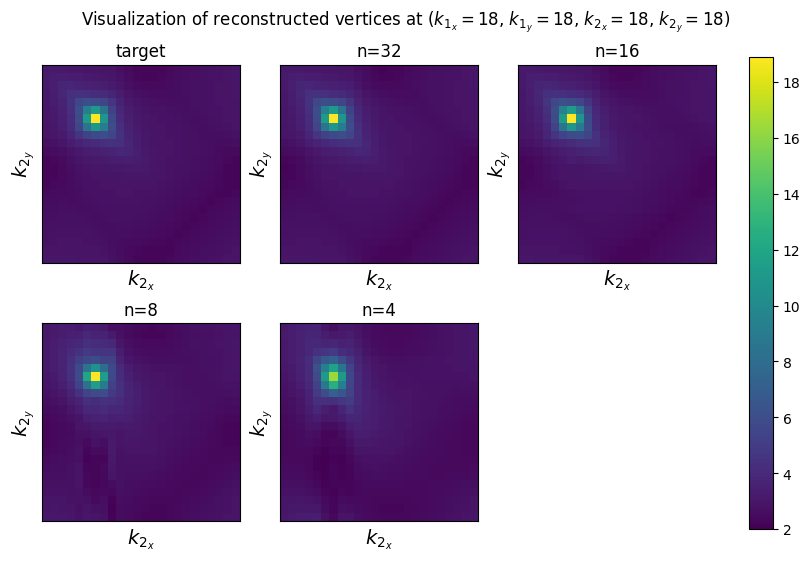

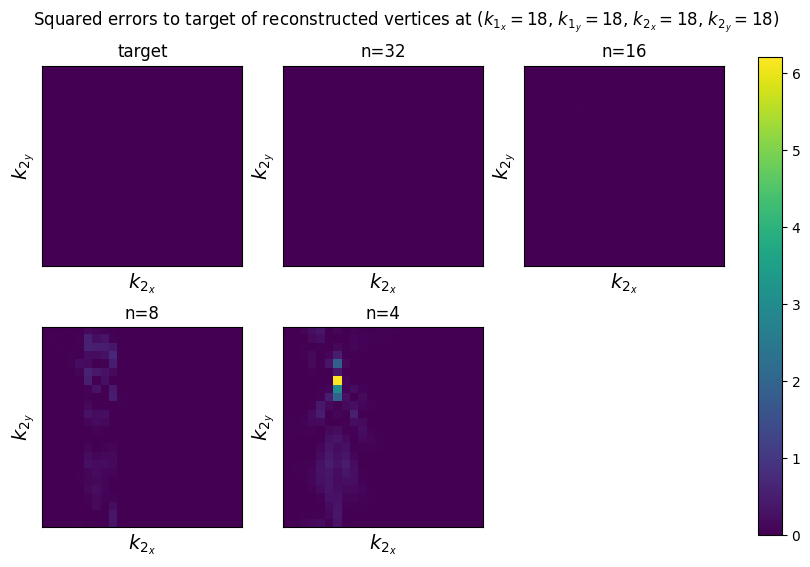

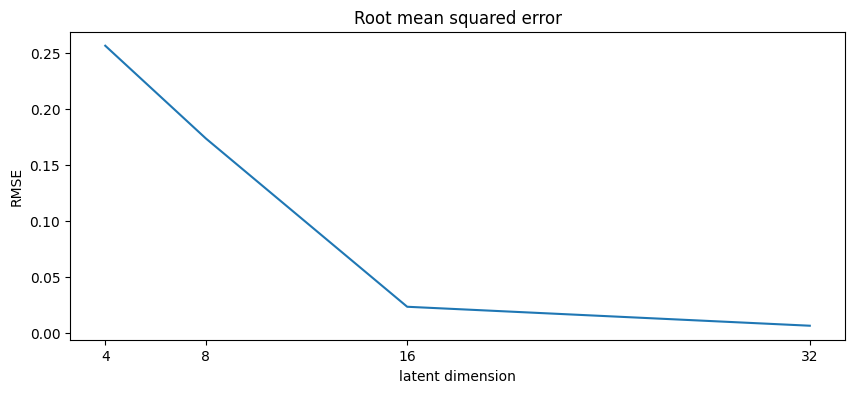

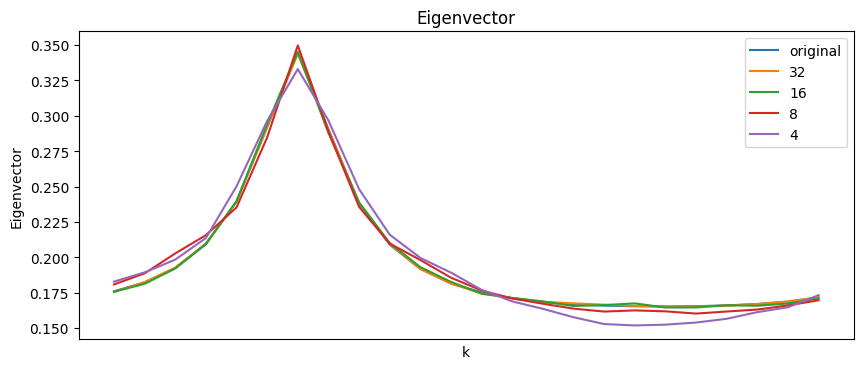

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0060
   latent_dim=16: RMSE=0.0272
   latent_dim=8: RMSE=0.1490
   latent_dim=4: RMSE=0.2845


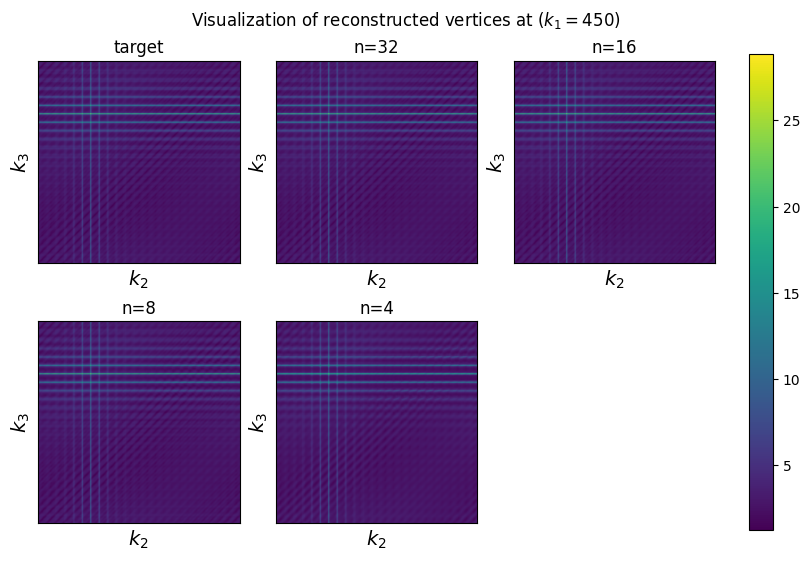

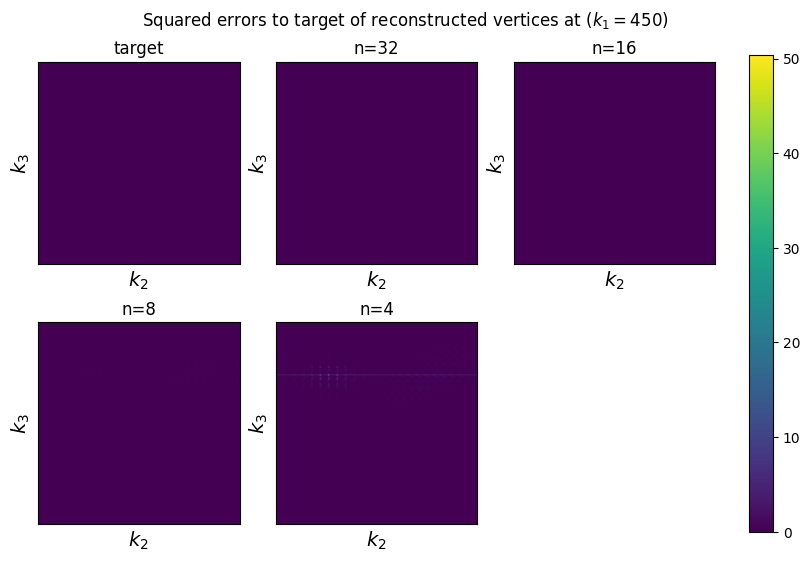

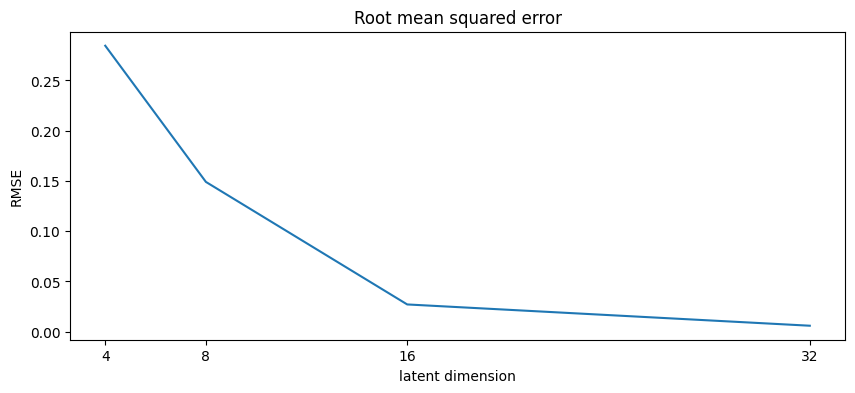

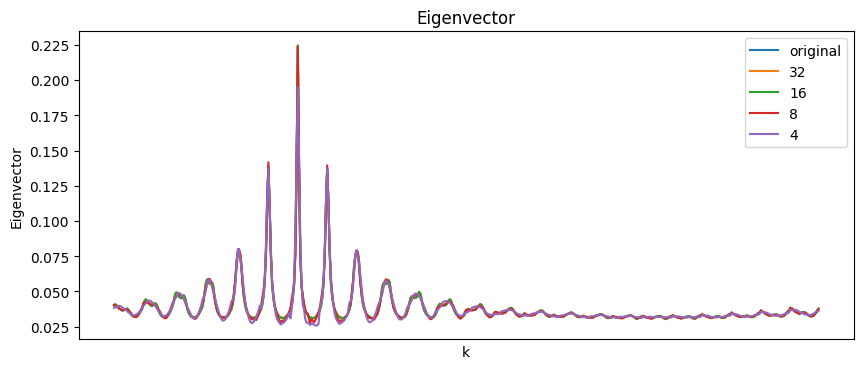

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6/checkpoints/epoch=87-step=3608352.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1/checkpoints/epoch=93-step=4602240.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.0062
   latent_dim=16: RMSE=0.0294
   latent_dim=8: RMSE=0.1454
   latent_dim=4: RMSE=0.3022


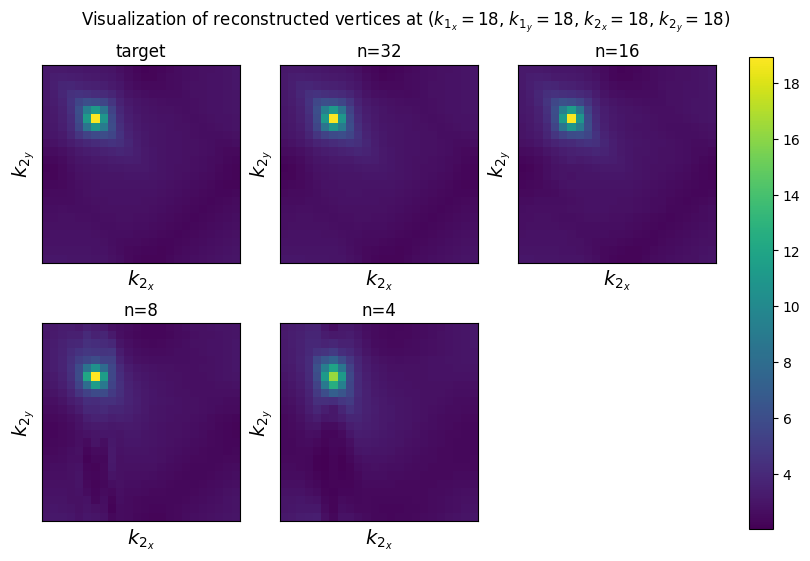

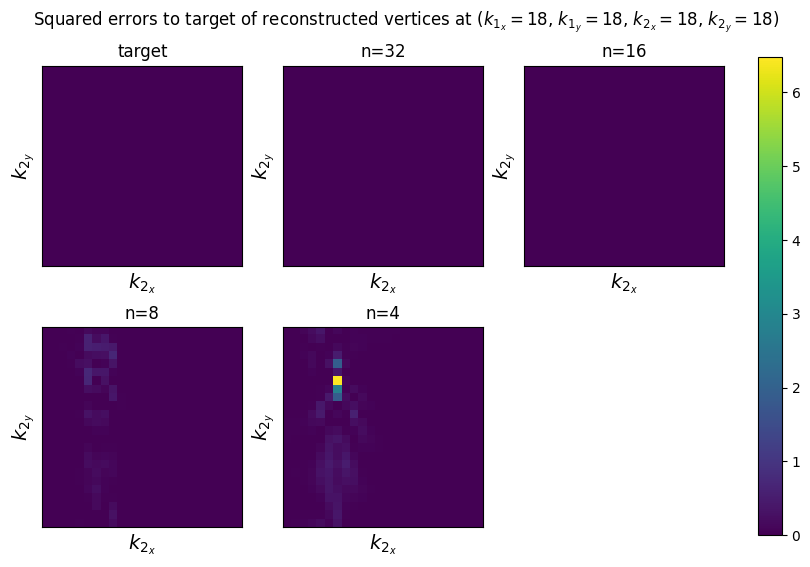

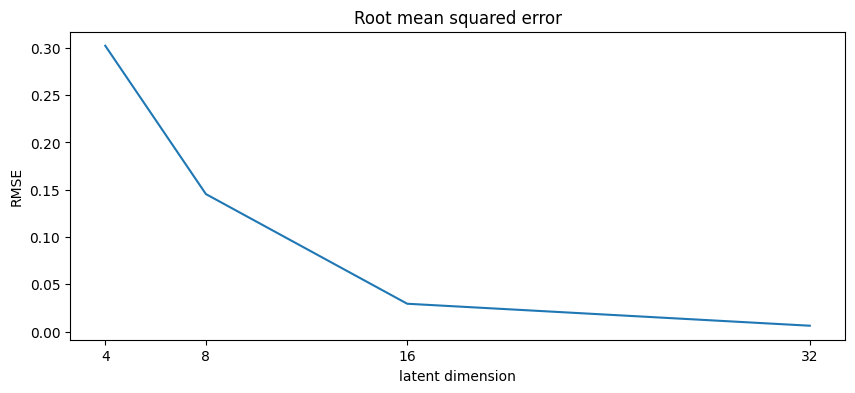

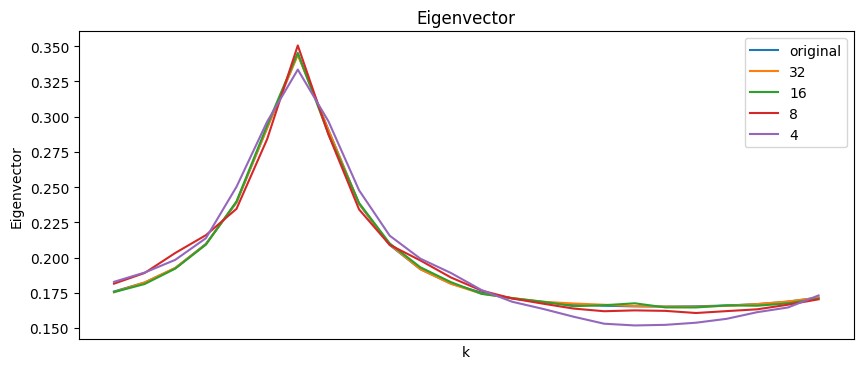

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=32: RMSE=0.0062
   latent_dim=16: RMSE=0.0294
   latent_dim=8: RMSE=0.1454
   latent_dim=4: RMSE=0.3022


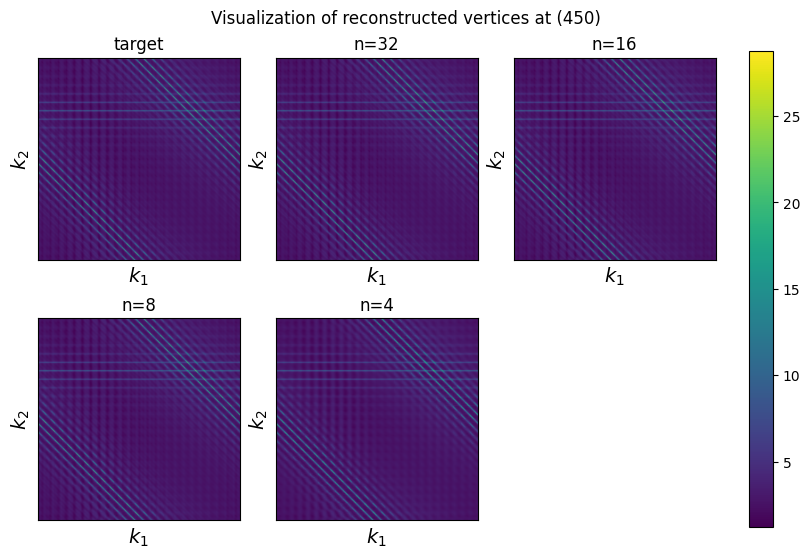

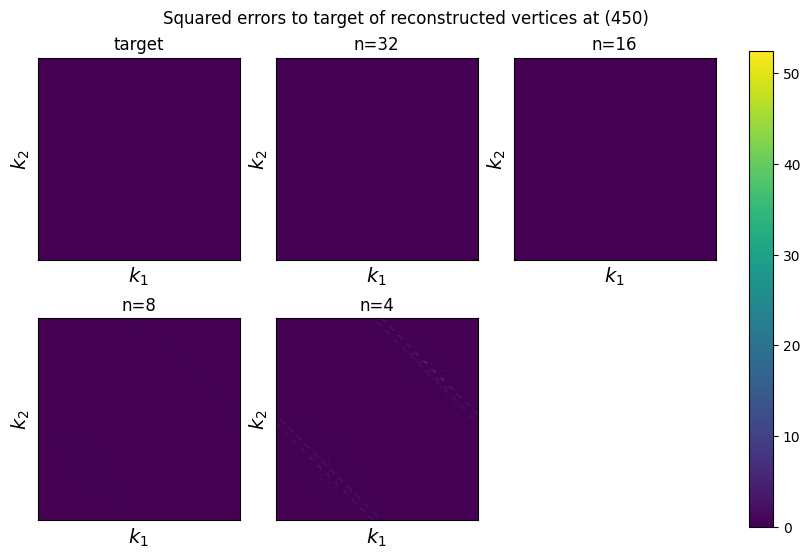

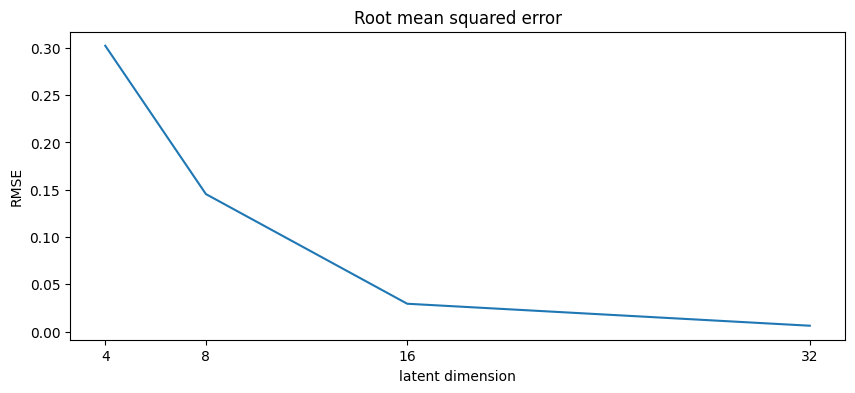

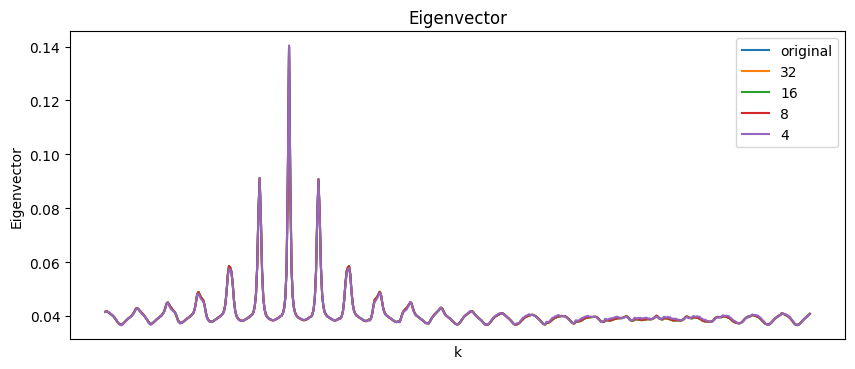

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

load files:   0%|          | 0/51 [00:00<?, ?it/s]

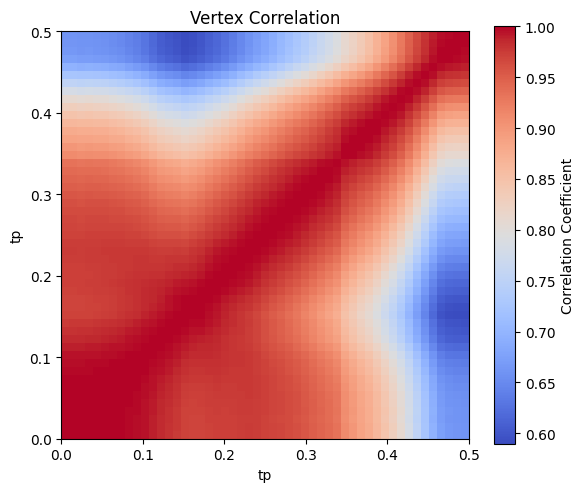

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

## phase classification

In [3]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)

In [5]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)
pc.train()

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Fit models:   0%|          | 0/2 [00:00<?, ?it/s]

[LibSVM]...........................
*..*.
*
optimization finished, #iter = 30072
obj = -42421.853805, rho = 2.930341
nSV = 46968, nBSV = 46628
......................
*...*
optimization finished, #iter = 25221
obj = -32915.630153, rho = 2.875136
nSV = 37873, nBSV = 37573
.............................
*..*.*
optimization finished, #iter = 32032
obj = -45679.913812, rho = -0.182601
nSV = 48421, nBSV = 48043
Total nSV = 79517


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    1.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [20]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Predict with sampling from known vertices:   0%|          | 0/2 [00:00<?, ?it/s]

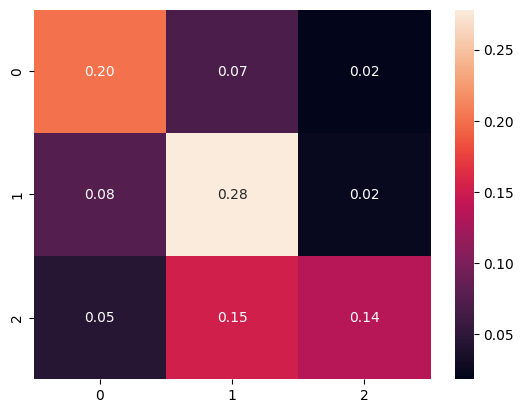

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished


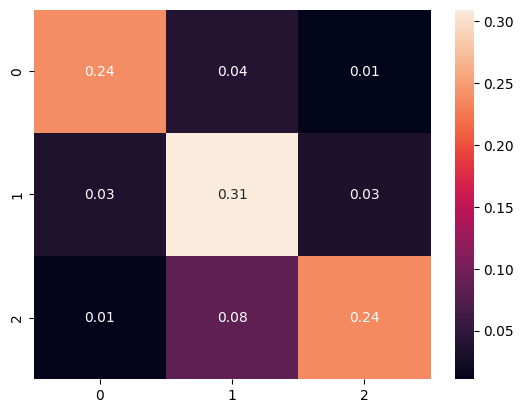

Predict with sampling from new vertices:   0%|          | 0/2 [00:00<?, ?it/s]

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


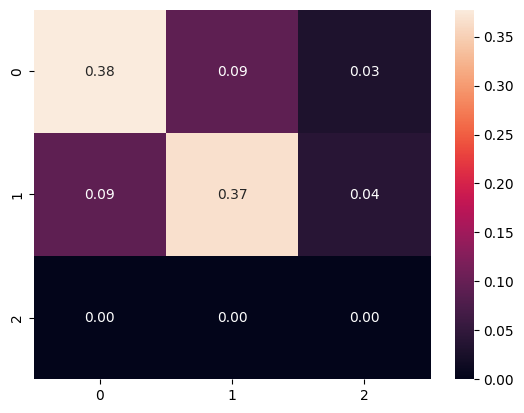

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


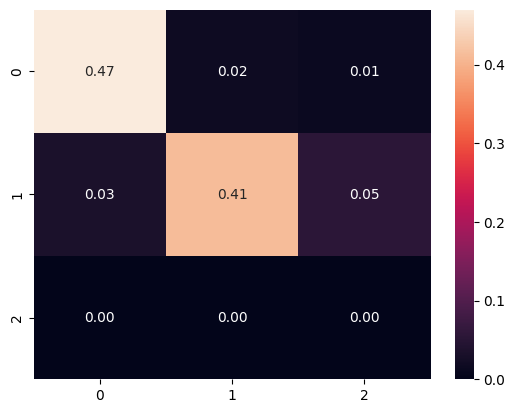

{'sampling from new vertices': {'SVC': ({'acc': np.float64(0.7446666666666666),
    'prec': 0.7446666666666667,
    'rec': 0.7446666666666667,
    'f1': 0.7446666666666667},
   array([[0.3775    , 0.09175   , 0.03075   ],
          [0.09241667, 0.36716667, 0.04041667],
          [0.        , 0.        , 0.        ]])),
  'RandomForestClassifier': ({'acc': np.float64(0.8819166666666667),
    'prec': 0.8819166666666667,
    'rec': 0.8819166666666667,
    'f1': 0.8819166666666667},
   array([[0.46966667, 0.01741667, 0.01291667],
          [0.03441667, 0.41225   , 0.05333333],
          [0.        , 0.        , 0.        ]]))},
 'sampling from known vertices': {'SVC': ({'acc': np.float64(0.6128227775286599),
    'prec': 0.6146146146146146,
    'rec': 0.6146146146146146,
    'f1': 0.6146146146146146},
   array([[0.201001  , 0.06936937, 0.01851852],
          [0.07537538, 0.27807808, 0.02432432],
          [0.04504505, 0.15275275, 0.13553554]])),
  'RandomForestClassifier': ({'acc': np.float

In [21]:
model_scores = pc.evaluate_classifiers(print_conf_mat=True)
model_scores

In [22]:
with open(f'phase_classification_results.pkl','wb') as f:
    pickle.dump(model_scores, f)

# 02 Training extent comparison

* excluding last vertex for testing
* compare different sample sizes and number of epochs

In [3]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
hidden_dims = [128, 64, 32]

def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    sample_count = int((2000 * 576 * 3) / (24 * 6))
    config_kwargs = {'path_train': '../../../frgs_6d', 
                     'hidden_dims': hidden_dims,
                     'epochs': 100,
                     'sample_count_per_vertex': sample_count, 
                     'test_ratio': 0.2, 
                     'subset': -1, 
                     'subset_shuffle': False, 
                     'devices': 'auto', 
                     'device_type': device_type,
                     'num_dataloader_workers': 15, 
                     'strategy': 'auto', 
                     'batch_size': 2048}
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [4]:
trainer = init_trainer(batch_size=8192)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 469: 'val_loss' reached 1.50883 (best 1.50883), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=0-step=469.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 938: 'val_loss' reached 0.57025 (best 0.57025), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=1-step=938.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 1407: 'val_loss' reached 0.34275 (best 0.34275), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=2-step=1407.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 1876: 'val_loss' reached 0.24687 (best 0.24687), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=3-step=1876.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 2345: 'val_loss' reached 0.18442 (best 0.18442), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=4-step=2345.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 2814: 'val_loss' reached 0.15451 (best 0.15451), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=5-step=2814.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 3283: 'val_loss' reached 0.13674 (best 0.13674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=6-step=3283.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 3752: 'val_loss' reached 0.12027 (best 0.12027), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=7-step=3752.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 4221: 'val_loss' reached 0.10678 (best 0.10678), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=8-step=4221.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 4690: 'val_loss' reached 0.09668 (best 0.09668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=9-step=4690.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 5159: 'val_loss' reached 0.08894 (best 0.08894), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=10-step=5159.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 5628: 'val_loss' reached 0.08273 (best 0.08273), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=11-step=5628.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 6097: 'val_loss' reached 0.07626 (best 0.07626), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=12-step=6097.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 6566: 'val_loss' reached 0.07121 (best 0.07121), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=13-step=6566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 7035: 'val_loss' reached 0.06784 (best 0.06784), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=14-step=7035.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 7504: 'val_loss' reached 0.06424 (best 0.06424), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=15-step=7504.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 7973: 'val_loss' reached 0.06036 (best 0.06036), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=16-step=7973.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 8442: 'val_loss' reached 0.05579 (best 0.05579), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=17-step=8442.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 8911: 'val_loss' reached 0.05159 (best 0.05159), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=18-step=8911.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 9380: 'val_loss' reached 0.04832 (best 0.04832), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=19-step=9380.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 9849: 'val_loss' reached 0.04654 (best 0.04654), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=20-step=9849.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 10318: 'val_loss' reached 0.04506 (best 0.04506), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=21-step=10318.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 10787: 'val_loss' reached 0.04372 (best 0.04372), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=22-step=10787.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 11256: 'val_loss' reached 0.04256 (best 0.04256), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=23-step=11256.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 11725: 'val_loss' reached 0.04118 (best 0.04118), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=24-step=11725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 12194: 'val_loss' reached 0.03990 (best 0.03990), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=25-step=12194.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 12663: 'val_loss' reached 0.03863 (best 0.03863), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=26-step=12663.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 13132: 'val_loss' reached 0.03757 (best 0.03757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=27-step=13132.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 13601: 'val_loss' reached 0.03676 (best 0.03676), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=28-step=13601.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 14070: 'val_loss' reached 0.03599 (best 0.03599), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=29-step=14070.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 14539: 'val_loss' reached 0.03541 (best 0.03541), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=30-step=14539.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 15008: 'val_loss' reached 0.03445 (best 0.03445), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=31-step=15008.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 15477: 'val_loss' reached 0.03362 (best 0.03362), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=32-step=15477.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 15946: 'val_loss' reached 0.03279 (best 0.03279), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=33-step=15946.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 16415: 'val_loss' reached 0.03184 (best 0.03184), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=34-step=16415.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 16884: 'val_loss' reached 0.03085 (best 0.03085), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=35-step=16884.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 17353: 'val_loss' reached 0.03000 (best 0.03000), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=36-step=17353.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 17822: 'val_loss' reached 0.02923 (best 0.02923), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=37-step=17822.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 18291: 'val_loss' reached 0.02870 (best 0.02870), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=38-step=18291.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 18760: 'val_loss' reached 0.02802 (best 0.02802), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=39-step=18760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 19229: 'val_loss' reached 0.02755 (best 0.02755), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=40-step=19229.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 19698: 'val_loss' reached 0.02712 (best 0.02712), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=41-step=19698.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 20167: 'val_loss' reached 0.02661 (best 0.02661), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=42-step=20167.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 20636: 'val_loss' reached 0.02628 (best 0.02628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=43-step=20636.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 21105: 'val_loss' reached 0.02586 (best 0.02586), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=44-step=21105.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 21574: 'val_loss' reached 0.02540 (best 0.02540), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=45-step=21574.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 22043: 'val_loss' reached 0.02495 (best 0.02495), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=46-step=22043.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 22512: 'val_loss' reached 0.02443 (best 0.02443), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=47-step=22512.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 22981: 'val_loss' reached 0.02406 (best 0.02406), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=48-step=22981.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 23450: 'val_loss' reached 0.02369 (best 0.02369), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=49-step=23450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 23919: 'val_loss' reached 0.02328 (best 0.02328), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=50-step=23919.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 24388: 'val_loss' reached 0.02314 (best 0.02314), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=51-step=24388.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 24857: 'val_loss' reached 0.02253 (best 0.02253), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=52-step=24857.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 25326: 'val_loss' reached 0.02215 (best 0.02215), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=53-step=25326.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 25795: 'val_loss' reached 0.02172 (best 0.02172), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=54-step=25795.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 26264: 'val_loss' reached 0.02129 (best 0.02129), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=55-step=26264.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 26733: 'val_loss' reached 0.02093 (best 0.02093), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=56-step=26733.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 27202: 'val_loss' reached 0.02045 (best 0.02045), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=57-step=27202.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 27671: 'val_loss' reached 0.02007 (best 0.02007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=58-step=27671.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 28140: 'val_loss' reached 0.01959 (best 0.01959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=59-step=28140.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 28609: 'val_loss' reached 0.01915 (best 0.01915), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=60-step=28609.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 29078: 'val_loss' reached 0.01878 (best 0.01878), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=61-step=29078.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 29547: 'val_loss' reached 0.01851 (best 0.01851), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=62-step=29547.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 30016: 'val_loss' reached 0.01805 (best 0.01805), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=63-step=30016.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 30485: 'val_loss' reached 0.01767 (best 0.01767), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=64-step=30485.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 30954: 'val_loss' reached 0.01737 (best 0.01737), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=65-step=30954.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 31423: 'val_loss' reached 0.01720 (best 0.01720), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=66-step=31423.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 31892: 'val_loss' reached 0.01682 (best 0.01682), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=67-step=31892.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 32361: 'val_loss' reached 0.01673 (best 0.01673), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=68-step=32361.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 32830: 'val_loss' reached 0.01639 (best 0.01639), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=69-step=32830.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 33299: 'val_loss' reached 0.01605 (best 0.01605), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=70-step=33299.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 33768: 'val_loss' reached 0.01569 (best 0.01569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=71-step=33768.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 34237: 'val_loss' reached 0.01550 (best 0.01550), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=72-step=34237.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 34706: 'val_loss' reached 0.01518 (best 0.01518), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=73-step=34706.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 35175: 'val_loss' reached 0.01495 (best 0.01495), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=74-step=35175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 35644: 'val_loss' reached 0.01469 (best 0.01469), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=75-step=35644.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 36113: 'val_loss' reached 0.01461 (best 0.01461), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=76-step=36113.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 36582: 'val_loss' reached 0.01413 (best 0.01413), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=77-step=36582.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 37051: 'val_loss' reached 0.01392 (best 0.01392), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=78-step=37051.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 37520: 'val_loss' reached 0.01361 (best 0.01361), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=79-step=37520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 37989: 'val_loss' reached 0.01330 (best 0.01330), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=80-step=37989.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 38458: 'val_loss' reached 0.01310 (best 0.01310), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=81-step=38458.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 38927: 'val_loss' reached 0.01295 (best 0.01295), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=82-step=38927.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 39396: 'val_loss' reached 0.01268 (best 0.01268), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=83-step=39396.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 39865: 'val_loss' reached 0.01266 (best 0.01266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=84-step=39865.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 40334: 'val_loss' reached 0.01233 (best 0.01233), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=85-step=40334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 40803: 'val_loss' reached 0.01229 (best 0.01229), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=86-step=40803.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 41272: 'val_loss' reached 0.01214 (best 0.01214), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=87-step=41272.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 41741: 'val_loss' reached 0.01196 (best 0.01196), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=88-step=41741.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 42210: 'val_loss' reached 0.01176 (best 0.01176), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=89-step=42210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 42679: 'val_loss' reached 0.01168 (best 0.01168), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=90-step=42679.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 43148: 'val_loss' reached 0.01151 (best 0.01151), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=91-step=43148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 43617: 'val_loss' reached 0.01150 (best 0.01150), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=92-step=43617.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 44086: 'val_loss' reached 0.01135 (best 0.01135), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=93-step=44086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 44555: 'val_loss' reached 0.01123 (best 0.01123), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=94-step=44555.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 45024: 'val_loss' reached 0.01108 (best 0.01108), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=95-step=45024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 45493: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 45962: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 46431: 'val_loss' reached 0.01086 (best 0.01086), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=98-step=46431.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 46900: 'val_loss' reached 0.01071 (best 0.01071), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0'


In [5]:
trainer = init_trainer(sample_count_per_vertex=2000, epochs=1000)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (40) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 40: 'val_loss' reached 12.49246 (best 12.49246), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=0-step=40.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 80: 'val_loss' reached 6.04355 (best 6.04355), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=1-step=80.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 120: 'val_loss' reached 3.17971 (best 3.17971), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=2-step=120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 160: 'val_loss' reached 2.69099 (best 2.69099), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=3-step=160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 200: 'val_loss' reached 2.58679 (best 2.58679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=4-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 240: 'val_loss' reached 2.47911 (best 2.47911), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=5-step=240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 280: 'val_loss' reached 2.34949 (best 2.34949), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=6-step=280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 320: 'val_loss' reached 2.22054 (best 2.22054), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=7-step=320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 360: 'val_loss' reached 2.12451 (best 2.12451), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=8-step=360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 400: 'val_loss' reached 2.06090 (best 2.06090), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=9-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 440: 'val_loss' reached 1.98320 (best 1.98320), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=10-step=440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 480: 'val_loss' reached 1.85992 (best 1.85992), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=11-step=480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 520: 'val_loss' reached 1.65117 (best 1.65117), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=12-step=520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 560: 'val_loss' reached 1.44550 (best 1.44550), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=13-step=560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 600: 'val_loss' reached 1.32991 (best 1.32991), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=14-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 640: 'val_loss' reached 1.23168 (best 1.23168), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=15-step=640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 680: 'val_loss' reached 1.09976 (best 1.09976), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=16-step=680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 720: 'val_loss' reached 0.93717 (best 0.93717), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=17-step=720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 760: 'val_loss' reached 0.80435 (best 0.80435), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=18-step=760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 800: 'val_loss' reached 0.71948 (best 0.71948), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=19-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 840: 'val_loss' reached 0.66896 (best 0.66896), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=20-step=840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 880: 'val_loss' reached 0.63381 (best 0.63381), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=21-step=880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 920: 'val_loss' reached 0.60503 (best 0.60503), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=22-step=920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 960: 'val_loss' reached 0.57840 (best 0.57840), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=23-step=960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 1000: 'val_loss' reached 0.55308 (best 0.55308), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=24-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 1040: 'val_loss' reached 0.52929 (best 0.52929), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=25-step=1040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 1080: 'val_loss' reached 0.50339 (best 0.50339), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=26-step=1080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 1120: 'val_loss' reached 0.47770 (best 0.47770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=27-step=1120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 1160: 'val_loss' reached 0.45381 (best 0.45381), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=28-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 1200: 'val_loss' reached 0.43085 (best 0.43085), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=29-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 1240: 'val_loss' reached 0.40923 (best 0.40923), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=30-step=1240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 1280: 'val_loss' reached 0.38940 (best 0.38940), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=31-step=1280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 1320: 'val_loss' reached 0.37130 (best 0.37130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=32-step=1320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 1360: 'val_loss' reached 0.35516 (best 0.35516), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=33-step=1360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1400: 'val_loss' reached 0.34034 (best 0.34034), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=34-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1440: 'val_loss' reached 0.32623 (best 0.32623), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=35-step=1440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1480: 'val_loss' reached 0.31389 (best 0.31389), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=36-step=1480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1520: 'val_loss' reached 0.30280 (best 0.30280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=37-step=1520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1560: 'val_loss' reached 0.29283 (best 0.29283), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=38-step=1560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1600: 'val_loss' reached 0.28383 (best 0.28383), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=39-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1640: 'val_loss' reached 0.27608 (best 0.27608), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=40-step=1640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1680: 'val_loss' reached 0.26905 (best 0.26905), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=41-step=1680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1720: 'val_loss' reached 0.26223 (best 0.26223), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=42-step=1720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1760: 'val_loss' reached 0.25601 (best 0.25601), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=43-step=1760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1800: 'val_loss' reached 0.25033 (best 0.25033), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=44-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1840: 'val_loss' reached 0.24494 (best 0.24494), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=45-step=1840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1880: 'val_loss' reached 0.23979 (best 0.23979), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=46-step=1880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1920: 'val_loss' reached 0.23507 (best 0.23507), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=47-step=1920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1960: 'val_loss' reached 0.23032 (best 0.23032), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=48-step=1960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 2000: 'val_loss' reached 0.22569 (best 0.22569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=49-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 2040: 'val_loss' reached 0.22151 (best 0.22151), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=50-step=2040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 2080: 'val_loss' reached 0.21735 (best 0.21735), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=51-step=2080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 2120: 'val_loss' reached 0.21303 (best 0.21303), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=52-step=2120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 2160: 'val_loss' reached 0.20916 (best 0.20916), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=53-step=2160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 2200: 'val_loss' reached 0.20527 (best 0.20527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=54-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 2240: 'val_loss' reached 0.20163 (best 0.20163), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=55-step=2240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 2280: 'val_loss' reached 0.19819 (best 0.19819), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=56-step=2280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 2320: 'val_loss' reached 0.19492 (best 0.19492), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=57-step=2320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 2360: 'val_loss' reached 0.19176 (best 0.19176), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=58-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 2400: 'val_loss' reached 0.18901 (best 0.18901), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=59-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 2440: 'val_loss' reached 0.18649 (best 0.18649), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=60-step=2440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 2480: 'val_loss' reached 0.18376 (best 0.18376), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=61-step=2480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 2520: 'val_loss' reached 0.18113 (best 0.18113), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=62-step=2520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 2560: 'val_loss' reached 0.17898 (best 0.17898), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=63-step=2560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 2600: 'val_loss' reached 0.17634 (best 0.17634), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=64-step=2600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 2640: 'val_loss' reached 0.17419 (best 0.17419), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=65-step=2640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 2680: 'val_loss' reached 0.17204 (best 0.17204), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=66-step=2680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 2720: 'val_loss' reached 0.17019 (best 0.17019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=67-step=2720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2760: 'val_loss' reached 0.16814 (best 0.16814), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=68-step=2760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2800: 'val_loss' reached 0.16665 (best 0.16665), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=69-step=2800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2840: 'val_loss' reached 0.16484 (best 0.16484), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=70-step=2840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2880: 'val_loss' reached 0.16300 (best 0.16300), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=71-step=2880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2920: 'val_loss' reached 0.16145 (best 0.16145), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=72-step=2920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 2960: 'val_loss' reached 0.16018 (best 0.16018), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=73-step=2960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 3000: 'val_loss' reached 0.15867 (best 0.15867), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=74-step=3000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 3040: 'val_loss' reached 0.15712 (best 0.15712), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=75-step=3040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 3080: 'val_loss' reached 0.15573 (best 0.15573), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=76-step=3080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 3120: 'val_loss' reached 0.15430 (best 0.15430), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=77-step=3120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 3160: 'val_loss' reached 0.15295 (best 0.15295), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=78-step=3160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 3200: 'val_loss' reached 0.15158 (best 0.15158), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=79-step=3200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 3240: 'val_loss' reached 0.15033 (best 0.15033), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=80-step=3240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 3280: 'val_loss' reached 0.14937 (best 0.14937), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=81-step=3280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 3320: 'val_loss' reached 0.14797 (best 0.14797), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=82-step=3320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 3360: 'val_loss' reached 0.14662 (best 0.14662), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=83-step=3360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 3400: 'val_loss' reached 0.14537 (best 0.14537), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=84-step=3400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 3440: 'val_loss' reached 0.14455 (best 0.14455), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=85-step=3440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 3480: 'val_loss' reached 0.14322 (best 0.14322), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=86-step=3480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 3520: 'val_loss' reached 0.14220 (best 0.14220), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=87-step=3520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 3560: 'val_loss' reached 0.14117 (best 0.14117), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=88-step=3560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 3600: 'val_loss' reached 0.14009 (best 0.14009), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=89-step=3600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 3640: 'val_loss' reached 0.13863 (best 0.13863), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=90-step=3640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 3680: 'val_loss' reached 0.13786 (best 0.13786), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=91-step=3680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 3720: 'val_loss' reached 0.13677 (best 0.13677), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=92-step=3720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 3760: 'val_loss' reached 0.13625 (best 0.13625), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=93-step=3760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 3800: 'val_loss' reached 0.13456 (best 0.13456), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=94-step=3800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 3840: 'val_loss' reached 0.13360 (best 0.13360), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=95-step=3840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 3880: 'val_loss' reached 0.13255 (best 0.13255), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=96-step=3880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 3920: 'val_loss' reached 0.13173 (best 0.13173), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=97-step=3920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 3960: 'val_loss' reached 0.13094 (best 0.13094), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=98-step=3960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 4000: 'val_loss' reached 0.12994 (best 0.12994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=99-step=4000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 100, global step 4040: 'val_loss' reached 0.12935 (best 0.12935), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=100-step=4040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 101, global step 4080: 'val_loss' reached 0.12801 (best 0.12801), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=101-step=4080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 102, global step 4120: 'val_loss' reached 0.12727 (best 0.12727), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=102-step=4120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 103, global step 4160: 'val_loss' reached 0.12651 (best 0.12651), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=103-step=4160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 104, global step 4200: 'val_loss' reached 0.12511 (best 0.12511), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=104-step=4200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 105, global step 4240: 'val_loss' reached 0.12447 (best 0.12447), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=105-step=4240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 106, global step 4280: 'val_loss' reached 0.12344 (best 0.12344), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=106-step=4280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 107, global step 4320: 'val_loss' reached 0.12255 (best 0.12255), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=107-step=4320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 108, global step 4360: 'val_loss' reached 0.12157 (best 0.12157), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=108-step=4360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 109, global step 4400: 'val_loss' reached 0.12044 (best 0.12044), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=109-step=4400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 110, global step 4440: 'val_loss' reached 0.11985 (best 0.11985), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=110-step=4440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 111, global step 4480: 'val_loss' reached 0.11865 (best 0.11865), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=111-step=4480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 112, global step 4520: 'val_loss' reached 0.11777 (best 0.11777), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=112-step=4520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 113, global step 4560: 'val_loss' reached 0.11672 (best 0.11672), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=113-step=4560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 114, global step 4600: 'val_loss' reached 0.11602 (best 0.11602), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=114-step=4600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 115, global step 4640: 'val_loss' reached 0.11460 (best 0.11460), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=115-step=4640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 116, global step 4680: 'val_loss' reached 0.11340 (best 0.11340), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=116-step=4680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 117, global step 4720: 'val_loss' reached 0.11270 (best 0.11270), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=117-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 118, global step 4760: 'val_loss' reached 0.11161 (best 0.11161), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=118-step=4760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 119, global step 4800: 'val_loss' reached 0.11040 (best 0.11040), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=119-step=4800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 120, global step 4840: 'val_loss' reached 0.10929 (best 0.10929), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=120-step=4840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 121, global step 4880: 'val_loss' reached 0.10833 (best 0.10833), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=121-step=4880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 122, global step 4920: 'val_loss' reached 0.10724 (best 0.10724), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=122-step=4920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 123, global step 4960: 'val_loss' reached 0.10644 (best 0.10644), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=123-step=4960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 124, global step 5000: 'val_loss' reached 0.10513 (best 0.10513), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=124-step=5000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 125, global step 5040: 'val_loss' reached 0.10405 (best 0.10405), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=125-step=5040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 126, global step 5080: 'val_loss' reached 0.10305 (best 0.10305), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=126-step=5080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 127, global step 5120: 'val_loss' reached 0.10218 (best 0.10218), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=127-step=5120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 128, global step 5160: 'val_loss' reached 0.10114 (best 0.10114), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=128-step=5160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 129, global step 5200: 'val_loss' reached 0.10008 (best 0.10008), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=129-step=5200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 130, global step 5240: 'val_loss' reached 0.09909 (best 0.09909), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=130-step=5240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 131, global step 5280: 'val_loss' reached 0.09843 (best 0.09843), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=131-step=5280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 132, global step 5320: 'val_loss' reached 0.09718 (best 0.09718), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=132-step=5320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 133, global step 5360: 'val_loss' reached 0.09658 (best 0.09658), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=133-step=5360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 134, global step 5400: 'val_loss' reached 0.09542 (best 0.09542), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=134-step=5400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 135, global step 5440: 'val_loss' reached 0.09471 (best 0.09471), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=135-step=5440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 136, global step 5480: 'val_loss' reached 0.09420 (best 0.09420), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=136-step=5480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 137, global step 5520: 'val_loss' reached 0.09328 (best 0.09328), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=137-step=5520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 138, global step 5560: 'val_loss' reached 0.09244 (best 0.09244), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=138-step=5560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 139, global step 5600: 'val_loss' reached 0.09189 (best 0.09189), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=139-step=5600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 140, global step 5640: 'val_loss' reached 0.09130 (best 0.09130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=140-step=5640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 141, global step 5680: 'val_loss' reached 0.09099 (best 0.09099), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=141-step=5680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 142, global step 5720: 'val_loss' reached 0.08989 (best 0.08989), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=142-step=5720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 143, global step 5760: 'val_loss' reached 0.08942 (best 0.08942), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=143-step=5760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 144, global step 5800: 'val_loss' reached 0.08889 (best 0.08889), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=144-step=5800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 145, global step 5840: 'val_loss' reached 0.08816 (best 0.08816), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=145-step=5840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 146, global step 5880: 'val_loss' reached 0.08795 (best 0.08795), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=146-step=5880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 147, global step 5920: 'val_loss' reached 0.08743 (best 0.08743), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=147-step=5920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 148, global step 5960: 'val_loss' reached 0.08682 (best 0.08682), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=148-step=5960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 149, global step 6000: 'val_loss' reached 0.08605 (best 0.08605), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=149-step=6000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 150, global step 6040: 'val_loss' reached 0.08555 (best 0.08555), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=150-step=6040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 151, global step 6080: 'val_loss' reached 0.08519 (best 0.08519), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=151-step=6080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 152, global step 6120: 'val_loss' reached 0.08470 (best 0.08470), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=152-step=6120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 153, global step 6160: 'val_loss' reached 0.08411 (best 0.08411), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=153-step=6160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 154, global step 6200: 'val_loss' reached 0.08391 (best 0.08391), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=154-step=6200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 155, global step 6240: 'val_loss' reached 0.08338 (best 0.08338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=155-step=6240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 156, global step 6280: 'val_loss' reached 0.08320 (best 0.08320), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=156-step=6280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 157, global step 6320: 'val_loss' reached 0.08225 (best 0.08225), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=157-step=6320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 158, global step 6360: 'val_loss' reached 0.08215 (best 0.08215), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=158-step=6360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 159, global step 6400: 'val_loss' reached 0.08144 (best 0.08144), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=159-step=6400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 160, global step 6440: 'val_loss' reached 0.08102 (best 0.08102), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=160-step=6440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 161, global step 6480: 'val_loss' reached 0.08052 (best 0.08052), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=161-step=6480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 162, global step 6520: 'val_loss' reached 0.08005 (best 0.08005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=162-step=6520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 163, global step 6560: 'val_loss' reached 0.07965 (best 0.07965), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=163-step=6560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 164, global step 6600: 'val_loss' reached 0.07939 (best 0.07939), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=164-step=6600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 165, global step 6640: 'val_loss' reached 0.07892 (best 0.07892), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=165-step=6640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 166, global step 6680: 'val_loss' reached 0.07863 (best 0.07863), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=166-step=6680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 167, global step 6720: 'val_loss' reached 0.07794 (best 0.07794), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=167-step=6720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 168, global step 6760: 'val_loss' reached 0.07790 (best 0.07790), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=168-step=6760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 169, global step 6800: 'val_loss' reached 0.07699 (best 0.07699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=169-step=6800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 170, global step 6840: 'val_loss' reached 0.07667 (best 0.07667), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=170-step=6840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 171, global step 6880: 'val_loss' reached 0.07623 (best 0.07623), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=171-step=6880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 172, global step 6920: 'val_loss' reached 0.07579 (best 0.07579), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=172-step=6920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 173, global step 6960: 'val_loss' reached 0.07538 (best 0.07538), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=173-step=6960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 174, global step 7000: 'val_loss' reached 0.07494 (best 0.07494), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=174-step=7000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 175, global step 7040: 'val_loss' reached 0.07441 (best 0.07441), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=175-step=7040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 176, global step 7080: 'val_loss' reached 0.07407 (best 0.07407), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=176-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 177, global step 7120: 'val_loss' reached 0.07349 (best 0.07349), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=177-step=7120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 178, global step 7160: 'val_loss' reached 0.07321 (best 0.07321), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=178-step=7160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 179, global step 7200: 'val_loss' reached 0.07287 (best 0.07287), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=179-step=7200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 180, global step 7240: 'val_loss' reached 0.07235 (best 0.07235), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=180-step=7240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 181, global step 7280: 'val_loss' reached 0.07196 (best 0.07196), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=181-step=7280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 182, global step 7320: 'val_loss' reached 0.07166 (best 0.07166), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=182-step=7320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 183, global step 7360: 'val_loss' reached 0.07118 (best 0.07118), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=183-step=7360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 184, global step 7400: 'val_loss' reached 0.07063 (best 0.07063), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=184-step=7400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 185, global step 7440: 'val_loss' reached 0.07017 (best 0.07017), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=185-step=7440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 186, global step 7480: 'val_loss' reached 0.06991 (best 0.06991), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=186-step=7480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 187, global step 7520: 'val_loss' reached 0.06964 (best 0.06964), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=187-step=7520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 188, global step 7560: 'val_loss' reached 0.06932 (best 0.06932), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=188-step=7560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 189, global step 7600: 'val_loss' reached 0.06874 (best 0.06874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=189-step=7600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 190, global step 7640: 'val_loss' reached 0.06845 (best 0.06845), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=190-step=7640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 191, global step 7680: 'val_loss' reached 0.06796 (best 0.06796), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=191-step=7680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 192, global step 7720: 'val_loss' reached 0.06765 (best 0.06765), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=192-step=7720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 193, global step 7760: 'val_loss' reached 0.06703 (best 0.06703), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=193-step=7760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 194, global step 7800: 'val_loss' reached 0.06662 (best 0.06662), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=194-step=7800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 195, global step 7840: 'val_loss' reached 0.06632 (best 0.06632), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=195-step=7840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 196, global step 7880: 'val_loss' reached 0.06595 (best 0.06595), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=196-step=7880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 197, global step 7920: 'val_loss' reached 0.06589 (best 0.06589), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=197-step=7920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 198, global step 7960: 'val_loss' reached 0.06541 (best 0.06541), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=198-step=7960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 199, global step 8000: 'val_loss' reached 0.06492 (best 0.06492), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=199-step=8000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 200, global step 8040: 'val_loss' reached 0.06466 (best 0.06466), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=200-step=8040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 201, global step 8080: 'val_loss' reached 0.06458 (best 0.06458), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=201-step=8080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 202, global step 8120: 'val_loss' reached 0.06380 (best 0.06380), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=202-step=8120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 203, global step 8160: 'val_loss' reached 0.06356 (best 0.06356), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=203-step=8160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 204, global step 8200: 'val_loss' reached 0.06303 (best 0.06303), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=204-step=8200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 205, global step 8240: 'val_loss' reached 0.06265 (best 0.06265), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=205-step=8240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 206, global step 8280: 'val_loss' reached 0.06202 (best 0.06202), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=206-step=8280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 207, global step 8320: 'val_loss' reached 0.06194 (best 0.06194), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=207-step=8320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 208, global step 8360: 'val_loss' reached 0.06127 (best 0.06127), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=208-step=8360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 209, global step 8400: 'val_loss' reached 0.06074 (best 0.06074), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=209-step=8400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 210, global step 8440: 'val_loss' reached 0.06065 (best 0.06065), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=210-step=8440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 211, global step 8480: 'val_loss' reached 0.05988 (best 0.05988), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=211-step=8480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 212, global step 8520: 'val_loss' reached 0.05959 (best 0.05959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=212-step=8520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 213, global step 8560: 'val_loss' reached 0.05923 (best 0.05923), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=213-step=8560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 214, global step 8600: 'val_loss' reached 0.05887 (best 0.05887), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=214-step=8600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 215, global step 8640: 'val_loss' reached 0.05848 (best 0.05848), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=215-step=8640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 216, global step 8680: 'val_loss' reached 0.05828 (best 0.05828), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=216-step=8680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 217, global step 8720: 'val_loss' reached 0.05790 (best 0.05790), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=217-step=8720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 218, global step 8760: 'val_loss' reached 0.05744 (best 0.05744), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=218-step=8760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 219, global step 8800: 'val_loss' reached 0.05724 (best 0.05724), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=219-step=8800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 220, global step 8840: 'val_loss' reached 0.05691 (best 0.05691), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=220-step=8840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 221, global step 8880: 'val_loss' reached 0.05655 (best 0.05655), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=221-step=8880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 222, global step 8920: 'val_loss' reached 0.05641 (best 0.05641), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=222-step=8920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 223, global step 8960: 'val_loss' reached 0.05604 (best 0.05604), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=223-step=8960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 224, global step 9000: 'val_loss' reached 0.05592 (best 0.05592), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=224-step=9000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 225, global step 9040: 'val_loss' reached 0.05559 (best 0.05559), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=225-step=9040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 226, global step 9080: 'val_loss' reached 0.05518 (best 0.05518), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=226-step=9080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 227, global step 9120: 'val_loss' reached 0.05517 (best 0.05517), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=227-step=9120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 228, global step 9160: 'val_loss' reached 0.05485 (best 0.05485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=228-step=9160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 229, global step 9200: 'val_loss' reached 0.05465 (best 0.05465), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=229-step=9200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 230, global step 9240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 231, global step 9280: 'val_loss' reached 0.05397 (best 0.05397), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=231-step=9280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 232, global step 9320: 'val_loss' reached 0.05367 (best 0.05367), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=232-step=9320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 233, global step 9360: 'val_loss' reached 0.05344 (best 0.05344), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=233-step=9360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 234, global step 9400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 235, global step 9440: 'val_loss' reached 0.05292 (best 0.05292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=235-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 236, global step 9480: 'val_loss' reached 0.05273 (best 0.05273), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=236-step=9480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 237, global step 9520: 'val_loss' reached 0.05241 (best 0.05241), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=237-step=9520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 238, global step 9560: 'val_loss' reached 0.05228 (best 0.05228), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=238-step=9560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 239, global step 9600: 'val_loss' reached 0.05216 (best 0.05216), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=239-step=9600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 240, global step 9640: 'val_loss' reached 0.05203 (best 0.05203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=240-step=9640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 241, global step 9680: 'val_loss' reached 0.05157 (best 0.05157), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=241-step=9680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 242, global step 9720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 243, global step 9760: 'val_loss' reached 0.05150 (best 0.05150), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=243-step=9760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 244, global step 9800: 'val_loss' reached 0.05087 (best 0.05087), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=244-step=9800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 245, global step 9840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 246, global step 9880: 'val_loss' reached 0.05055 (best 0.05055), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=246-step=9880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 247, global step 9920: 'val_loss' reached 0.05051 (best 0.05051), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=247-step=9920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 248, global step 9960: 'val_loss' reached 0.05046 (best 0.05046), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=248-step=9960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 249, global step 10000: 'val_loss' reached 0.05007 (best 0.05007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=249-step=10000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 250, global step 10040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 251, global step 10080: 'val_loss' reached 0.04981 (best 0.04981), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=251-step=10080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 252, global step 10120: 'val_loss' reached 0.04959 (best 0.04959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=252-step=10120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 253, global step 10160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 254, global step 10200: 'val_loss' reached 0.04894 (best 0.04894), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=254-step=10200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 255, global step 10240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 256, global step 10280: 'val_loss' reached 0.04861 (best 0.04861), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=256-step=10280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 257, global step 10320: 'val_loss' reached 0.04857 (best 0.04857), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=257-step=10320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 258, global step 10360: 'val_loss' reached 0.04842 (best 0.04842), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=258-step=10360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 259, global step 10400: 'val_loss' reached 0.04807 (best 0.04807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=259-step=10400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 260, global step 10440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 261, global step 10480: 'val_loss' reached 0.04773 (best 0.04773), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=261-step=10480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 262, global step 10520: 'val_loss' reached 0.04772 (best 0.04772), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=262-step=10520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 263, global step 10560: 'val_loss' reached 0.04748 (best 0.04748), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=263-step=10560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 264, global step 10600: 'val_loss' reached 0.04729 (best 0.04729), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=264-step=10600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 265, global step 10640: 'val_loss' reached 0.04700 (best 0.04700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=265-step=10640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 266, global step 10680: 'val_loss' reached 0.04681 (best 0.04681), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=266-step=10680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 267, global step 10720: 'val_loss' reached 0.04658 (best 0.04658), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=267-step=10720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 268, global step 10760: 'val_loss' reached 0.04647 (best 0.04647), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=268-step=10760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 269, global step 10800: 'val_loss' reached 0.04636 (best 0.04636), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=269-step=10800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 270, global step 10840: 'val_loss' reached 0.04610 (best 0.04610), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=270-step=10840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 271, global step 10880: 'val_loss' reached 0.04567 (best 0.04567), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=271-step=10880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 272, global step 10920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 273, global step 10960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 274, global step 11000: 'val_loss' reached 0.04524 (best 0.04524), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=274-step=11000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 275, global step 11040: 'val_loss' reached 0.04523 (best 0.04523), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=275-step=11040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 276, global step 11080: 'val_loss' reached 0.04500 (best 0.04500), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=276-step=11080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 277, global step 11120: 'val_loss' reached 0.04469 (best 0.04469), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=277-step=11120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 278, global step 11160: 'val_loss' reached 0.04455 (best 0.04455), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=278-step=11160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 279, global step 11200: 'val_loss' reached 0.04427 (best 0.04427), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=279-step=11200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 280, global step 11240: 'val_loss' reached 0.04424 (best 0.04424), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=280-step=11240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 281, global step 11280: 'val_loss' reached 0.04408 (best 0.04408), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=281-step=11280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 282, global step 11320: 'val_loss' reached 0.04366 (best 0.04366), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=282-step=11320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 283, global step 11360: 'val_loss' reached 0.04365 (best 0.04365), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=283-step=11360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 284, global step 11400: 'val_loss' reached 0.04320 (best 0.04320), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=284-step=11400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 285, global step 11440: 'val_loss' reached 0.04316 (best 0.04316), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=285-step=11440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 286, global step 11480: 'val_loss' reached 0.04304 (best 0.04304), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=286-step=11480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 287, global step 11520: 'val_loss' reached 0.04271 (best 0.04271), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=287-step=11520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 288, global step 11560: 'val_loss' reached 0.04250 (best 0.04250), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=288-step=11560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 289, global step 11600: 'val_loss' reached 0.04241 (best 0.04241), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=289-step=11600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 290, global step 11640: 'val_loss' reached 0.04229 (best 0.04229), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=290-step=11640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 291, global step 11680: 'val_loss' reached 0.04215 (best 0.04215), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=291-step=11680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 292, global step 11720: 'val_loss' reached 0.04196 (best 0.04196), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=292-step=11720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 293, global step 11760: 'val_loss' reached 0.04176 (best 0.04176), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=293-step=11760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 294, global step 11800: 'val_loss' reached 0.04166 (best 0.04166), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=294-step=11800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 295, global step 11840: 'val_loss' reached 0.04135 (best 0.04135), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=295-step=11840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 296, global step 11880: 'val_loss' reached 0.04129 (best 0.04129), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=296-step=11880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 297, global step 11920: 'val_loss' reached 0.04114 (best 0.04114), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=297-step=11920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 298, global step 11960: 'val_loss' reached 0.04083 (best 0.04083), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=298-step=11960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 299, global step 12000: 'val_loss' reached 0.04079 (best 0.04079), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=299-step=12000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 300, global step 12040: 'val_loss' reached 0.04063 (best 0.04063), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=300-step=12040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 301, global step 12080: 'val_loss' reached 0.04046 (best 0.04046), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=301-step=12080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 302, global step 12120: 'val_loss' reached 0.04026 (best 0.04026), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=302-step=12120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 303, global step 12160: 'val_loss' reached 0.04005 (best 0.04005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=303-step=12160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 304, global step 12200: 'val_loss' reached 0.03983 (best 0.03983), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=304-step=12200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 305, global step 12240: 'val_loss' reached 0.03975 (best 0.03975), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=305-step=12240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 306, global step 12280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 307, global step 12320: 'val_loss' reached 0.03949 (best 0.03949), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=307-step=12320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 308, global step 12360: 'val_loss' reached 0.03928 (best 0.03928), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=308-step=12360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 309, global step 12400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 310, global step 12440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 311, global step 12480: 'val_loss' reached 0.03896 (best 0.03896), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=311-step=12480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 312, global step 12520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 313, global step 12560: 'val_loss' reached 0.03863 (best 0.03863), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=313-step=12560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 314, global step 12600: 'val_loss' reached 0.03855 (best 0.03855), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=314-step=12600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 315, global step 12640: 'val_loss' reached 0.03838 (best 0.03838), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=315-step=12640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 316, global step 12680: 'val_loss' reached 0.03829 (best 0.03829), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=316-step=12680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 317, global step 12720: 'val_loss' reached 0.03817 (best 0.03817), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=317-step=12720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 318, global step 12760: 'val_loss' reached 0.03780 (best 0.03780), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=318-step=12760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 319, global step 12800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 320, global step 12840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 321, global step 12880: 'val_loss' reached 0.03778 (best 0.03778), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=321-step=12880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 322, global step 12920: 'val_loss' reached 0.03733 (best 0.03733), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=322-step=12920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 323, global step 12960: 'val_loss' reached 0.03713 (best 0.03713), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=323-step=12960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 324, global step 13000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 325, global step 13040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 326, global step 13080: 'val_loss' reached 0.03694 (best 0.03694), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=326-step=13080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 327, global step 13120: 'val_loss' reached 0.03679 (best 0.03679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=327-step=13120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 328, global step 13160: 'val_loss' reached 0.03661 (best 0.03661), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=328-step=13160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 329, global step 13200: 'val_loss' reached 0.03641 (best 0.03641), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=329-step=13200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 330, global step 13240: 'val_loss' reached 0.03634 (best 0.03634), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=330-step=13240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 331, global step 13280: 'val_loss' reached 0.03630 (best 0.03630), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=331-step=13280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 332, global step 13320: 'val_loss' reached 0.03624 (best 0.03624), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=332-step=13320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 333, global step 13360: 'val_loss' reached 0.03609 (best 0.03609), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=333-step=13360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 334, global step 13400: 'val_loss' reached 0.03609 (best 0.03609), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=334-step=13400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 335, global step 13440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 336, global step 13480: 'val_loss' reached 0.03584 (best 0.03584), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=336-step=13480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 337, global step 13520: 'val_loss' reached 0.03553 (best 0.03553), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=337-step=13520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 338, global step 13560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 339, global step 13600: 'val_loss' reached 0.03552 (best 0.03552), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=339-step=13600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 340, global step 13640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 341, global step 13680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 342, global step 13720: 'val_loss' reached 0.03502 (best 0.03502), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=342-step=13720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 343, global step 13760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 344, global step 13800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 345, global step 13840: 'val_loss' reached 0.03477 (best 0.03477), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=345-step=13840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 346, global step 13880: 'val_loss' reached 0.03470 (best 0.03470), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=346-step=13880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 347, global step 13920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 348, global step 13960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 349, global step 14000: 'val_loss' reached 0.03466 (best 0.03466), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=349-step=14000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 350, global step 14040: 'val_loss' reached 0.03450 (best 0.03450), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=350-step=14040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 351, global step 14080: 'val_loss' reached 0.03421 (best 0.03421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=351-step=14080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 352, global step 14120: 'val_loss' reached 0.03412 (best 0.03412), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=352-step=14120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 353, global step 14160: 'val_loss' reached 0.03403 (best 0.03403), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=353-step=14160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 354, global step 14200: 'val_loss' reached 0.03393 (best 0.03393), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=354-step=14200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 355, global step 14240: 'val_loss' reached 0.03379 (best 0.03379), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=355-step=14240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 356, global step 14280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 357, global step 14320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 358, global step 14360: 'val_loss' reached 0.03364 (best 0.03364), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=358-step=14360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 359, global step 14400: 'val_loss' reached 0.03353 (best 0.03353), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=359-step=14400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 360, global step 14440: 'val_loss' reached 0.03349 (best 0.03349), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=360-step=14440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 361, global step 14480: 'val_loss' reached 0.03329 (best 0.03329), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=361-step=14480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 362, global step 14520: 'val_loss' reached 0.03322 (best 0.03322), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=362-step=14520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 363, global step 14560: 'val_loss' reached 0.03301 (best 0.03301), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=363-step=14560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 364, global step 14600: 'val_loss' reached 0.03292 (best 0.03292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=364-step=14600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 365, global step 14640: 'val_loss' reached 0.03290 (best 0.03290), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=365-step=14640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 366, global step 14680: 'val_loss' reached 0.03279 (best 0.03279), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=366-step=14680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 367, global step 14720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 368, global step 14760: 'val_loss' reached 0.03279 (best 0.03279), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=368-step=14760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 369, global step 14800: 'val_loss' reached 0.03249 (best 0.03249), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=369-step=14800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 370, global step 14840: 'val_loss' reached 0.03243 (best 0.03243), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=370-step=14840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 371, global step 14880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 372, global step 14920: 'val_loss' reached 0.03223 (best 0.03223), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=372-step=14920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 373, global step 14960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 374, global step 15000: 'val_loss' reached 0.03201 (best 0.03201), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=374-step=15000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 375, global step 15040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 376, global step 15080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 377, global step 15120: 'val_loss' reached 0.03179 (best 0.03179), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=377-step=15120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 378, global step 15160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 379, global step 15200: 'val_loss' reached 0.03150 (best 0.03150), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=379-step=15200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 380, global step 15240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 381, global step 15280: 'val_loss' reached 0.03131 (best 0.03131), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=381-step=15280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 382, global step 15320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 383, global step 15360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 384, global step 15400: 'val_loss' reached 0.03106 (best 0.03106), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=384-step=15400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 385, global step 15440: 'val_loss' reached 0.03099 (best 0.03099), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=385-step=15440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 386, global step 15480: 'val_loss' reached 0.03089 (best 0.03089), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=386-step=15480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 387, global step 15520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 388, global step 15560: 'val_loss' reached 0.03075 (best 0.03075), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=388-step=15560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 389, global step 15600: 'val_loss' reached 0.03056 (best 0.03056), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=389-step=15600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 390, global step 15640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 391, global step 15680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 392, global step 15720: 'val_loss' reached 0.03041 (best 0.03041), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=392-step=15720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 393, global step 15760: 'val_loss' reached 0.03040 (best 0.03040), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=393-step=15760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 394, global step 15800: 'val_loss' reached 0.03034 (best 0.03034), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=394-step=15800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 395, global step 15840: 'val_loss' reached 0.03025 (best 0.03025), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=395-step=15840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 396, global step 15880: 'val_loss' reached 0.03010 (best 0.03010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=396-step=15880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 397, global step 15920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 398, global step 15960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 399, global step 16000: 'val_loss' reached 0.02995 (best 0.02995), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=399-step=16000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 400, global step 16040: 'val_loss' reached 0.02980 (best 0.02980), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=400-step=16040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 401, global step 16080: 'val_loss' reached 0.02972 (best 0.02972), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=401-step=16080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 402, global step 16120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 403, global step 16160: 'val_loss' reached 0.02961 (best 0.02961), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=403-step=16160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 404, global step 16200: 'val_loss' reached 0.02934 (best 0.02934), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=404-step=16200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 405, global step 16240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 406, global step 16280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 407, global step 16320: 'val_loss' reached 0.02916 (best 0.02916), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=407-step=16320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 408, global step 16360: 'val_loss' reached 0.02905 (best 0.02905), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=408-step=16360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 409, global step 16400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 410, global step 16440: 'val_loss' reached 0.02904 (best 0.02904), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=410-step=16440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 411, global step 16480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 412, global step 16520: 'val_loss' reached 0.02875 (best 0.02875), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=412-step=16520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 413, global step 16560: 'val_loss' reached 0.02871 (best 0.02871), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=413-step=16560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 414, global step 16600: 'val_loss' reached 0.02861 (best 0.02861), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=414-step=16600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 415, global step 16640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 416, global step 16680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 417, global step 16720: 'val_loss' reached 0.02849 (best 0.02849), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=417-step=16720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 418, global step 16760: 'val_loss' reached 0.02831 (best 0.02831), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=418-step=16760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 419, global step 16800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 420, global step 16840: 'val_loss' reached 0.02820 (best 0.02820), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=420-step=16840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 421, global step 16880: 'val_loss' reached 0.02800 (best 0.02800), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=421-step=16880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 422, global step 16920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 423, global step 16960: 'val_loss' reached 0.02791 (best 0.02791), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=423-step=16960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 424, global step 17000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 425, global step 17040: 'val_loss' reached 0.02790 (best 0.02790), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=425-step=17040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 426, global step 17080: 'val_loss' reached 0.02779 (best 0.02779), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=426-step=17080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 427, global step 17120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 428, global step 17160: 'val_loss' reached 0.02757 (best 0.02757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=428-step=17160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 429, global step 17200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 430, global step 17240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 431, global step 17280: 'val_loss' reached 0.02742 (best 0.02742), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=431-step=17280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 432, global step 17320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 433, global step 17360: 'val_loss' reached 0.02740 (best 0.02740), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=433-step=17360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 434, global step 17400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 435, global step 17440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 436, global step 17480: 'val_loss' reached 0.02716 (best 0.02716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=436-step=17480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 437, global step 17520: 'val_loss' reached 0.02706 (best 0.02706), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=437-step=17520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 438, global step 17560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 439, global step 17600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 440, global step 17640: 'val_loss' reached 0.02691 (best 0.02691), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=440-step=17640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 441, global step 17680: 'val_loss' reached 0.02687 (best 0.02687), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=441-step=17680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 442, global step 17720: 'val_loss' reached 0.02677 (best 0.02677), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=442-step=17720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 443, global step 17760: 'val_loss' reached 0.02665 (best 0.02665), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=443-step=17760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 444, global step 17800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 445, global step 17840: 'val_loss' reached 0.02659 (best 0.02659), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=445-step=17840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 446, global step 17880: 'val_loss' reached 0.02659 (best 0.02659), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=446-step=17880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 447, global step 17920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 448, global step 17960: 'val_loss' reached 0.02642 (best 0.02642), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=448-step=17960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 449, global step 18000: 'val_loss' reached 0.02637 (best 0.02637), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=449-step=18000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 450, global step 18040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 451, global step 18080: 'val_loss' reached 0.02627 (best 0.02627), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=451-step=18080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 452, global step 18120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 453, global step 18160: 'val_loss' reached 0.02614 (best 0.02614), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=453-step=18160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 454, global step 18200: 'val_loss' reached 0.02614 (best 0.02614), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=454-step=18200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 455, global step 18240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 456, global step 18280: 'val_loss' reached 0.02608 (best 0.02608), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=456-step=18280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 457, global step 18320: 'val_loss' reached 0.02594 (best 0.02594), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=457-step=18320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 458, global step 18360: 'val_loss' reached 0.02589 (best 0.02589), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=458-step=18360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 459, global step 18400: 'val_loss' reached 0.02586 (best 0.02586), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=459-step=18400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 460, global step 18440: 'val_loss' reached 0.02577 (best 0.02577), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=460-step=18440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 461, global step 18480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 462, global step 18520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 463, global step 18560: 'val_loss' reached 0.02573 (best 0.02573), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=463-step=18560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 464, global step 18600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 465, global step 18640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 466, global step 18680: 'val_loss' reached 0.02558 (best 0.02558), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=466-step=18680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 467, global step 18720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 468, global step 18760: 'val_loss' reached 0.02557 (best 0.02557), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=468-step=18760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 469, global step 18800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 470, global step 18840: 'val_loss' reached 0.02532 (best 0.02532), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=470-step=18840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 471, global step 18880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 472, global step 18920: 'val_loss' reached 0.02527 (best 0.02527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=472-step=18920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 473, global step 18960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 474, global step 19000: 'val_loss' reached 0.02527 (best 0.02527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=474-step=19000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 475, global step 19040: 'val_loss' reached 0.02525 (best 0.02525), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=475-step=19040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 476, global step 19080: 'val_loss' reached 0.02522 (best 0.02522), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=476-step=19080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 477, global step 19120: 'val_loss' reached 0.02518 (best 0.02518), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=477-step=19120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 478, global step 19160: 'val_loss' reached 0.02514 (best 0.02514), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=478-step=19160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 479, global step 19200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 480, global step 19240: 'val_loss' reached 0.02505 (best 0.02505), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=480-step=19240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 481, global step 19280: 'val_loss' reached 0.02490 (best 0.02490), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=481-step=19280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 482, global step 19320: 'val_loss' reached 0.02485 (best 0.02485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=482-step=19320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 483, global step 19360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 484, global step 19400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 485, global step 19440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 486, global step 19480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 487, global step 19520: 'val_loss' reached 0.02479 (best 0.02479), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=487-step=19520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 488, global step 19560: 'val_loss' reached 0.02473 (best 0.02473), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=488-step=19560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 489, global step 19600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 490, global step 19640: 'val_loss' reached 0.02472 (best 0.02472), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=490-step=19640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 491, global step 19680: 'val_loss' reached 0.02471 (best 0.02471), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=491-step=19680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 492, global step 19720: 'val_loss' reached 0.02463 (best 0.02463), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=492-step=19720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 493, global step 19760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 494, global step 19800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 495, global step 19840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 496, global step 19880: 'val_loss' reached 0.02453 (best 0.02453), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=496-step=19880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 497, global step 19920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 498, global step 19960: 'val_loss' reached 0.02449 (best 0.02449), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=498-step=19960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 499, global step 20000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 500, global step 20040: 'val_loss' reached 0.02441 (best 0.02441), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=500-step=20040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 501, global step 20080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 502, global step 20120: 'val_loss' reached 0.02429 (best 0.02429), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=502-step=20120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 503, global step 20160: 'val_loss' reached 0.02423 (best 0.02423), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=503-step=20160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 504, global step 20200: 'val_loss' reached 0.02422 (best 0.02422), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=504-step=20200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 505, global step 20240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 506, global step 20280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 507, global step 20320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 508, global step 20360: 'val_loss' reached 0.02420 (best 0.02420), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=508-step=20360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 509, global step 20400: 'val_loss' reached 0.02408 (best 0.02408), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=509-step=20400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 510, global step 20440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 511, global step 20480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 512, global step 20520: 'val_loss' reached 0.02400 (best 0.02400), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=512-step=20520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 513, global step 20560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 514, global step 20600: 'val_loss' reached 0.02395 (best 0.02395), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=514-step=20600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 515, global step 20640: 'val_loss' reached 0.02385 (best 0.02385), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=515-step=20640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 516, global step 20680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 517, global step 20720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 518, global step 20760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 519, global step 20800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 520, global step 20840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 521, global step 20880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 522, global step 20920: 'val_loss' reached 0.02373 (best 0.02373), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=522-step=20920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 523, global step 20960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 524, global step 21000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 525, global step 21040: 'val_loss' reached 0.02367 (best 0.02367), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=525-step=21040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 526, global step 21080: 'val_loss' reached 0.02359 (best 0.02359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=526-step=21080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 527, global step 21120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 528, global step 21160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 529, global step 21200: 'val_loss' reached 0.02358 (best 0.02358), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=529-step=21200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 530, global step 21240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 531, global step 21280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 532, global step 21320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 533, global step 21360: 'val_loss' reached 0.02350 (best 0.02350), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=533-step=21360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 534, global step 21400: 'val_loss' reached 0.02340 (best 0.02340), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=534-step=21400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 535, global step 21440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 536, global step 21480: 'val_loss' reached 0.02336 (best 0.02336), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=536-step=21480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 537, global step 21520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 538, global step 21560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 539, global step 21600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 540, global step 21640: 'val_loss' reached 0.02325 (best 0.02325), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=540-step=21640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 541, global step 21680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 542, global step 21720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 543, global step 21760: 'val_loss' reached 0.02312 (best 0.02312), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=543-step=21760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 544, global step 21800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 545, global step 21840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 546, global step 21880: 'val_loss' reached 0.02309 (best 0.02309), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=546-step=21880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 547, global step 21920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 548, global step 21960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 549, global step 22000: 'val_loss' reached 0.02302 (best 0.02302), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=549-step=22000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 550, global step 22040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 551, global step 22080: 'val_loss' reached 0.02297 (best 0.02297), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=551-step=22080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 552, global step 22120: 'val_loss' reached 0.02292 (best 0.02292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=552-step=22120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 553, global step 22160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 554, global step 22200: 'val_loss' reached 0.02292 (best 0.02292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=554-step=22200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 555, global step 22240: 'val_loss' reached 0.02278 (best 0.02278), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=555-step=22240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 556, global step 22280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 557, global step 22320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 558, global step 22360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 559, global step 22400: 'val_loss' reached 0.02274 (best 0.02274), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=559-step=22400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 560, global step 22440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 561, global step 22480: 'val_loss' reached 0.02266 (best 0.02266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=561-step=22480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 562, global step 22520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 563, global step 22560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 564, global step 22600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 565, global step 22640: 'val_loss' reached 0.02256 (best 0.02256), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=565-step=22640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 566, global step 22680: 'val_loss' reached 0.02254 (best 0.02254), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=566-step=22680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 567, global step 22720: 'val_loss' reached 0.02247 (best 0.02247), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=567-step=22720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 568, global step 22760: 'val_loss' reached 0.02246 (best 0.02246), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=568-step=22760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 569, global step 22800: 'val_loss' reached 0.02243 (best 0.02243), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=569-step=22800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 570, global step 22840: 'val_loss' reached 0.02239 (best 0.02239), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=570-step=22840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 571, global step 22880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 572, global step 22920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 573, global step 22960: 'val_loss' reached 0.02236 (best 0.02236), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=573-step=22960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 574, global step 23000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 575, global step 23040: 'val_loss' reached 0.02226 (best 0.02226), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=575-step=23040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 576, global step 23080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 577, global step 23120: 'val_loss' reached 0.02218 (best 0.02218), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=577-step=23120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 578, global step 23160: 'val_loss' reached 0.02211 (best 0.02211), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=578-step=23160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 579, global step 23200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 580, global step 23240: 'val_loss' reached 0.02208 (best 0.02208), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=580-step=23240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 581, global step 23280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 582, global step 23320: 'val_loss' reached 0.02193 (best 0.02193), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=582-step=23320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 583, global step 23360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 584, global step 23400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 585, global step 23440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 586, global step 23480: 'val_loss' reached 0.02185 (best 0.02185), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=586-step=23480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 587, global step 23520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 588, global step 23560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 589, global step 23600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 590, global step 23640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 591, global step 23680: 'val_loss' reached 0.02168 (best 0.02168), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=591-step=23680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 592, global step 23720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 593, global step 23760: 'val_loss' reached 0.02152 (best 0.02152), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=593-step=23760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 594, global step 23800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 595, global step 23840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 596, global step 23880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 597, global step 23920: 'val_loss' reached 0.02152 (best 0.02152), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=597-step=23920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 598, global step 23960: 'val_loss' reached 0.02146 (best 0.02146), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=598-step=23960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 599, global step 24000: 'val_loss' reached 0.02135 (best 0.02135), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=599-step=24000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 600, global step 24040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 601, global step 24080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 602, global step 24120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 603, global step 24160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 604, global step 24200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 605, global step 24240: 'val_loss' reached 0.02124 (best 0.02124), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=605-step=24240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 606, global step 24280: 'val_loss' reached 0.02121 (best 0.02121), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=606-step=24280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 607, global step 24320: 'val_loss' reached 0.02118 (best 0.02118), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=607-step=24320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 608, global step 24360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 609, global step 24400: 'val_loss' reached 0.02106 (best 0.02106), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=609-step=24400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 610, global step 24440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 611, global step 24480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 612, global step 24520: 'val_loss' reached 0.02095 (best 0.02095), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=612-step=24520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 613, global step 24560: 'val_loss' reached 0.02087 (best 0.02087), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=613-step=24560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 614, global step 24600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 615, global step 24640: 'val_loss' reached 0.02078 (best 0.02078), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=615-step=24640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 616, global step 24680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 617, global step 24720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 618, global step 24760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 619, global step 24800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 620, global step 24840: 'val_loss' reached 0.02068 (best 0.02068), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=620-step=24840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 621, global step 24880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 622, global step 24920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 623, global step 24960: 'val_loss' reached 0.02063 (best 0.02063), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=623-step=24960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 624, global step 25000: 'val_loss' reached 0.02054 (best 0.02054), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=624-step=25000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 625, global step 25040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 626, global step 25080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 627, global step 25120: 'val_loss' reached 0.02040 (best 0.02040), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=627-step=25120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 628, global step 25160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 629, global step 25200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 630, global step 25240: 'val_loss' reached 0.02038 (best 0.02038), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=630-step=25240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 631, global step 25280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 632, global step 25320: 'val_loss' reached 0.02031 (best 0.02031), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=632-step=25320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 633, global step 25360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 634, global step 25400: 'val_loss' reached 0.02027 (best 0.02027), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=634-step=25400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 635, global step 25440: 'val_loss' reached 0.02022 (best 0.02022), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=635-step=25440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 636, global step 25480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 637, global step 25520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 638, global step 25560: 'val_loss' reached 0.02007 (best 0.02007), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=638-step=25560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 639, global step 25600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 640, global step 25640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 641, global step 25680: 'val_loss' reached 0.02002 (best 0.02002), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=641-step=25680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 642, global step 25720: 'val_loss' reached 0.01995 (best 0.01995), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=642-step=25720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 643, global step 25760: 'val_loss' reached 0.01994 (best 0.01994), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=643-step=25760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 644, global step 25800: 'val_loss' reached 0.01987 (best 0.01987), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=644-step=25800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 645, global step 25840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 646, global step 25880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 647, global step 25920: 'val_loss' reached 0.01982 (best 0.01982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=647-step=25920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 648, global step 25960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 649, global step 26000: 'val_loss' reached 0.01975 (best 0.01975), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=649-step=26000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 650, global step 26040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 651, global step 26080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 652, global step 26120: 'val_loss' reached 0.01974 (best 0.01974), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=652-step=26120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 653, global step 26160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 654, global step 26200: 'val_loss' reached 0.01963 (best 0.01963), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=654-step=26200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 655, global step 26240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 656, global step 26280: 'val_loss' reached 0.01955 (best 0.01955), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=656-step=26280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 657, global step 26320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 658, global step 26360: 'val_loss' reached 0.01947 (best 0.01947), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=658-step=26360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 659, global step 26400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 660, global step 26440: 'val_loss' reached 0.01940 (best 0.01940), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=660-step=26440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 661, global step 26480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 662, global step 26520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 663, global step 26560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 664, global step 26600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 665, global step 26640: 'val_loss' reached 0.01938 (best 0.01938), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=665-step=26640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 666, global step 26680: 'val_loss' reached 0.01934 (best 0.01934), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=666-step=26680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 667, global step 26720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 668, global step 26760: 'val_loss' reached 0.01929 (best 0.01929), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=668-step=26760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 669, global step 26800: 'val_loss' reached 0.01926 (best 0.01926), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=669-step=26800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 670, global step 26840: 'val_loss' reached 0.01917 (best 0.01917), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=670-step=26840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 671, global step 26880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 672, global step 26920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 673, global step 26960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 674, global step 27000: 'val_loss' reached 0.01905 (best 0.01905), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=674-step=27000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 675, global step 27040: 'val_loss' reached 0.01901 (best 0.01901), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=675-step=27040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 676, global step 27080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 677, global step 27120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 678, global step 27160: 'val_loss' reached 0.01892 (best 0.01892), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=678-step=27160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 679, global step 27200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 680, global step 27240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 681, global step 27280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 682, global step 27320: 'val_loss' reached 0.01890 (best 0.01890), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=682-step=27320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 683, global step 27360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 684, global step 27400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 685, global step 27440: 'val_loss' reached 0.01882 (best 0.01882), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=685-step=27440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 686, global step 27480: 'val_loss' reached 0.01877 (best 0.01877), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=686-step=27480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 687, global step 27520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 688, global step 27560: 'val_loss' reached 0.01869 (best 0.01869), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=688-step=27560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 689, global step 27600: 'val_loss' reached 0.01868 (best 0.01868), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=689-step=27600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 690, global step 27640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 691, global step 27680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 692, global step 27720: 'val_loss' reached 0.01864 (best 0.01864), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=692-step=27720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 693, global step 27760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 694, global step 27800: 'val_loss' reached 0.01853 (best 0.01853), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=694-step=27800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 695, global step 27840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 696, global step 27880: 'val_loss' reached 0.01852 (best 0.01852), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=696-step=27880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 697, global step 27920: 'val_loss' reached 0.01843 (best 0.01843), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=697-step=27920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 698, global step 27960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 699, global step 28000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 700, global step 28040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 701, global step 28080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 702, global step 28120: 'val_loss' reached 0.01829 (best 0.01829), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=702-step=28120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 703, global step 28160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 704, global step 28200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 705, global step 28240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 706, global step 28280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 707, global step 28320: 'val_loss' reached 0.01816 (best 0.01816), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=707-step=28320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 708, global step 28360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 709, global step 28400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 710, global step 28440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 711, global step 28480: 'val_loss' reached 0.01810 (best 0.01810), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=711-step=28480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 712, global step 28520: 'val_loss' reached 0.01801 (best 0.01801), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=712-step=28520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 713, global step 28560: 'val_loss' reached 0.01800 (best 0.01800), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=713-step=28560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 714, global step 28600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 715, global step 28640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 716, global step 28680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 717, global step 28720: 'val_loss' reached 0.01791 (best 0.01791), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=717-step=28720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 718, global step 28760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 719, global step 28800: 'val_loss' reached 0.01788 (best 0.01788), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=719-step=28800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 720, global step 28840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 721, global step 28880: 'val_loss' reached 0.01785 (best 0.01785), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=721-step=28880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 722, global step 28920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 723, global step 28960: 'val_loss' reached 0.01775 (best 0.01775), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=723-step=28960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 724, global step 29000: 'val_loss' reached 0.01772 (best 0.01772), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=724-step=29000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 725, global step 29040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 726, global step 29080: 'val_loss' reached 0.01763 (best 0.01763), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=726-step=29080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 727, global step 29120: 'val_loss' reached 0.01757 (best 0.01757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=727-step=29120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 728, global step 29160: 'val_loss' reached 0.01757 (best 0.01757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=728-step=29160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 729, global step 29200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 730, global step 29240: 'val_loss' reached 0.01753 (best 0.01753), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=730-step=29240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 731, global step 29280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 732, global step 29320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 733, global step 29360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 734, global step 29400: 'val_loss' reached 0.01748 (best 0.01748), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=734-step=29400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 735, global step 29440: 'val_loss' reached 0.01739 (best 0.01739), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=735-step=29440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 736, global step 29480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 737, global step 29520: 'val_loss' reached 0.01737 (best 0.01737), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=737-step=29520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 738, global step 29560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 739, global step 29600: 'val_loss' reached 0.01734 (best 0.01734), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=739-step=29600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 740, global step 29640: 'val_loss' reached 0.01725 (best 0.01725), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=740-step=29640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 741, global step 29680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 742, global step 29720: 'val_loss' reached 0.01716 (best 0.01716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=742-step=29720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 743, global step 29760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 744, global step 29800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 745, global step 29840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 746, global step 29880: 'val_loss' reached 0.01707 (best 0.01707), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=746-step=29880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 747, global step 29920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 748, global step 29960: 'val_loss' reached 0.01705 (best 0.01705), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=748-step=29960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 749, global step 30000: 'val_loss' reached 0.01693 (best 0.01693), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=749-step=30000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 750, global step 30040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 751, global step 30080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 752, global step 30120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 753, global step 30160: 'val_loss' reached 0.01687 (best 0.01687), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=753-step=30160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 754, global step 30200: 'val_loss' reached 0.01681 (best 0.01681), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=754-step=30200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 755, global step 30240: 'val_loss' reached 0.01677 (best 0.01677), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=755-step=30240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 756, global step 30280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 757, global step 30320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 758, global step 30360: 'val_loss' reached 0.01671 (best 0.01671), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=758-step=30360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 759, global step 30400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 760, global step 30440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 761, global step 30480: 'val_loss' reached 0.01657 (best 0.01657), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=761-step=30480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 762, global step 30520: 'val_loss' reached 0.01654 (best 0.01654), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=762-step=30520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 763, global step 30560: 'val_loss' reached 0.01651 (best 0.01651), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=763-step=30560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 764, global step 30600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 765, global step 30640: 'val_loss' reached 0.01648 (best 0.01648), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=765-step=30640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 766, global step 30680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 767, global step 30720: 'val_loss' reached 0.01640 (best 0.01640), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=767-step=30720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 768, global step 30760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 769, global step 30800: 'val_loss' reached 0.01631 (best 0.01631), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=769-step=30800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 770, global step 30840: 'val_loss' reached 0.01627 (best 0.01627), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=770-step=30840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 771, global step 30880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 772, global step 30920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 773, global step 30960: 'val_loss' reached 0.01625 (best 0.01625), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=773-step=30960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 774, global step 31000: 'val_loss' reached 0.01620 (best 0.01620), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=774-step=31000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 775, global step 31040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 776, global step 31080: 'val_loss' reached 0.01615 (best 0.01615), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=776-step=31080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 777, global step 31120: 'val_loss' reached 0.01609 (best 0.01609), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=777-step=31120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 778, global step 31160: 'val_loss' reached 0.01604 (best 0.01604), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=778-step=31160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 779, global step 31200: 'val_loss' reached 0.01599 (best 0.01599), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=779-step=31200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 780, global step 31240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 781, global step 31280: 'val_loss' reached 0.01596 (best 0.01596), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=781-step=31280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 782, global step 31320: 'val_loss' reached 0.01594 (best 0.01594), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=782-step=31320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 783, global step 31360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 784, global step 31400: 'val_loss' reached 0.01586 (best 0.01586), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=784-step=31400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 785, global step 31440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 786, global step 31480: 'val_loss' reached 0.01571 (best 0.01571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=786-step=31480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 787, global step 31520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 788, global step 31560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 789, global step 31600: 'val_loss' reached 0.01562 (best 0.01562), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=789-step=31600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 790, global step 31640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 791, global step 31680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 792, global step 31720: 'val_loss' reached 0.01561 (best 0.01561), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=792-step=31720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 793, global step 31760: 'val_loss' reached 0.01561 (best 0.01561), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=793-step=31760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 794, global step 31800: 'val_loss' reached 0.01549 (best 0.01549), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=794-step=31800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 795, global step 31840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 796, global step 31880: 'val_loss' reached 0.01545 (best 0.01545), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=796-step=31880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 797, global step 31920: 'val_loss' reached 0.01541 (best 0.01541), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=797-step=31920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 798, global step 31960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 799, global step 32000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 800, global step 32040: 'val_loss' reached 0.01530 (best 0.01530), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=800-step=32040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 801, global step 32080: 'val_loss' reached 0.01528 (best 0.01528), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=801-step=32080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 802, global step 32120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 803, global step 32160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 804, global step 32200: 'val_loss' reached 0.01527 (best 0.01527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=804-step=32200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 805, global step 32240: 'val_loss' reached 0.01514 (best 0.01514), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=805-step=32240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 806, global step 32280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 807, global step 32320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 808, global step 32360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 809, global step 32400: 'val_loss' reached 0.01507 (best 0.01507), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=809-step=32400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 810, global step 32440: 'val_loss' reached 0.01505 (best 0.01505), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=810-step=32440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 811, global step 32480: 'val_loss' reached 0.01502 (best 0.01502), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=811-step=32480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 812, global step 32520: 'val_loss' reached 0.01502 (best 0.01502), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=812-step=32520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 813, global step 32560: 'val_loss' reached 0.01491 (best 0.01491), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=813-step=32560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 814, global step 32600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 815, global step 32640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 816, global step 32680: 'val_loss' reached 0.01491 (best 0.01491), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=816-step=32680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 817, global step 32720: 'val_loss' reached 0.01490 (best 0.01490), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=817-step=32720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 818, global step 32760: 'val_loss' reached 0.01476 (best 0.01476), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=818-step=32760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 819, global step 32800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 820, global step 32840: 'val_loss' reached 0.01472 (best 0.01472), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=820-step=32840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 821, global step 32880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 822, global step 32920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 823, global step 32960: 'val_loss' reached 0.01465 (best 0.01465), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=823-step=32960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 824, global step 33000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 825, global step 33040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 826, global step 33080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 827, global step 33120: 'val_loss' reached 0.01454 (best 0.01454), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=827-step=33120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 828, global step 33160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 829, global step 33200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 830, global step 33240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 831, global step 33280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 832, global step 33320: 'val_loss' reached 0.01452 (best 0.01452), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=832-step=33320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 833, global step 33360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 834, global step 33400: 'val_loss' reached 0.01447 (best 0.01447), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=834-step=33400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 835, global step 33440: 'val_loss' reached 0.01446 (best 0.01446), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=835-step=33440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 836, global step 33480: 'val_loss' reached 0.01438 (best 0.01438), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=836-step=33480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 837, global step 33520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 838, global step 33560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 839, global step 33600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 840, global step 33640: 'val_loss' reached 0.01422 (best 0.01422), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=840-step=33640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 841, global step 33680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 842, global step 33720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 843, global step 33760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 844, global step 33800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 845, global step 33840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 846, global step 33880: 'val_loss' reached 0.01417 (best 0.01417), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=846-step=33880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 847, global step 33920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 848, global step 33960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 849, global step 34000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 850, global step 34040: 'val_loss' reached 0.01409 (best 0.01409), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=850-step=34040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 851, global step 34080: 'val_loss' reached 0.01409 (best 0.01409), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=851-step=34080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 852, global step 34120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 853, global step 34160: 'val_loss' reached 0.01400 (best 0.01400), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=853-step=34160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 854, global step 34200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 855, global step 34240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 856, global step 34280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 857, global step 34320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 858, global step 34360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 859, global step 34400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 860, global step 34440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 861, global step 34480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 862, global step 34520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 863, global step 34560: 'val_loss' reached 0.01383 (best 0.01383), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=863-step=34560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 864, global step 34600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 865, global step 34640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 866, global step 34680: 'val_loss' reached 0.01380 (best 0.01380), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=866-step=34680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 867, global step 34720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 868, global step 34760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 869, global step 34800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 870, global step 34840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 871, global step 34880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 872, global step 34920: 'val_loss' reached 0.01378 (best 0.01378), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=872-step=34920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 873, global step 34960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 874, global step 35000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 875, global step 35040: 'val_loss' reached 0.01372 (best 0.01372), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=875-step=35040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 876, global step 35080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 877, global step 35120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 878, global step 35160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 879, global step 35200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 880, global step 35240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 881, global step 35280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 882, global step 35320: 'val_loss' reached 0.01369 (best 0.01369), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=882-step=35320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 883, global step 35360: 'val_loss' reached 0.01367 (best 0.01367), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=883-step=35360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 884, global step 35400: 'val_loss' reached 0.01361 (best 0.01361), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=884-step=35400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 885, global step 35440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 886, global step 35480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 887, global step 35520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 888, global step 35560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 889, global step 35600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 890, global step 35640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 891, global step 35680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 892, global step 35720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 893, global step 35760: 'val_loss' reached 0.01359 (best 0.01359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=893-step=35760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 894, global step 35800: 'val_loss' reached 0.01352 (best 0.01352), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=894-step=35800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 895, global step 35840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 896, global step 35880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 897, global step 35920: 'val_loss' reached 0.01347 (best 0.01347), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=897-step=35920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 898, global step 35960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 899, global step 36000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 900, global step 36040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 901, global step 36080: 'val_loss' reached 0.01345 (best 0.01345), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=901-step=36080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 902, global step 36120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 903, global step 36160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 904, global step 36200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 905, global step 36240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 906, global step 36280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 907, global step 36320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 908, global step 36360: 'val_loss' reached 0.01344 (best 0.01344), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=908-step=36360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 909, global step 36400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 910, global step 36440: 'val_loss' reached 0.01341 (best 0.01341), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=910-step=36440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 911, global step 36480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 912, global step 36520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 913, global step 36560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 914, global step 36600: 'val_loss' reached 0.01338 (best 0.01338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=914-step=36600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 915, global step 36640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 916, global step 36680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 917, global step 36720: 'val_loss' reached 0.01331 (best 0.01331), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=917-step=36720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 918, global step 36760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 919, global step 36800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 920, global step 36840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 921, global step 36880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 922, global step 36920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 923, global step 36960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 924, global step 37000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 925, global step 37040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 926, global step 37080: 'val_loss' reached 0.01329 (best 0.01329), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=926-step=37080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 927, global step 37120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 928, global step 37160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 929, global step 37200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 930, global step 37240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 931, global step 37280: 'val_loss' reached 0.01326 (best 0.01326), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=931-step=37280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 932, global step 37320: 'val_loss' reached 0.01326 (best 0.01326), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=932-step=37320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 933, global step 37360: 'val_loss' reached 0.01323 (best 0.01323), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=933-step=37360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 934, global step 37400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 935, global step 37440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 936, global step 37480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 937, global step 37520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 938, global step 37560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 939, global step 37600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 940, global step 37640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 941, global step 37680: 'val_loss' reached 0.01321 (best 0.01321), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=941-step=37680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 942, global step 37720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 943, global step 37760: 'val_loss' reached 0.01320 (best 0.01320), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=943-step=37760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 944, global step 37800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 945, global step 37840: 'val_loss' reached 0.01317 (best 0.01317), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=945-step=37840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 946, global step 37880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 947, global step 37920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 948, global step 37960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 949, global step 38000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 950, global step 38040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 951, global step 38080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 952, global step 38120: 'val_loss' reached 0.01314 (best 0.01314), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=952-step=38120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 953, global step 38160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 954, global step 38200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 955, global step 38240: 'val_loss' reached 0.01307 (best 0.01307), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=955-step=38240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 956, global step 38280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 957, global step 38320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 958, global step 38360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 959, global step 38400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 960, global step 38440: 'val_loss' reached 0.01306 (best 0.01306), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=960-step=38440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 961, global step 38480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 962, global step 38520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 963, global step 38560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 964, global step 38600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 965, global step 38640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 966, global step 38680: 'val_loss' reached 0.01300 (best 0.01300), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=966-step=38680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 967, global step 38720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 968, global step 38760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 969, global step 38800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 970, global step 38840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 971, global step 38880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 972, global step 38920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 973, global step 38960: 'val_loss' reached 0.01296 (best 0.01296), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=973-step=38960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 974, global step 39000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 975, global step 39040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 976, global step 39080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 977, global step 39120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 978, global step 39160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 979, global step 39200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 980, global step 39240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 981, global step 39280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 982, global step 39320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 983, global step 39360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 984, global step 39400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 985, global step 39440: 'val_loss' reached 0.01294 (best 0.01294), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=985-step=39440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 986, global step 39480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 987, global step 39520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 988, global step 39560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 989, global step 39600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 990, global step 39640: 'val_loss' reached 0.01291 (best 0.01291), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=990-step=39640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 991, global step 39680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 992, global step 39720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 993, global step 39760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 994, global step 39800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 995, global step 39840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 996, global step 39880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 997, global step 39920: 'val_loss' reached 0.01290 (best 0.01290), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 998, global step 39960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 999, global step 40000: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=1000` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1'


In [7]:
trainer = init_trainer(sample_count_per_vertex=2000, epochs=100, batch_size=4096)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 20: 'val_loss' reached 14.33408 (best 14.33408), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=0-step=20.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 40: 'val_loss' reached 13.58111 (best 13.58111), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=1-step=40.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 60: 'val_loss' reached 11.92982 (best 11.92982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=2-step=60.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 80: 'val_loss' reached 8.77476 (best 8.77476), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=3-step=80.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 100: 'val_loss' reached 5.74430 (best 5.74430), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=4-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 120: 'val_loss' reached 4.25019 (best 4.25019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=5-step=120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 140: 'val_loss' reached 3.33388 (best 3.33388), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=6-step=140.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 160: 'val_loss' reached 2.89972 (best 2.89972), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=7-step=160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 180: 'val_loss' reached 2.72327 (best 2.72327), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=8-step=180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 200: 'val_loss' reached 2.62260 (best 2.62260), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=9-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 220: 'val_loss' reached 2.53203 (best 2.53203), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=10-step=220.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 240: 'val_loss' reached 2.43954 (best 2.43954), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=11-step=240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 260: 'val_loss' reached 2.34759 (best 2.34759), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=12-step=260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 280: 'val_loss' reached 2.26230 (best 2.26230), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=13-step=280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 300: 'val_loss' reached 2.18543 (best 2.18543), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=14-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 320: 'val_loss' reached 2.12372 (best 2.12372), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=15-step=320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 340: 'val_loss' reached 2.08172 (best 2.08172), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=16-step=340.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 360: 'val_loss' reached 2.05280 (best 2.05280), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=17-step=360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 380: 'val_loss' reached 2.02830 (best 2.02830), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=18-step=380.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 400: 'val_loss' reached 2.00143 (best 2.00143), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=19-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 420: 'val_loss' reached 1.96695 (best 1.96695), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=20-step=420.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 440: 'val_loss' reached 1.91340 (best 1.91340), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=21-step=440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 460: 'val_loss' reached 1.84337 (best 1.84337), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=22-step=460.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 480: 'val_loss' reached 1.75454 (best 1.75454), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=23-step=480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 500: 'val_loss' reached 1.65428 (best 1.65428), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=24-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 520: 'val_loss' reached 1.55739 (best 1.55739), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=25-step=520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 540: 'val_loss' reached 1.47415 (best 1.47415), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=26-step=540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 560: 'val_loss' reached 1.40771 (best 1.40771), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=27-step=560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 580: 'val_loss' reached 1.34668 (best 1.34668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=28-step=580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 600: 'val_loss' reached 1.29035 (best 1.29035), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=29-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 620: 'val_loss' reached 1.23398 (best 1.23398), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=30-step=620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 640: 'val_loss' reached 1.16969 (best 1.16969), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=31-step=640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 660: 'val_loss' reached 1.09512 (best 1.09512), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=32-step=660.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 680: 'val_loss' reached 1.00844 (best 1.00844), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=33-step=680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 700: 'val_loss' reached 0.91760 (best 0.91760), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=34-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 720: 'val_loss' reached 0.83566 (best 0.83566), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=35-step=720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 740: 'val_loss' reached 0.77257 (best 0.77257), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=36-step=740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 760: 'val_loss' reached 0.72729 (best 0.72729), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=37-step=760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 780: 'val_loss' reached 0.69295 (best 0.69295), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=38-step=780.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 800: 'val_loss' reached 0.66671 (best 0.66671), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=39-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 820: 'val_loss' reached 0.64588 (best 0.64588), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=40-step=820.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 840: 'val_loss' reached 0.62689 (best 0.62689), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=41-step=840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 860: 'val_loss' reached 0.60976 (best 0.60976), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=42-step=860.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 880: 'val_loss' reached 0.59325 (best 0.59325), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=43-step=880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 900: 'val_loss' reached 0.57729 (best 0.57729), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=44-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 920: 'val_loss' reached 0.56186 (best 0.56186), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=45-step=920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 940: 'val_loss' reached 0.54686 (best 0.54686), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=46-step=940.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 960: 'val_loss' reached 0.53236 (best 0.53236), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=47-step=960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 980: 'val_loss' reached 0.51830 (best 0.51830), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=48-step=980.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1000: 'val_loss' reached 0.50428 (best 0.50428), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=49-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1020: 'val_loss' reached 0.49077 (best 0.49077), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=50-step=1020.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1040: 'val_loss' reached 0.47775 (best 0.47775), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=51-step=1040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1060: 'val_loss' reached 0.46552 (best 0.46552), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=52-step=1060.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1080: 'val_loss' reached 0.45323 (best 0.45323), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=53-step=1080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1100: 'val_loss' reached 0.44135 (best 0.44135), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=54-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1120: 'val_loss' reached 0.42997 (best 0.42997), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=55-step=1120.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1140: 'val_loss' reached 0.41918 (best 0.41918), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=56-step=1140.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1160: 'val_loss' reached 0.40904 (best 0.40904), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=57-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1180: 'val_loss' reached 0.40010 (best 0.40010), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=58-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1200: 'val_loss' reached 0.39150 (best 0.39150), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=59-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1220: 'val_loss' reached 0.38342 (best 0.38342), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=60-step=1220.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1240: 'val_loss' reached 0.37605 (best 0.37605), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=61-step=1240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1260: 'val_loss' reached 0.36921 (best 0.36921), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=62-step=1260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1280: 'val_loss' reached 0.36268 (best 0.36268), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=63-step=1280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1300: 'val_loss' reached 0.35636 (best 0.35636), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=64-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1320: 'val_loss' reached 0.35031 (best 0.35031), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=65-step=1320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1340: 'val_loss' reached 0.34451 (best 0.34451), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=66-step=1340.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1360: 'val_loss' reached 0.33895 (best 0.33895), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=67-step=1360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1380: 'val_loss' reached 0.33343 (best 0.33343), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=68-step=1380.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1400: 'val_loss' reached 0.32807 (best 0.32807), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=69-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1420: 'val_loss' reached 0.32270 (best 0.32270), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=70-step=1420.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1440: 'val_loss' reached 0.31748 (best 0.31748), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=71-step=1440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1460: 'val_loss' reached 0.31244 (best 0.31244), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=72-step=1460.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1480: 'val_loss' reached 0.30749 (best 0.30749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=73-step=1480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1500: 'val_loss' reached 0.30248 (best 0.30248), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=74-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1520: 'val_loss' reached 0.29723 (best 0.29723), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=75-step=1520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1540: 'val_loss' reached 0.29224 (best 0.29224), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=76-step=1540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1560: 'val_loss' reached 0.28753 (best 0.28753), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=77-step=1560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1580: 'val_loss' reached 0.28258 (best 0.28258), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=78-step=1580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 1600: 'val_loss' reached 0.27774 (best 0.27774), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=79-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 1620: 'val_loss' reached 0.27308 (best 0.27308), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=80-step=1620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 1640: 'val_loss' reached 0.26841 (best 0.26841), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=81-step=1640.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 1660: 'val_loss' reached 0.26381 (best 0.26381), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=82-step=1660.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 1680: 'val_loss' reached 0.25921 (best 0.25921), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=83-step=1680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 1700: 'val_loss' reached 0.25489 (best 0.25489), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=84-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 1720: 'val_loss' reached 0.25055 (best 0.25055), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=85-step=1720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 1740: 'val_loss' reached 0.24650 (best 0.24650), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=86-step=1740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 1760: 'val_loss' reached 0.24260 (best 0.24260), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=87-step=1760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 1780: 'val_loss' reached 0.23896 (best 0.23896), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=88-step=1780.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 1800: 'val_loss' reached 0.23557 (best 0.23557), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=89-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 1820: 'val_loss' reached 0.23207 (best 0.23207), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=90-step=1820.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 1840: 'val_loss' reached 0.22888 (best 0.22888), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=91-step=1840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 1860: 'val_loss' reached 0.22586 (best 0.22586), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=92-step=1860.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 1880: 'val_loss' reached 0.22287 (best 0.22287), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=93-step=1880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 1900: 'val_loss' reached 0.22008 (best 0.22008), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=94-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 1920: 'val_loss' reached 0.21728 (best 0.21728), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=95-step=1920.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 1940: 'val_loss' reached 0.21465 (best 0.21465), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=96-step=1940.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 1960: 'val_loss' reached 0.21200 (best 0.21200), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=97-step=1960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 1980: 'val_loss' reached 0.20941 (best 0.20941), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=98-step=1980.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2000: 'val_loss' reached 0.20699 (best 0.20699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0'


In [5]:
trainer = init_trainer(epochs=1000, batch_size=8192)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 118: 'val_loss' reached 4.82125 (best 4.82125), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=0-step=118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 236: 'val_loss' reached 2.49846 (best 2.49846), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=1-step=236.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 354: 'val_loss' reached 2.06052 (best 2.06052), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=2-step=354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 472: 'val_loss' reached 1.58839 (best 1.58839), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=3-step=472.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 590: 'val_loss' reached 0.89473 (best 0.89473), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=4-step=590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 708: 'val_loss' reached 0.65305 (best 0.65305), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=5-step=708.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 826: 'val_loss' reached 0.55634 (best 0.55634), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=6-step=826.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 944: 'val_loss' reached 0.46632 (best 0.46632), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=7-step=944.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1062: 'val_loss' reached 0.39533 (best 0.39533), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=8-step=1062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1180: 'val_loss' reached 0.35322 (best 0.35322), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=9-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1298: 'val_loss' reached 0.32697 (best 0.32697), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=10-step=1298.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1416: 'val_loss' reached 0.30679 (best 0.30679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=11-step=1416.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1534: 'val_loss' reached 0.28550 (best 0.28550), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=12-step=1534.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1652: 'val_loss' reached 0.26238 (best 0.26238), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=13-step=1652.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1770: 'val_loss' reached 0.24002 (best 0.24002), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=14-step=1770.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1888: 'val_loss' reached 0.22084 (best 0.22084), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=15-step=1888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2006: 'val_loss' reached 0.20484 (best 0.20484), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=16-step=2006.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2124: 'val_loss' reached 0.19135 (best 0.19135), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=17-step=2124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2242: 'val_loss' reached 0.18030 (best 0.18030), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=18-step=2242.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2360: 'val_loss' reached 0.17098 (best 0.17098), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=19-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2478: 'val_loss' reached 0.16217 (best 0.16217), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=20-step=2478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2596: 'val_loss' reached 0.15436 (best 0.15436), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=21-step=2596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2714: 'val_loss' reached 0.14736 (best 0.14736), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=22-step=2714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2832: 'val_loss' reached 0.14077 (best 0.14077), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=23-step=2832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 2950: 'val_loss' reached 0.13464 (best 0.13464), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=24-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3068: 'val_loss' reached 0.12847 (best 0.12847), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=25-step=3068.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3186: 'val_loss' reached 0.12272 (best 0.12272), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=26-step=3186.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3304: 'val_loss' reached 0.11805 (best 0.11805), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=27-step=3304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3422: 'val_loss' reached 0.11379 (best 0.11379), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=28-step=3422.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3540: 'val_loss' reached 0.11015 (best 0.11015), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=29-step=3540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3658: 'val_loss' reached 0.10701 (best 0.10701), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=30-step=3658.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3776: 'val_loss' reached 0.10414 (best 0.10414), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=31-step=3776.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 3894: 'val_loss' reached 0.10144 (best 0.10144), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=32-step=3894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4012: 'val_loss' reached 0.09898 (best 0.09898), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=33-step=4012.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4130: 'val_loss' reached 0.09649 (best 0.09649), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=34-step=4130.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4248: 'val_loss' reached 0.09412 (best 0.09412), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=35-step=4248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4366: 'val_loss' reached 0.09184 (best 0.09184), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=36-step=4366.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4484: 'val_loss' reached 0.08960 (best 0.08960), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=37-step=4484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4602: 'val_loss' reached 0.08734 (best 0.08734), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=38-step=4602.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4720: 'val_loss' reached 0.08500 (best 0.08500), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=39-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 4838: 'val_loss' reached 0.08269 (best 0.08269), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=40-step=4838.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 4956: 'val_loss' reached 0.08067 (best 0.08067), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=41-step=4956.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 5074: 'val_loss' reached 0.07867 (best 0.07867), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=42-step=5074.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 5192: 'val_loss' reached 0.07711 (best 0.07711), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=43-step=5192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 5310: 'val_loss' reached 0.07528 (best 0.07528), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=44-step=5310.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 5428: 'val_loss' reached 0.07366 (best 0.07366), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=45-step=5428.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 5546: 'val_loss' reached 0.07200 (best 0.07200), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=46-step=5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 5664: 'val_loss' reached 0.07047 (best 0.07047), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=47-step=5664.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 5782: 'val_loss' reached 0.06902 (best 0.06902), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=48-step=5782.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 5900: 'val_loss' reached 0.06756 (best 0.06756), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=49-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 6018: 'val_loss' reached 0.06622 (best 0.06622), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=50-step=6018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 6136: 'val_loss' reached 0.06509 (best 0.06509), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=51-step=6136.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 6254: 'val_loss' reached 0.06364 (best 0.06364), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=52-step=6254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 6372: 'val_loss' reached 0.06233 (best 0.06233), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=53-step=6372.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 6490: 'val_loss' reached 0.06107 (best 0.06107), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=54-step=6490.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 6608: 'val_loss' reached 0.05983 (best 0.05983), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=55-step=6608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 6726: 'val_loss' reached 0.05870 (best 0.05870), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=56-step=6726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 6844: 'val_loss' reached 0.05759 (best 0.05759), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=57-step=6844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 6962: 'val_loss' reached 0.05646 (best 0.05646), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=58-step=6962.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 7080: 'val_loss' reached 0.05554 (best 0.05554), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=59-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 7198: 'val_loss' reached 0.05430 (best 0.05430), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=60-step=7198.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 7316: 'val_loss' reached 0.05332 (best 0.05332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=61-step=7316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 7434: 'val_loss' reached 0.05224 (best 0.05224), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=62-step=7434.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 7552: 'val_loss' reached 0.05114 (best 0.05114), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=63-step=7552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 7670: 'val_loss' reached 0.05011 (best 0.05011), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=64-step=7670.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 7788: 'val_loss' reached 0.04918 (best 0.04918), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=65-step=7788.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 7906: 'val_loss' reached 0.04832 (best 0.04832), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=66-step=7906.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 8024: 'val_loss' reached 0.04765 (best 0.04765), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=67-step=8024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 8142: 'val_loss' reached 0.04687 (best 0.04687), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=68-step=8142.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 8260: 'val_loss' reached 0.04615 (best 0.04615), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=69-step=8260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 8378: 'val_loss' reached 0.04554 (best 0.04554), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=70-step=8378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 8496: 'val_loss' reached 0.04474 (best 0.04474), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=71-step=8496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 8614: 'val_loss' reached 0.04419 (best 0.04419), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=72-step=8614.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 8732: 'val_loss' reached 0.04359 (best 0.04359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=73-step=8732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 8850: 'val_loss' reached 0.04290 (best 0.04290), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=74-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 8968: 'val_loss' reached 0.04265 (best 0.04265), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=75-step=8968.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 9086: 'val_loss' reached 0.04176 (best 0.04176), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=76-step=9086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 9204: 'val_loss' reached 0.04125 (best 0.04125), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=77-step=9204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 9322: 'val_loss' reached 0.04106 (best 0.04106), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=78-step=9322.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 9440: 'val_loss' reached 0.04028 (best 0.04028), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=79-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 9558: 'val_loss' reached 0.03987 (best 0.03987), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=80-step=9558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 9676: 'val_loss' reached 0.03935 (best 0.03935), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=81-step=9676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 9794: 'val_loss' reached 0.03889 (best 0.03889), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=82-step=9794.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 9912: 'val_loss' reached 0.03842 (best 0.03842), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=83-step=9912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 10030: 'val_loss' reached 0.03798 (best 0.03798), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=84-step=10030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 10148: 'val_loss' reached 0.03779 (best 0.03779), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=85-step=10148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 10266: 'val_loss' reached 0.03727 (best 0.03727), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=86-step=10266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 10384: 'val_loss' reached 0.03687 (best 0.03687), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=87-step=10384.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 10502: 'val_loss' reached 0.03663 (best 0.03663), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=88-step=10502.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 10620: 'val_loss' reached 0.03616 (best 0.03616), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=89-step=10620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 10738: 'val_loss' reached 0.03592 (best 0.03592), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=90-step=10738.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 10856: 'val_loss' reached 0.03557 (best 0.03557), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=91-step=10856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 10974: 'val_loss' reached 0.03525 (best 0.03525), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=92-step=10974.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 11092: 'val_loss' reached 0.03516 (best 0.03516), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=93-step=11092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 11210: 'val_loss' reached 0.03475 (best 0.03475), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=94-step=11210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 11328: 'val_loss' reached 0.03460 (best 0.03460), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=95-step=11328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 11446: 'val_loss' reached 0.03422 (best 0.03422), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=96-step=11446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 11564: 'val_loss' reached 0.03412 (best 0.03412), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=97-step=11564.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 11682: 'val_loss' reached 0.03370 (best 0.03370), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=98-step=11682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 11800: 'val_loss' reached 0.03353 (best 0.03353), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=99-step=11800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 100, global step 11918: 'val_loss' reached 0.03334 (best 0.03334), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=100-step=11918.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 101, global step 12036: 'val_loss' reached 0.03307 (best 0.03307), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=101-step=12036.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 102, global step 12154: 'val_loss' reached 0.03286 (best 0.03286), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=102-step=12154.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 103, global step 12272: 'val_loss' reached 0.03269 (best 0.03269), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=103-step=12272.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 104, global step 12390: 'val_loss' reached 0.03248 (best 0.03248), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=104-step=12390.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 105, global step 12508: 'val_loss' reached 0.03223 (best 0.03223), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=105-step=12508.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 106, global step 12626: 'val_loss' reached 0.03212 (best 0.03212), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=106-step=12626.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 107, global step 12744: 'val_loss' reached 0.03187 (best 0.03187), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=107-step=12744.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 108, global step 12862: 'val_loss' reached 0.03167 (best 0.03167), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=108-step=12862.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 109, global step 12980: 'val_loss' reached 0.03146 (best 0.03146), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=109-step=12980.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 110, global step 13098: 'val_loss' reached 0.03143 (best 0.03143), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=110-step=13098.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 111, global step 13216: 'val_loss' reached 0.03114 (best 0.03114), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=111-step=13216.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 112, global step 13334: 'val_loss' reached 0.03091 (best 0.03091), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=112-step=13334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 113, global step 13452: 'val_loss' reached 0.03067 (best 0.03067), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=113-step=13452.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 114, global step 13570: 'val_loss' reached 0.03054 (best 0.03054), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=114-step=13570.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 115, global step 13688: 'val_loss' reached 0.03025 (best 0.03025), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=115-step=13688.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 116, global step 13806: 'val_loss' reached 0.03017 (best 0.03017), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=116-step=13806.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 117, global step 13924: 'val_loss' reached 0.02970 (best 0.02970), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=117-step=13924.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 118, global step 14042: 'val_loss' reached 0.02956 (best 0.02956), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=118-step=14042.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 119, global step 14160: 'val_loss' reached 0.02933 (best 0.02933), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=119-step=14160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 120, global step 14278: 'val_loss' reached 0.02914 (best 0.02914), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=120-step=14278.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 121, global step 14396: 'val_loss' reached 0.02893 (best 0.02893), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=121-step=14396.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 122, global step 14514: 'val_loss' reached 0.02879 (best 0.02879), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=122-step=14514.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 123, global step 14632: 'val_loss' reached 0.02860 (best 0.02860), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=123-step=14632.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 124, global step 14750: 'val_loss' reached 0.02842 (best 0.02842), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=124-step=14750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 125, global step 14868: 'val_loss' reached 0.02812 (best 0.02812), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=125-step=14868.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 126, global step 14986: 'val_loss' reached 0.02795 (best 0.02795), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=126-step=14986.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 127, global step 15104: 'val_loss' reached 0.02778 (best 0.02778), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=127-step=15104.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 128, global step 15222: 'val_loss' reached 0.02766 (best 0.02766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=128-step=15222.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 129, global step 15340: 'val_loss' reached 0.02749 (best 0.02749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=129-step=15340.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 130, global step 15458: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 131, global step 15576: 'val_loss' reached 0.02708 (best 0.02708), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=131-step=15576.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 132, global step 15694: 'val_loss' reached 0.02699 (best 0.02699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=132-step=15694.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 133, global step 15812: 'val_loss' reached 0.02680 (best 0.02680), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=133-step=15812.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 134, global step 15930: 'val_loss' reached 0.02661 (best 0.02661), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=134-step=15930.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 135, global step 16048: 'val_loss' reached 0.02657 (best 0.02657), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=135-step=16048.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 136, global step 16166: 'val_loss' reached 0.02629 (best 0.02629), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=136-step=16166.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 137, global step 16284: 'val_loss' reached 0.02618 (best 0.02618), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=137-step=16284.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 138, global step 16402: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 139, global step 16520: 'val_loss' reached 0.02595 (best 0.02595), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=139-step=16520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 140, global step 16638: 'val_loss' reached 0.02575 (best 0.02575), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=140-step=16638.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 141, global step 16756: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 142, global step 16874: 'val_loss' reached 0.02554 (best 0.02554), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=142-step=16874.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 143, global step 16992: 'val_loss' reached 0.02543 (best 0.02543), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=143-step=16992.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 144, global step 17110: 'val_loss' reached 0.02532 (best 0.02532), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=144-step=17110.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 145, global step 17228: 'val_loss' reached 0.02527 (best 0.02527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=145-step=17228.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 146, global step 17346: 'val_loss' reached 0.02527 (best 0.02527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=146-step=17346.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 147, global step 17464: 'val_loss' reached 0.02504 (best 0.02504), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=147-step=17464.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 148, global step 17582: 'val_loss' reached 0.02485 (best 0.02485), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=148-step=17582.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 149, global step 17700: 'val_loss' reached 0.02479 (best 0.02479), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=149-step=17700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 150, global step 17818: 'val_loss' reached 0.02462 (best 0.02462), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=150-step=17818.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 151, global step 17936: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 152, global step 18054: 'val_loss' reached 0.02445 (best 0.02445), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=152-step=18054.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 153, global step 18172: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 154, global step 18290: 'val_loss' reached 0.02428 (best 0.02428), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=154-step=18290.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 155, global step 18408: 'val_loss' reached 0.02423 (best 0.02423), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=155-step=18408.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 156, global step 18526: 'val_loss' reached 0.02404 (best 0.02404), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=156-step=18526.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 157, global step 18644: 'val_loss' reached 0.02399 (best 0.02399), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=157-step=18644.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 158, global step 18762: 'val_loss' reached 0.02389 (best 0.02389), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=158-step=18762.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 159, global step 18880: 'val_loss' reached 0.02370 (best 0.02370), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=159-step=18880.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 160, global step 18998: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 161, global step 19116: 'val_loss' reached 0.02359 (best 0.02359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=161-step=19116.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 162, global step 19234: 'val_loss' reached 0.02341 (best 0.02341), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=162-step=19234.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 163, global step 19352: 'val_loss' reached 0.02332 (best 0.02332), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=163-step=19352.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 164, global step 19470: 'val_loss' reached 0.02320 (best 0.02320), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=164-step=19470.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 165, global step 19588: 'val_loss' reached 0.02316 (best 0.02316), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=165-step=19588.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 166, global step 19706: 'val_loss' reached 0.02314 (best 0.02314), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=166-step=19706.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 167, global step 19824: 'val_loss' reached 0.02297 (best 0.02297), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=167-step=19824.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 168, global step 19942: 'val_loss' reached 0.02285 (best 0.02285), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=168-step=19942.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 169, global step 20060: 'val_loss' reached 0.02277 (best 0.02277), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=169-step=20060.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 170, global step 20178: 'val_loss' reached 0.02270 (best 0.02270), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=170-step=20178.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 171, global step 20296: 'val_loss' reached 0.02262 (best 0.02262), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=171-step=20296.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 172, global step 20414: 'val_loss' reached 0.02251 (best 0.02251), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=172-step=20414.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 173, global step 20532: 'val_loss' reached 0.02238 (best 0.02238), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=173-step=20532.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 174, global step 20650: 'val_loss' reached 0.02211 (best 0.02211), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=174-step=20650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 175, global step 20768: 'val_loss' reached 0.02210 (best 0.02210), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=175-step=20768.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 176, global step 20886: 'val_loss' reached 0.02190 (best 0.02190), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=176-step=20886.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 177, global step 21004: 'val_loss' reached 0.02177 (best 0.02177), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=177-step=21004.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 178, global step 21122: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 179, global step 21240: 'val_loss' reached 0.02177 (best 0.02177), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=179-step=21240.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 180, global step 21358: 'val_loss' reached 0.02156 (best 0.02156), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=180-step=21358.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 181, global step 21476: 'val_loss' reached 0.02140 (best 0.02140), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=181-step=21476.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 182, global step 21594: 'val_loss' reached 0.02134 (best 0.02134), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=182-step=21594.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 183, global step 21712: 'val_loss' reached 0.02123 (best 0.02123), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=183-step=21712.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 184, global step 21830: 'val_loss' reached 0.02121 (best 0.02121), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=184-step=21830.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 185, global step 21948: 'val_loss' reached 0.02102 (best 0.02102), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=185-step=21948.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 186, global step 22066: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 187, global step 22184: 'val_loss' reached 0.02079 (best 0.02079), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=187-step=22184.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 188, global step 22302: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 189, global step 22420: 'val_loss' reached 0.02061 (best 0.02061), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=189-step=22420.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 190, global step 22538: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 191, global step 22656: 'val_loss' reached 0.02047 (best 0.02047), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=191-step=22656.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 192, global step 22774: 'val_loss' reached 0.02036 (best 0.02036), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=192-step=22774.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 193, global step 22892: 'val_loss' reached 0.02024 (best 0.02024), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=193-step=22892.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 194, global step 23010: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 195, global step 23128: 'val_loss' reached 0.02016 (best 0.02016), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=195-step=23128.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 196, global step 23246: 'val_loss' reached 0.01996 (best 0.01996), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=196-step=23246.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 197, global step 23364: 'val_loss' reached 0.01991 (best 0.01991), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=197-step=23364.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 198, global step 23482: 'val_loss' reached 0.01978 (best 0.01978), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=198-step=23482.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 199, global step 23600: 'val_loss' reached 0.01971 (best 0.01971), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=199-step=23600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 200, global step 23718: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 201, global step 23836: 'val_loss' reached 0.01954 (best 0.01954), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=201-step=23836.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 202, global step 23954: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 203, global step 24072: 'val_loss' reached 0.01940 (best 0.01940), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=203-step=24072.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 204, global step 24190: 'val_loss' reached 0.01932 (best 0.01932), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=204-step=24190.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 205, global step 24308: 'val_loss' reached 0.01919 (best 0.01919), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=205-step=24308.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 206, global step 24426: 'val_loss' reached 0.01915 (best 0.01915), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=206-step=24426.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 207, global step 24544: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 208, global step 24662: 'val_loss' reached 0.01892 (best 0.01892), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=208-step=24662.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 209, global step 24780: 'val_loss' reached 0.01884 (best 0.01884), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=209-step=24780.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 210, global step 24898: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 211, global step 25016: 'val_loss' reached 0.01873 (best 0.01873), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=211-step=25016.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 212, global step 25134: 'val_loss' reached 0.01862 (best 0.01862), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=212-step=25134.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 213, global step 25252: 'val_loss' reached 0.01857 (best 0.01857), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=213-step=25252.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 214, global step 25370: 'val_loss' reached 0.01843 (best 0.01843), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=214-step=25370.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 215, global step 25488: 'val_loss' reached 0.01828 (best 0.01828), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=215-step=25488.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 216, global step 25606: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 217, global step 25724: 'val_loss' reached 0.01813 (best 0.01813), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=217-step=25724.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 218, global step 25842: 'val_loss' reached 0.01808 (best 0.01808), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=218-step=25842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 219, global step 25960: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 220, global step 26078: 'val_loss' reached 0.01787 (best 0.01787), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=220-step=26078.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 221, global step 26196: 'val_loss' reached 0.01786 (best 0.01786), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=221-step=26196.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 222, global step 26314: 'val_loss' reached 0.01773 (best 0.01773), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=222-step=26314.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 223, global step 26432: 'val_loss' reached 0.01764 (best 0.01764), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=223-step=26432.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 224, global step 26550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 225, global step 26668: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 226, global step 26786: 'val_loss' reached 0.01734 (best 0.01734), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=226-step=26786.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 227, global step 26904: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 228, global step 27022: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 229, global step 27140: 'val_loss' reached 0.01719 (best 0.01719), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=229-step=27140.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 230, global step 27258: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 231, global step 27376: 'val_loss' reached 0.01701 (best 0.01701), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=231-step=27376.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 232, global step 27494: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 233, global step 27612: 'val_loss' reached 0.01699 (best 0.01699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=233-step=27612.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 234, global step 27730: 'val_loss' reached 0.01694 (best 0.01694), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=234-step=27730.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 235, global step 27848: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 236, global step 27966: 'val_loss' reached 0.01674 (best 0.01674), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=236-step=27966.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 237, global step 28084: 'val_loss' reached 0.01664 (best 0.01664), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=237-step=28084.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 238, global step 28202: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 239, global step 28320: 'val_loss' reached 0.01658 (best 0.01658), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=239-step=28320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 240, global step 28438: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 241, global step 28556: 'val_loss' reached 0.01643 (best 0.01643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=241-step=28556.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 242, global step 28674: 'val_loss' reached 0.01633 (best 0.01633), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=242-step=28674.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 243, global step 28792: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 244, global step 28910: 'val_loss' reached 0.01621 (best 0.01621), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=244-step=28910.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 245, global step 29028: 'val_loss' reached 0.01617 (best 0.01617), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=245-step=29028.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 246, global step 29146: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 247, global step 29264: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 248, global step 29382: 'val_loss' reached 0.01604 (best 0.01604), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=248-step=29382.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 249, global step 29500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 250, global step 29618: 'val_loss' reached 0.01591 (best 0.01591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=250-step=29618.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 251, global step 29736: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 252, global step 29854: 'val_loss' reached 0.01584 (best 0.01584), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=252-step=29854.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 253, global step 29972: 'val_loss' reached 0.01574 (best 0.01574), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=253-step=29972.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 254, global step 30090: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 255, global step 30208: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 256, global step 30326: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 257, global step 30444: 'val_loss' reached 0.01568 (best 0.01568), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=257-step=30444.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 258, global step 30562: 'val_loss' reached 0.01558 (best 0.01558), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=258-step=30562.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 259, global step 30680: 'val_loss' reached 0.01553 (best 0.01553), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=259-step=30680.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 260, global step 30798: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 261, global step 30916: 'val_loss' reached 0.01542 (best 0.01542), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=261-step=30916.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 262, global step 31034: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 263, global step 31152: 'val_loss' reached 0.01537 (best 0.01537), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=263-step=31152.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 264, global step 31270: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 265, global step 31388: 'val_loss' reached 0.01523 (best 0.01523), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=265-step=31388.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 266, global step 31506: 'val_loss' reached 0.01520 (best 0.01520), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=266-step=31506.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 267, global step 31624: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 268, global step 31742: 'val_loss' reached 0.01511 (best 0.01511), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=268-step=31742.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 269, global step 31860: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 270, global step 31978: 'val_loss' reached 0.01503 (best 0.01503), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=270-step=31978.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 271, global step 32096: 'val_loss' reached 0.01499 (best 0.01499), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=271-step=32096.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 272, global step 32214: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 273, global step 32332: 'val_loss' reached 0.01491 (best 0.01491), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=273-step=32332.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 274, global step 32450: 'val_loss' reached 0.01490 (best 0.01490), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=274-step=32450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 275, global step 32568: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 276, global step 32686: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 277, global step 32804: 'val_loss' reached 0.01486 (best 0.01486), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=277-step=32804.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 278, global step 32922: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 279, global step 33040: 'val_loss' reached 0.01480 (best 0.01480), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=279-step=33040.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 280, global step 33158: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 281, global step 33276: 'val_loss' reached 0.01476 (best 0.01476), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=281-step=33276.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 282, global step 33394: 'val_loss' reached 0.01470 (best 0.01470), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=282-step=33394.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 283, global step 33512: 'val_loss' reached 0.01465 (best 0.01465), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=283-step=33512.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 284, global step 33630: 'val_loss' reached 0.01464 (best 0.01464), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=284-step=33630.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 285, global step 33748: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 286, global step 33866: 'val_loss' reached 0.01458 (best 0.01458), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=286-step=33866.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 287, global step 33984: 'val_loss' reached 0.01448 (best 0.01448), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=287-step=33984.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 288, global step 34102: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 289, global step 34220: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 290, global step 34338: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 291, global step 34456: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 292, global step 34574: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 293, global step 34692: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 294, global step 34810: 'val_loss' reached 0.01426 (best 0.01426), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=294-step=34810.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 295, global step 34928: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 296, global step 35046: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 297, global step 35164: 'val_loss' reached 0.01424 (best 0.01424), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=297-step=35164.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 298, global step 35282: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 299, global step 35400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 300, global step 35518: 'val_loss' reached 0.01419 (best 0.01419), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=300-step=35518.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 301, global step 35636: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 302, global step 35754: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 303, global step 35872: 'val_loss' reached 0.01417 (best 0.01417), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=303-step=35872.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 304, global step 35990: 'val_loss' reached 0.01412 (best 0.01412), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=304-step=35990.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 305, global step 36108: 'val_loss' reached 0.01411 (best 0.01411), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=305-step=36108.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 306, global step 36226: 'val_loss' reached 0.01407 (best 0.01407), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=306-step=36226.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 307, global step 36344: 'val_loss' reached 0.01400 (best 0.01400), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=307-step=36344.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 308, global step 36462: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 309, global step 36580: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 310, global step 36698: 'val_loss' reached 0.01391 (best 0.01391), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=310-step=36698.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 311, global step 36816: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 312, global step 36934: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 313, global step 37052: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 314, global step 37170: 'val_loss' reached 0.01391 (best 0.01391), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=314-step=37170.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 315, global step 37288: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 316, global step 37406: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 317, global step 37524: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 318, global step 37642: 'val_loss' reached 0.01375 (best 0.01375), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=318-step=37642.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 319, global step 37760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 320, global step 37878: 'val_loss' reached 0.01375 (best 0.01375), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=320-step=37878.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 321, global step 37996: 'val_loss' reached 0.01371 (best 0.01371), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=321-step=37996.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 322, global step 38114: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 323, global step 38232: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 324, global step 38350: 'val_loss' reached 0.01368 (best 0.01368), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=324-step=38350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 325, global step 38468: 'val_loss' reached 0.01358 (best 0.01358), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=325-step=38468.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 326, global step 38586: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 327, global step 38704: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 328, global step 38822: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 329, global step 38940: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 330, global step 39058: 'val_loss' reached 0.01352 (best 0.01352), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=330-step=39058.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 331, global step 39176: 'val_loss' reached 0.01345 (best 0.01345), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=331-step=39176.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 332, global step 39294: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 333, global step 39412: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 334, global step 39530: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 335, global step 39648: 'val_loss' reached 0.01341 (best 0.01341), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=335-step=39648.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 336, global step 39766: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 337, global step 39884: 'val_loss' reached 0.01338 (best 0.01338), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=337-step=39884.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 338, global step 40002: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 339, global step 40120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 340, global step 40238: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 341, global step 40356: 'val_loss' reached 0.01333 (best 0.01333), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=341-step=40356.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 342, global step 40474: 'val_loss' reached 0.01329 (best 0.01329), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=342-step=40474.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 343, global step 40592: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 344, global step 40710: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 345, global step 40828: 'val_loss' reached 0.01321 (best 0.01321), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=345-step=40828.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 346, global step 40946: 'val_loss' reached 0.01319 (best 0.01319), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=346-step=40946.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 347, global step 41064: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 348, global step 41182: 'val_loss' reached 0.01314 (best 0.01314), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=348-step=41182.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 349, global step 41300: 'val_loss' reached 0.01307 (best 0.01307), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=349-step=41300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 350, global step 41418: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 351, global step 41536: 'val_loss' reached 0.01306 (best 0.01306), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=351-step=41536.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 352, global step 41654: 'val_loss' reached 0.01296 (best 0.01296), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=352-step=41654.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 353, global step 41772: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 354, global step 41890: 'val_loss' reached 0.01291 (best 0.01291), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=354-step=41890.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 355, global step 42008: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 356, global step 42126: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 357, global step 42244: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 358, global step 42362: 'val_loss' reached 0.01283 (best 0.01283), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=358-step=42362.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 359, global step 42480: 'val_loss' reached 0.01281 (best 0.01281), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=359-step=42480.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 360, global step 42598: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 361, global step 42716: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 362, global step 42834: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 363, global step 42952: 'val_loss' reached 0.01275 (best 0.01275), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=363-step=42952.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 364, global step 43070: 'val_loss' reached 0.01268 (best 0.01268), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=364-step=43070.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 365, global step 43188: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 366, global step 43306: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 367, global step 43424: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 368, global step 43542: 'val_loss' reached 0.01254 (best 0.01254), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=368-step=43542.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 369, global step 43660: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 370, global step 43778: 'val_loss' reached 0.01246 (best 0.01246), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=370-step=43778.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 371, global step 43896: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 372, global step 44014: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 373, global step 44132: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 374, global step 44250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 375, global step 44368: 'val_loss' reached 0.01245 (best 0.01245), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=375-step=44368.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 376, global step 44486: 'val_loss' reached 0.01244 (best 0.01244), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=376-step=44486.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 377, global step 44604: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 378, global step 44722: 'val_loss' reached 0.01234 (best 0.01234), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=378-step=44722.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 379, global step 44840: 'val_loss' reached 0.01233 (best 0.01233), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=379-step=44840.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 380, global step 44958: 'val_loss' reached 0.01225 (best 0.01225), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=380-step=44958.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 381, global step 45076: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 382, global step 45194: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 383, global step 45312: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 384, global step 45430: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 385, global step 45548: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 386, global step 45666: 'val_loss' reached 0.01221 (best 0.01221), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=386-step=45666.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 387, global step 45784: 'val_loss' reached 0.01199 (best 0.01199), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=387-step=45784.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 388, global step 45902: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 389, global step 46020: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 390, global step 46138: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 391, global step 46256: 'val_loss' reached 0.01192 (best 0.01192), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=391-step=46256.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 392, global step 46374: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 393, global step 46492: 'val_loss' reached 0.01190 (best 0.01190), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=393-step=46492.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 394, global step 46610: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 395, global step 46728: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 396, global step 46846: 'val_loss' reached 0.01171 (best 0.01171), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=396-step=46846.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 397, global step 46964: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 398, global step 47082: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 399, global step 47200: 'val_loss' reached 0.01171 (best 0.01171), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=399-step=47200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 400, global step 47318: 'val_loss' reached 0.01167 (best 0.01167), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=400-step=47318.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 401, global step 47436: 'val_loss' reached 0.01165 (best 0.01165), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=401-step=47436.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 402, global step 47554: 'val_loss' reached 0.01159 (best 0.01159), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=402-step=47554.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 403, global step 47672: 'val_loss' reached 0.01154 (best 0.01154), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=403-step=47672.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 404, global step 47790: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 405, global step 47908: 'val_loss' reached 0.01141 (best 0.01141), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=405-step=47908.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 406, global step 48026: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 407, global step 48144: 'val_loss' reached 0.01136 (best 0.01136), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=407-step=48144.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 408, global step 48262: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 409, global step 48380: 'val_loss' reached 0.01124 (best 0.01124), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=409-step=48380.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 410, global step 48498: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 411, global step 48616: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 412, global step 48734: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 413, global step 48852: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 414, global step 48970: 'val_loss' reached 0.01113 (best 0.01113), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=414-step=48970.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 415, global step 49088: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 416, global step 49206: 'val_loss' reached 0.01112 (best 0.01112), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=416-step=49206.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 417, global step 49324: 'val_loss' reached 0.01110 (best 0.01110), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=417-step=49324.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 418, global step 49442: 'val_loss' reached 0.01104 (best 0.01104), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=418-step=49442.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 419, global step 49560: 'val_loss' reached 0.01092 (best 0.01092), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=419-step=49560.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 420, global step 49678: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 421, global step 49796: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 422, global step 49914: 'val_loss' reached 0.01079 (best 0.01079), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=422-step=49914.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 423, global step 50032: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 424, global step 50150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 425, global step 50268: 'val_loss' reached 0.01071 (best 0.01071), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=425-step=50268.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 426, global step 50386: 'val_loss' reached 0.01065 (best 0.01065), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=426-step=50386.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 427, global step 50504: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 428, global step 50622: 'val_loss' reached 0.01064 (best 0.01064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=428-step=50622.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 429, global step 50740: 'val_loss' reached 0.01061 (best 0.01061), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=429-step=50740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 430, global step 50858: 'val_loss' reached 0.01049 (best 0.01049), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=430-step=50858.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 431, global step 50976: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 432, global step 51094: 'val_loss' reached 0.01048 (best 0.01048), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=432-step=51094.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 433, global step 51212: 'val_loss' reached 0.01046 (best 0.01046), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=433-step=51212.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 434, global step 51330: 'val_loss' reached 0.01035 (best 0.01035), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=434-step=51330.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 435, global step 51448: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 436, global step 51566: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 437, global step 51684: 'val_loss' reached 0.01031 (best 0.01031), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=437-step=51684.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 438, global step 51802: 'val_loss' reached 0.01019 (best 0.01019), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=438-step=51802.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 439, global step 51920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 440, global step 52038: 'val_loss' reached 0.01018 (best 0.01018), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=440-step=52038.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 441, global step 52156: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 442, global step 52274: 'val_loss' reached 0.01005 (best 0.01005), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=442-step=52274.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 443, global step 52392: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 444, global step 52510: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 445, global step 52628: 'val_loss' reached 0.00997 (best 0.00997), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=445-step=52628.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 446, global step 52746: 'val_loss' reached 0.00988 (best 0.00988), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=446-step=52746.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 447, global step 52864: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 448, global step 52982: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 449, global step 53100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 450, global step 53218: 'val_loss' reached 0.00988 (best 0.00988), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=450-step=53218.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 451, global step 53336: 'val_loss' reached 0.00976 (best 0.00976), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=451-step=53336.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 452, global step 53454: 'val_loss' reached 0.00970 (best 0.00970), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=452-step=53454.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 453, global step 53572: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 454, global step 53690: 'val_loss' reached 0.00967 (best 0.00967), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=454-step=53690.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 455, global step 53808: 'val_loss' reached 0.00963 (best 0.00963), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=455-step=53808.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 456, global step 53926: 'val_loss' reached 0.00959 (best 0.00959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=456-step=53926.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 457, global step 54044: 'val_loss' reached 0.00954 (best 0.00954), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=457-step=54044.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 458, global step 54162: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 459, global step 54280: 'val_loss' reached 0.00954 (best 0.00954), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=459-step=54280.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 460, global step 54398: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 461, global step 54516: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 462, global step 54634: 'val_loss' reached 0.00934 (best 0.00934), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=462-step=54634.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 463, global step 54752: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 464, global step 54870: 'val_loss' reached 0.00929 (best 0.00929), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=464-step=54870.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 465, global step 54988: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 466, global step 55106: 'val_loss' reached 0.00928 (best 0.00928), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=466-step=55106.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 467, global step 55224: 'val_loss' reached 0.00922 (best 0.00922), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=467-step=55224.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 468, global step 55342: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 469, global step 55460: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 470, global step 55578: 'val_loss' reached 0.00914 (best 0.00914), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=470-step=55578.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 471, global step 55696: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 472, global step 55814: 'val_loss' reached 0.00905 (best 0.00905), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=472-step=55814.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 473, global step 55932: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 474, global step 56050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 475, global step 56168: 'val_loss' reached 0.00895 (best 0.00895), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=475-step=56168.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 476, global step 56286: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 477, global step 56404: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 478, global step 56522: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 479, global step 56640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 480, global step 56758: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 481, global step 56876: 'val_loss' reached 0.00874 (best 0.00874), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=481-step=56876.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 482, global step 56994: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 483, global step 57112: 'val_loss' reached 0.00872 (best 0.00872), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=483-step=57112.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 484, global step 57230: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 485, global step 57348: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 486, global step 57466: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 487, global step 57584: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 488, global step 57702: 'val_loss' reached 0.00863 (best 0.00863), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=488-step=57702.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 489, global step 57820: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 490, global step 57938: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 491, global step 58056: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 492, global step 58174: 'val_loss' reached 0.00858 (best 0.00858), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=492-step=58174.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 493, global step 58292: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 494, global step 58410: 'val_loss' reached 0.00844 (best 0.00844), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=494-step=58410.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 495, global step 58528: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 496, global step 58646: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 497, global step 58764: 'val_loss' reached 0.00838 (best 0.00838), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=497-step=58764.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 498, global step 58882: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 499, global step 59000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 500, global step 59118: 'val_loss' reached 0.00830 (best 0.00830), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=500-step=59118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 501, global step 59236: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 502, global step 59354: 'val_loss' reached 0.00818 (best 0.00818), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=502-step=59354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 503, global step 59472: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 504, global step 59590: 'val_loss' reached 0.00813 (best 0.00813), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=504-step=59590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 505, global step 59708: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 506, global step 59826: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 507, global step 59944: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 508, global step 60062: 'val_loss' reached 0.00806 (best 0.00806), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=508-step=60062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 509, global step 60180: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 510, global step 60298: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 511, global step 60416: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 512, global step 60534: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 513, global step 60652: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 514, global step 60770: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 515, global step 60888: 'val_loss' reached 0.00802 (best 0.00802), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=515-step=60888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 516, global step 61006: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 517, global step 61124: 'val_loss' reached 0.00790 (best 0.00790), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=517-step=61124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 518, global step 61242: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 519, global step 61360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 520, global step 61478: 'val_loss' reached 0.00777 (best 0.00777), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=520-step=61478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 521, global step 61596: 'val_loss' reached 0.00775 (best 0.00775), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=521-step=61596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 522, global step 61714: 'val_loss' reached 0.00773 (best 0.00773), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=522-step=61714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 523, global step 61832: 'val_loss' reached 0.00770 (best 0.00770), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=523-step=61832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 524, global step 61950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 525, global step 62068: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 526, global step 62186: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 527, global step 62304: 'val_loss' reached 0.00766 (best 0.00766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=527-step=62304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 528, global step 62422: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 529, global step 62540: 'val_loss' reached 0.00755 (best 0.00755), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=529-step=62540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 530, global step 62658: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 531, global step 62776: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 532, global step 62894: 'val_loss' reached 0.00752 (best 0.00752), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=532-step=62894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 533, global step 63012: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 534, global step 63130: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 535, global step 63248: 'val_loss' reached 0.00751 (best 0.00751), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=535-step=63248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 536, global step 63366: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 537, global step 63484: 'val_loss' reached 0.00740 (best 0.00740), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=537-step=63484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 538, global step 63602: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 539, global step 63720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 540, global step 63838: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 541, global step 63956: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 542, global step 64074: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 543, global step 64192: 'val_loss' reached 0.00723 (best 0.00723), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=543-step=64192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 544, global step 64310: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 545, global step 64428: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 546, global step 64546: 'val_loss' reached 0.00720 (best 0.00720), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=546-step=64546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 547, global step 64664: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 548, global step 64782: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 549, global step 64900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 550, global step 65018: 'val_loss' reached 0.00713 (best 0.00713), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=550-step=65018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 551, global step 65136: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 552, global step 65254: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 553, global step 65372: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 554, global step 65490: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 555, global step 65608: 'val_loss' reached 0.00713 (best 0.00713), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=555-step=65608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 556, global step 65726: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 557, global step 65844: 'val_loss' reached 0.00700 (best 0.00700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=557-step=65844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 558, global step 65962: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 559, global step 66080: 'val_loss' reached 0.00698 (best 0.00698), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=559-step=66080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 560, global step 66198: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 561, global step 66316: 'val_loss' reached 0.00689 (best 0.00689), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=561-step=66316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 562, global step 66434: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 563, global step 66552: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 564, global step 66670: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 565, global step 66788: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 566, global step 66906: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 567, global step 67024: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 568, global step 67142: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 569, global step 67260: 'val_loss' reached 0.00688 (best 0.00688), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=569-step=67260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 570, global step 67378: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 571, global step 67496: 'val_loss' reached 0.00683 (best 0.00683), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=571-step=67496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 572, global step 67614: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 573, global step 67732: 'val_loss' reached 0.00675 (best 0.00675), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=573-step=67732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 574, global step 67850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 575, global step 67968: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 576, global step 68086: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 577, global step 68204: 'val_loss' reached 0.00669 (best 0.00669), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=577-step=68204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 578, global step 68322: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 579, global step 68440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 580, global step 68558: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 581, global step 68676: 'val_loss' reached 0.00662 (best 0.00662), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=581-step=68676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 582, global step 68794: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 583, global step 68912: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 584, global step 69030: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 585, global step 69148: 'val_loss' reached 0.00659 (best 0.00659), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=585-step=69148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 586, global step 69266: 'val_loss' reached 0.00654 (best 0.00654), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=586-step=69266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 587, global step 69384: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 588, global step 69502: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 589, global step 69620: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 590, global step 69738: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 591, global step 69856: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 592, global step 69974: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 593, global step 70092: 'val_loss' reached 0.00653 (best 0.00653), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=593-step=70092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 594, global step 70210: 'val_loss' reached 0.00650 (best 0.00650), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=594-step=70210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 595, global step 70328: 'val_loss' reached 0.00650 (best 0.00650), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=595-step=70328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 596, global step 70446: 'val_loss' reached 0.00644 (best 0.00644), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=596-step=70446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 597, global step 70564: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 598, global step 70682: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 599, global step 70800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 600, global step 70918: 'val_loss' reached 0.00644 (best 0.00644), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=600-step=70918.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 601, global step 71036: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 602, global step 71154: 'val_loss' reached 0.00643 (best 0.00643), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=602-step=71154.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 603, global step 71272: 'val_loss' reached 0.00634 (best 0.00634), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=603-step=71272.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 604, global step 71390: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 605, global step 71508: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 606, global step 71626: 'val_loss' reached 0.00628 (best 0.00628), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=606-step=71626.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 607, global step 71744: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 608, global step 71862: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 609, global step 71980: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 610, global step 72098: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 611, global step 72216: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 612, global step 72334: 'val_loss' reached 0.00627 (best 0.00627), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=612-step=72334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 613, global step 72452: 'val_loss' reached 0.00626 (best 0.00626), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=613-step=72452.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 614, global step 72570: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 615, global step 72688: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 616, global step 72806: 'val_loss' reached 0.00624 (best 0.00624), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=616-step=72806.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 617, global step 72924: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 618, global step 73042: 'val_loss' reached 0.00621 (best 0.00621), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=618-step=73042.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 619, global step 73160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 620, global step 73278: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 621, global step 73396: 'val_loss' reached 0.00609 (best 0.00609), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=621-step=73396.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 622, global step 73514: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 623, global step 73632: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 624, global step 73750: 'val_loss' reached 0.00607 (best 0.00607), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=624-step=73750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 625, global step 73868: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 626, global step 73986: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 627, global step 74104: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 628, global step 74222: 'val_loss' reached 0.00605 (best 0.00605), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=628-step=74222.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 629, global step 74340: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 630, global step 74458: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 631, global step 74576: 'val_loss' reached 0.00600 (best 0.00600), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=631-step=74576.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 632, global step 74694: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 633, global step 74812: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 634, global step 74930: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 635, global step 75048: 'val_loss' reached 0.00597 (best 0.00597), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=635-step=75048.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 636, global step 75166: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 637, global step 75284: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 638, global step 75402: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 639, global step 75520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 640, global step 75638: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 641, global step 75756: 'val_loss' reached 0.00592 (best 0.00592), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=641-step=75756.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 642, global step 75874: 'val_loss' reached 0.00588 (best 0.00588), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=642-step=75874.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 643, global step 75992: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 644, global step 76110: 'val_loss' reached 0.00582 (best 0.00582), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=644-step=76110.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 645, global step 76228: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 646, global step 76346: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 647, global step 76464: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 648, global step 76582: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 649, global step 76700: 'val_loss' reached 0.00571 (best 0.00571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=649-step=76700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 650, global step 76818: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 651, global step 76936: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 652, global step 77054: 'val_loss' reached 0.00570 (best 0.00570), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=652-step=77054.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 653, global step 77172: 'val_loss' reached 0.00568 (best 0.00568), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=653-step=77172.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 654, global step 77290: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 655, global step 77408: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 656, global step 77526: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 657, global step 77644: 'val_loss' reached 0.00561 (best 0.00561), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=657-step=77644.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 658, global step 77762: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 659, global step 77880: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 660, global step 77998: 'val_loss' reached 0.00560 (best 0.00560), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=660-step=77998.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 661, global step 78116: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 662, global step 78234: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 663, global step 78352: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 664, global step 78470: 'val_loss' reached 0.00557 (best 0.00557), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=664-step=78470.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 665, global step 78588: 'val_loss' reached 0.00556 (best 0.00556), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=665-step=78588.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 666, global step 78706: 'val_loss' reached 0.00554 (best 0.00554), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=666-step=78706.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 667, global step 78824: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 668, global step 78942: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 669, global step 79060: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 670, global step 79178: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 671, global step 79296: 'val_loss' reached 0.00550 (best 0.00550), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=671-step=79296.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 672, global step 79414: 'val_loss' reached 0.00547 (best 0.00547), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=672-step=79414.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 673, global step 79532: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 674, global step 79650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 675, global step 79768: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 676, global step 79886: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 677, global step 80004: 'val_loss' reached 0.00543 (best 0.00543), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=677-step=80004.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 678, global step 80122: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 679, global step 80240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 680, global step 80358: 'val_loss' reached 0.00541 (best 0.00541), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=680-step=80358.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 681, global step 80476: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 682, global step 80594: 'val_loss' reached 0.00535 (best 0.00535), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=682-step=80594.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 683, global step 80712: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 684, global step 80830: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 685, global step 80948: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 686, global step 81066: 'val_loss' reached 0.00525 (best 0.00525), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=686-step=81066.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 687, global step 81184: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 688, global step 81302: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 689, global step 81420: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 690, global step 81538: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 691, global step 81656: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 692, global step 81774: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 693, global step 81892: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 694, global step 82010: 'val_loss' reached 0.00521 (best 0.00521), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=694-step=82010.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 695, global step 82128: 'val_loss' reached 0.00516 (best 0.00516), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=695-step=82128.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 696, global step 82246: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 697, global step 82364: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 698, global step 82482: 'val_loss' reached 0.00512 (best 0.00512), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=698-step=82482.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 699, global step 82600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 700, global step 82718: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 701, global step 82836: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 702, global step 82954: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 703, global step 83072: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 704, global step 83190: 'val_loss' reached 0.00506 (best 0.00506), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=704-step=83190.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 705, global step 83308: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 706, global step 83426: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 707, global step 83544: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 708, global step 83662: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 709, global step 83780: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 710, global step 83898: 'val_loss' reached 0.00502 (best 0.00502), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=710-step=83898.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 711, global step 84016: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 712, global step 84134: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 713, global step 84252: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 714, global step 84370: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 715, global step 84488: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 716, global step 84606: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 717, global step 84724: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 718, global step 84842: 'val_loss' reached 0.00496 (best 0.00496), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=718-step=84842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 719, global step 84960: 'val_loss' reached 0.00493 (best 0.00493), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=719-step=84960.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 720, global step 85078: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 721, global step 85196: 'val_loss' reached 0.00490 (best 0.00490), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=721-step=85196.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 722, global step 85314: 'val_loss' reached 0.00487 (best 0.00487), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=722-step=85314.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 723, global step 85432: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 724, global step 85550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 725, global step 85668: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 726, global step 85786: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 727, global step 85904: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 728, global step 86022: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 729, global step 86140: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 730, global step 86258: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 731, global step 86376: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 732, global step 86494: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 733, global step 86612: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 734, global step 86730: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 735, global step 86848: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 736, global step 86966: 'val_loss' reached 0.00478 (best 0.00478), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=736-step=86966.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 737, global step 87084: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 738, global step 87202: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 739, global step 87320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 740, global step 87438: 'val_loss' reached 0.00477 (best 0.00477), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=740-step=87438.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 741, global step 87556: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 742, global step 87674: 'val_loss' reached 0.00470 (best 0.00470), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=742-step=87674.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 743, global step 87792: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 744, global step 87910: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 745, global step 88028: 'val_loss' reached 0.00468 (best 0.00468), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=745-step=88028.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 746, global step 88146: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 747, global step 88264: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 748, global step 88382: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 749, global step 88500: 'val_loss' reached 0.00464 (best 0.00464), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=749-step=88500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 750, global step 88618: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 751, global step 88736: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 752, global step 88854: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 753, global step 88972: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 754, global step 89090: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 755, global step 89208: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 756, global step 89326: 'val_loss' reached 0.00463 (best 0.00463), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=756-step=89326.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 757, global step 89444: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 758, global step 89562: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 759, global step 89680: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 760, global step 89798: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 761, global step 89916: 'val_loss' reached 0.00459 (best 0.00459), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=761-step=89916.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 762, global step 90034: 'val_loss' reached 0.00455 (best 0.00455), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=762-step=90034.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 763, global step 90152: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 764, global step 90270: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 765, global step 90388: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 766, global step 90506: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 767, global step 90624: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 768, global step 90742: 'val_loss' reached 0.00452 (best 0.00452), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=768-step=90742.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 769, global step 90860: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 770, global step 90978: 'val_loss' reached 0.00451 (best 0.00451), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=770-step=90978.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 771, global step 91096: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 772, global step 91214: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 773, global step 91332: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 774, global step 91450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 775, global step 91568: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 776, global step 91686: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 777, global step 91804: 'val_loss' reached 0.00450 (best 0.00450), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=777-step=91804.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 778, global step 91922: 'val_loss' reached 0.00448 (best 0.00448), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=778-step=91922.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 779, global step 92040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 780, global step 92158: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 781, global step 92276: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 782, global step 92394: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 783, global step 92512: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 784, global step 92630: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 785, global step 92748: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 786, global step 92866: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 787, global step 92984: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 788, global step 93102: 'val_loss' reached 0.00444 (best 0.00444), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=788-step=93102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 789, global step 93220: 'val_loss' reached 0.00438 (best 0.00438), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=789-step=93220.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 790, global step 93338: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 791, global step 93456: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 792, global step 93574: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 793, global step 93692: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 794, global step 93810: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 795, global step 93928: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 796, global step 94046: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 797, global step 94164: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 798, global step 94282: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 799, global step 94400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 800, global step 94518: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 801, global step 94636: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 802, global step 94754: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 803, global step 94872: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 804, global step 94990: 'val_loss' reached 0.00438 (best 0.00438), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=804-step=94990.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 805, global step 95108: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 806, global step 95226: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 807, global step 95344: 'val_loss' reached 0.00431 (best 0.00431), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=807-step=95344.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 808, global step 95462: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 809, global step 95580: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 810, global step 95698: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 811, global step 95816: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 812, global step 95934: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 813, global step 96052: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 814, global step 96170: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 815, global step 96288: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 816, global step 96406: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 817, global step 96524: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 818, global step 96642: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 819, global step 96760: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 820, global step 96878: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 821, global step 96996: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 822, global step 97114: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 823, global step 97232: 'val_loss' reached 0.00431 (best 0.00431), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=823-step=97232.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 824, global step 97350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 825, global step 97468: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 826, global step 97586: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 827, global step 97704: 'val_loss' reached 0.00430 (best 0.00430), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=827-step=97704.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 828, global step 97822: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 829, global step 97940: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 830, global step 98058: 'val_loss' reached 0.00424 (best 0.00424), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=830-step=98058.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 831, global step 98176: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 832, global step 98294: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 833, global step 98412: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 834, global step 98530: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 835, global step 98648: 'val_loss' reached 0.00422 (best 0.00422), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=835-step=98648.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 836, global step 98766: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 837, global step 98884: 'val_loss' reached 0.00421 (best 0.00421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=837-step=98884.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 838, global step 99002: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 839, global step 99120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 840, global step 99238: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 841, global step 99356: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 842, global step 99474: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 843, global step 99592: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 844, global step 99710: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 845, global step 99828: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 846, global step 99946: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 847, global step 100064: 'val_loss' reached 0.00418 (best 0.00418), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=847-step=100064.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 848, global step 100182: 'val_loss' reached 0.00413 (best 0.00413), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=848-step=100182.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 849, global step 100300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 850, global step 100418: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 851, global step 100536: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 852, global step 100654: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 853, global step 100772: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 854, global step 100890: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 855, global step 101008: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 856, global step 101126: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 857, global step 101244: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 858, global step 101362: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 859, global step 101480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 860, global step 101598: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 861, global step 101716: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 862, global step 101834: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 863, global step 101952: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 864, global step 102070: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 865, global step 102188: 'val_loss' reached 0.00410 (best 0.00410), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=865-step=102188.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 866, global step 102306: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 867, global step 102424: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 868, global step 102542: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 869, global step 102660: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 870, global step 102778: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 871, global step 102896: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 872, global step 103014: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 873, global step 103132: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 874, global step 103250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 875, global step 103368: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 876, global step 103486: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 877, global step 103604: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 878, global step 103722: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 879, global step 103840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 880, global step 103958: 'val_loss' reached 0.00406 (best 0.00406), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=880-step=103958.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 881, global step 104076: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 882, global step 104194: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 883, global step 104312: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 884, global step 104430: 'val_loss' reached 0.00403 (best 0.00403), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=884-step=104430.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 885, global step 104548: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 886, global step 104666: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 887, global step 104784: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 888, global step 104902: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 889, global step 105020: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 890, global step 105138: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 891, global step 105256: 'val_loss' reached 0.00402 (best 0.00402), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=891-step=105256.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 892, global step 105374: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 893, global step 105492: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 894, global step 105610: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 895, global step 105728: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 896, global step 105846: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 897, global step 105964: 'val_loss' reached 0.00400 (best 0.00400), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=897-step=105964.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 898, global step 106082: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 899, global step 106200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 900, global step 106318: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 901, global step 106436: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 902, global step 106554: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 903, global step 106672: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 904, global step 106790: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 905, global step 106908: 'val_loss' reached 0.00395 (best 0.00395), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=905-step=106908.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 906, global step 107026: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 907, global step 107144: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 908, global step 107262: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 909, global step 107380: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 910, global step 107498: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 911, global step 107616: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 912, global step 107734: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 913, global step 107852: 'val_loss' reached 0.00392 (best 0.00392), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=913-step=107852.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 914, global step 107970: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 915, global step 108088: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 916, global step 108206: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 917, global step 108324: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 918, global step 108442: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 919, global step 108560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 920, global step 108678: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 921, global step 108796: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 922, global step 108914: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 923, global step 109032: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 924, global step 109150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 925, global step 109268: 'val_loss' reached 0.00392 (best 0.00392), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=925-step=109268.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 926, global step 109386: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 927, global step 109504: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 928, global step 109622: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 929, global step 109740: 'val_loss' reached 0.00386 (best 0.00386), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=929-step=109740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 930, global step 109858: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 931, global step 109976: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 932, global step 110094: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 933, global step 110212: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 934, global step 110330: 'val_loss' reached 0.00384 (best 0.00384), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=934-step=110330.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 935, global step 110448: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 936, global step 110566: 'val_loss' reached 0.00379 (best 0.00379), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=936-step=110566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 937, global step 110684: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 938, global step 110802: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 939, global step 110920: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 940, global step 111038: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 941, global step 111156: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 942, global step 111274: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 943, global step 111392: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 944, global step 111510: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 945, global step 111628: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 946, global step 111746: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 947, global step 111864: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 948, global step 111982: 'val_loss' reached 0.00377 (best 0.00377), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=948-step=111982.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 949, global step 112100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 950, global step 112218: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 951, global step 112336: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 952, global step 112454: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 953, global step 112572: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 954, global step 112690: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 955, global step 112808: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 956, global step 112926: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 957, global step 113044: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 958, global step 113162: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 959, global step 113280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 960, global step 113398: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 961, global step 113516: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 962, global step 113634: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 963, global step 113752: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 964, global step 113870: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 965, global step 113988: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 966, global step 114106: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 967, global step 114224: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 968, global step 114342: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 969, global step 114460: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 970, global step 114578: 'val_loss' reached 0.00376 (best 0.00376), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=970-step=114578.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 971, global step 114696: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 972, global step 114814: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 973, global step 114932: 'val_loss' reached 0.00372 (best 0.00372), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=973-step=114932.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 974, global step 115050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 975, global step 115168: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 976, global step 115286: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 977, global step 115404: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 978, global step 115522: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 979, global step 115640: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 980, global step 115758: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 981, global step 115876: 'val_loss' reached 0.00369 (best 0.00369), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=981-step=115876.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 982, global step 115994: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 983, global step 116112: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 984, global step 116230: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 985, global step 116348: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 986, global step 116466: 'val_loss' reached 0.00366 (best 0.00366), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=986-step=116466.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 987, global step 116584: 'val_loss' reached 0.00365 (best 0.00365), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=987-step=116584.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 988, global step 116702: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 989, global step 116820: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 990, global step 116938: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 991, global step 117056: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 992, global step 117174: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 993, global step 117292: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 994, global step 117410: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 995, global step 117528: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 996, global step 117646: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 997, global step 117764: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 998, global step 117882: 'val_loss' reached 0.00359 (best 0.00359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 999, global step 118000: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=1000` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1'


## evaluate prediction

In [8]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = ['s=24000,e=100', 's=2000,e=1000', 's=2000,e=100', 's=24000,e=1000']
trainer = init_trainer(device_type='cpu', devices=64, batch_size=2048, num_dataloader_workers=16)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_work

Predicting: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.0276
   latent_dim=s=2000,e=1000: RMSE=0.0730
   latent_dim=s=2000,e=100: RMSE=0.4451
   latent_dim=s=24000,e=1000: RMSE=0.0175


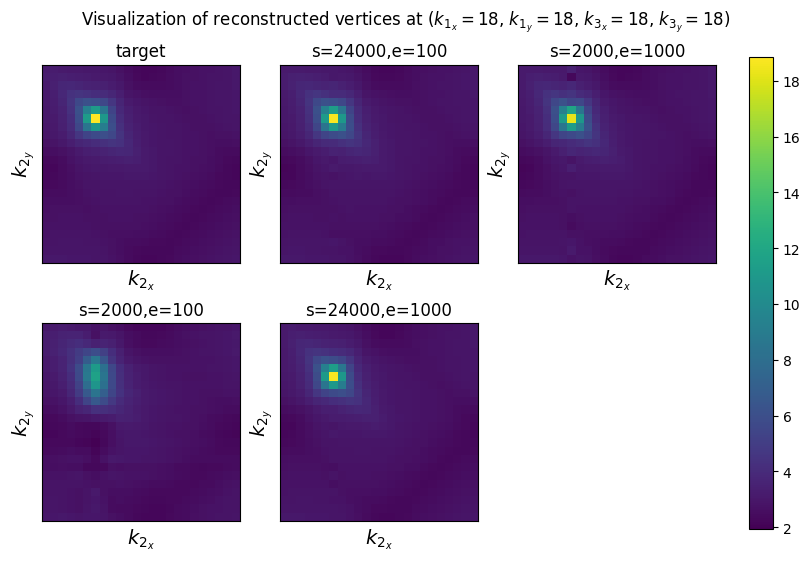

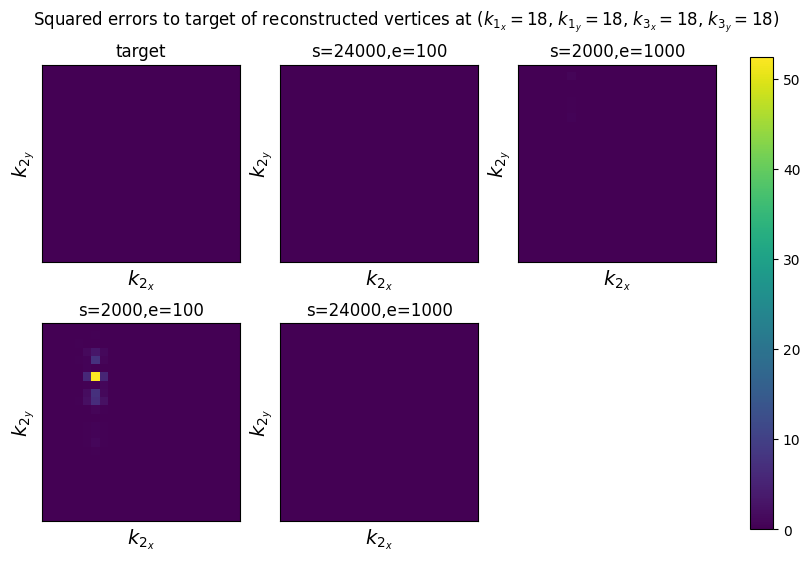

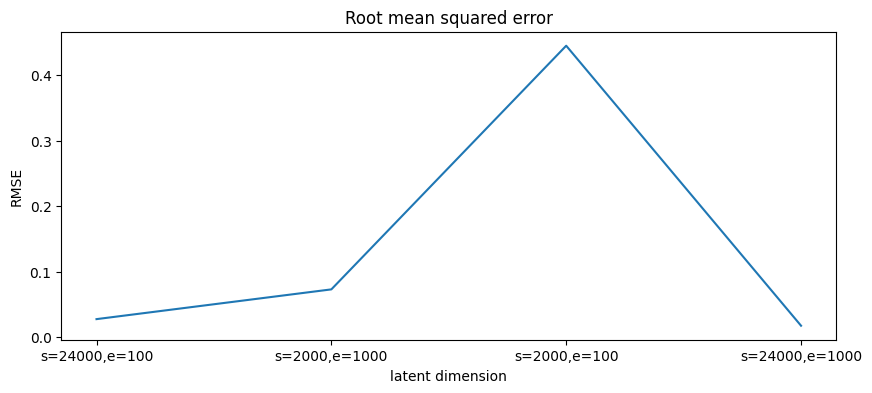

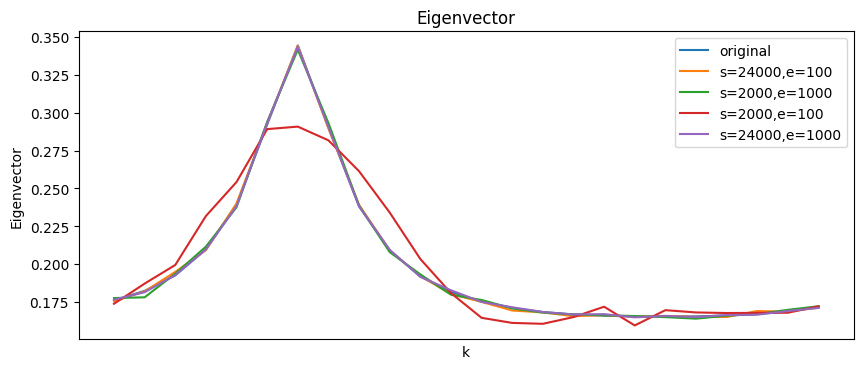

In [7]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.0320
   latent_dim=s=2000,e=1000: RMSE=0.0747
   latent_dim=s=2000,e=100: RMSE=0.4570
   latent_dim=s=24000,e=1000: RMSE=0.0179


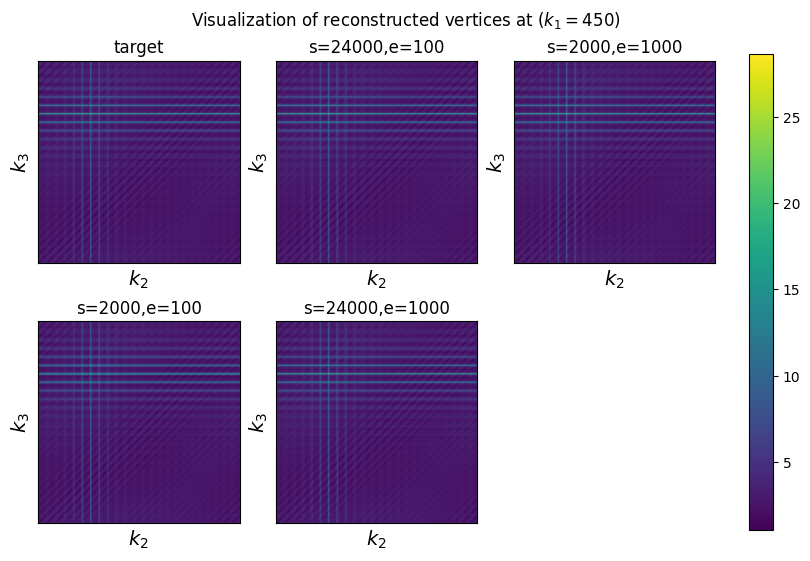

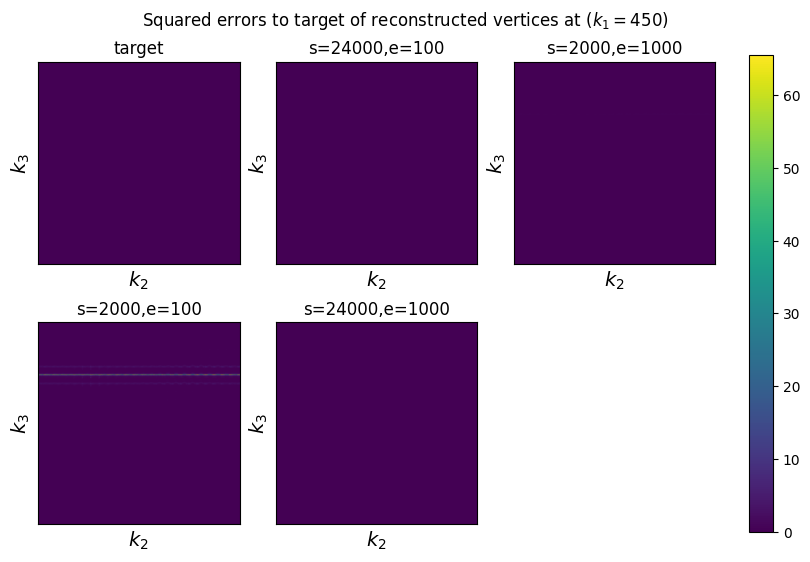

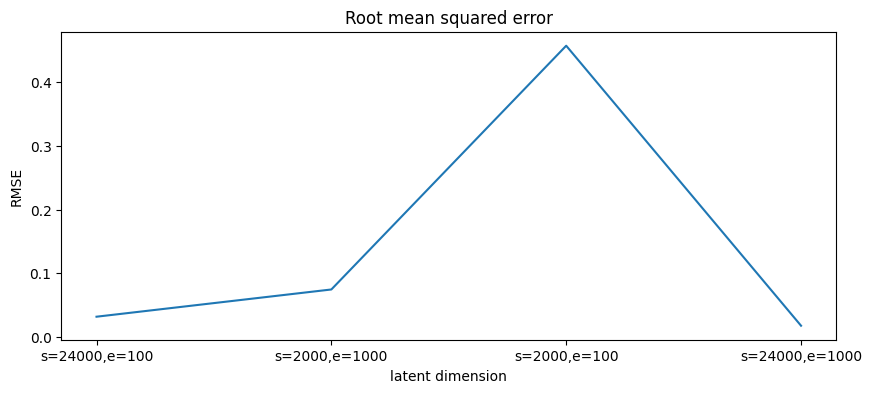

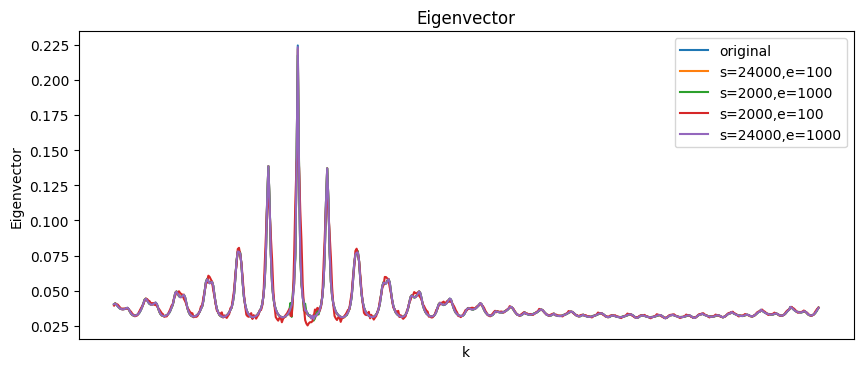

In [8]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_0/checkpoints/epoch=99-step=46900.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-08/version_1/checkpoints/epoch=997-step=39920.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS4096_2025-03-08/version_0/checkpoints/epoch=99-step=2000.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_1/checkpoints/epoch=998-step=117882.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.0679
   latent_dim=s=2000,e=1000: RMSE=0.0822
   latent_dim=s=2000,e=100: RMSE=0.4739
   latent_dim=s=24000,e=1000: RMSE=0.0194


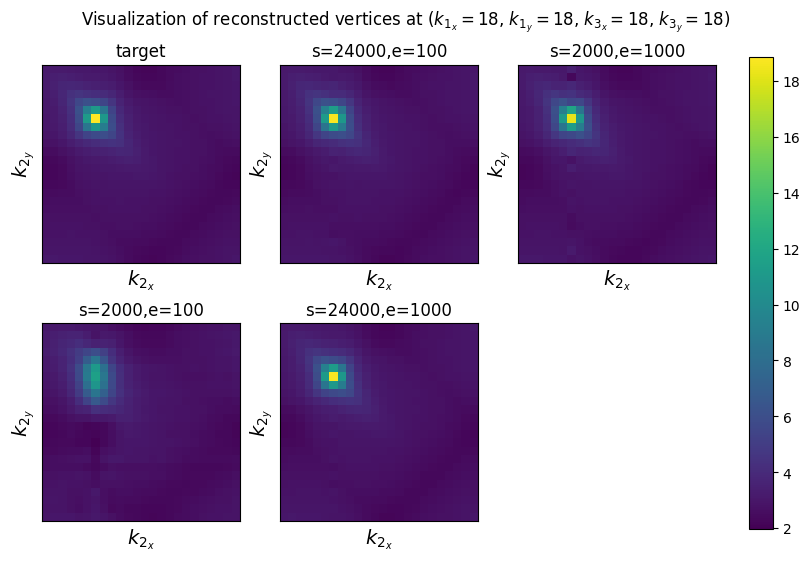

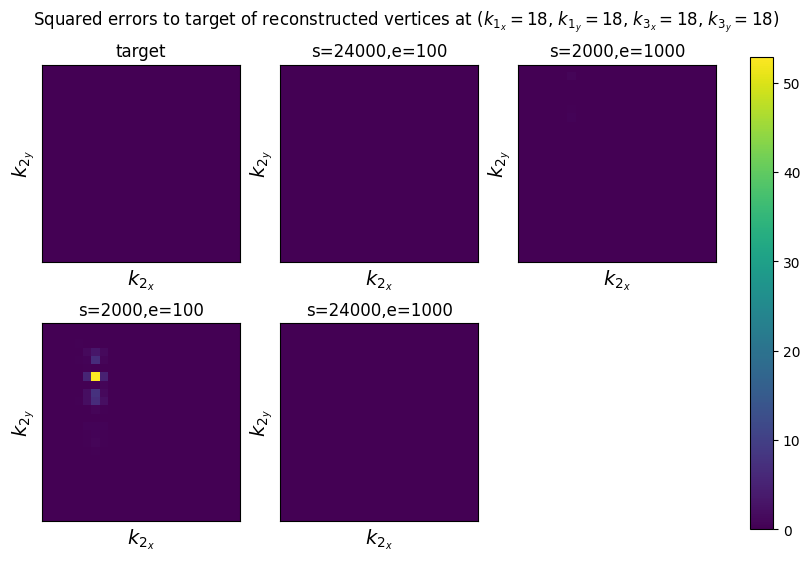

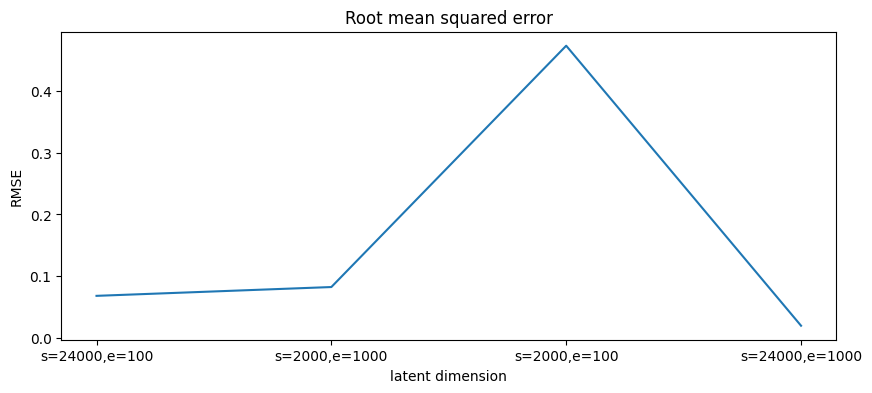

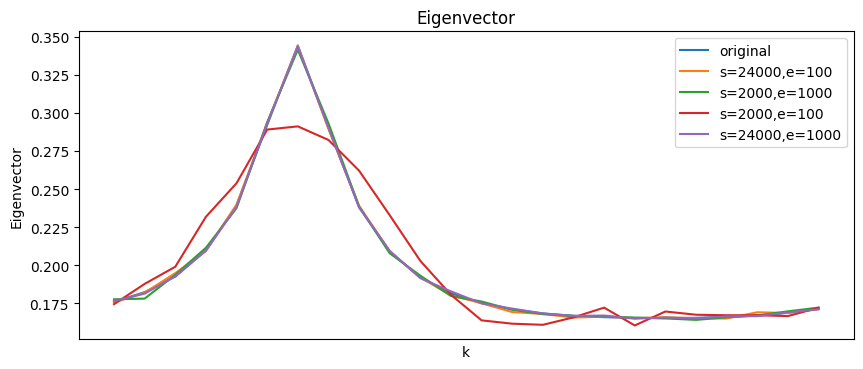

In [13]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.0679
   latent_dim=s=2000,e=1000: RMSE=0.0822
   latent_dim=s=2000,e=100: RMSE=0.4739
   latent_dim=s=24000,e=1000: RMSE=0.0194


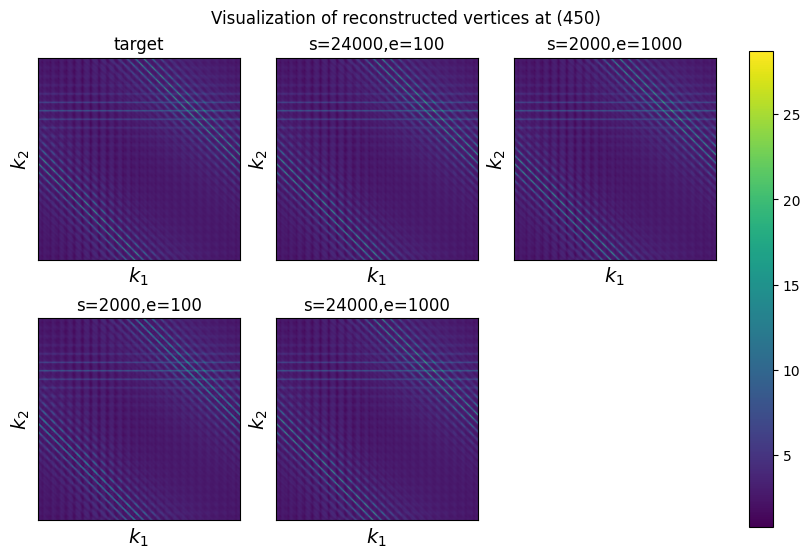

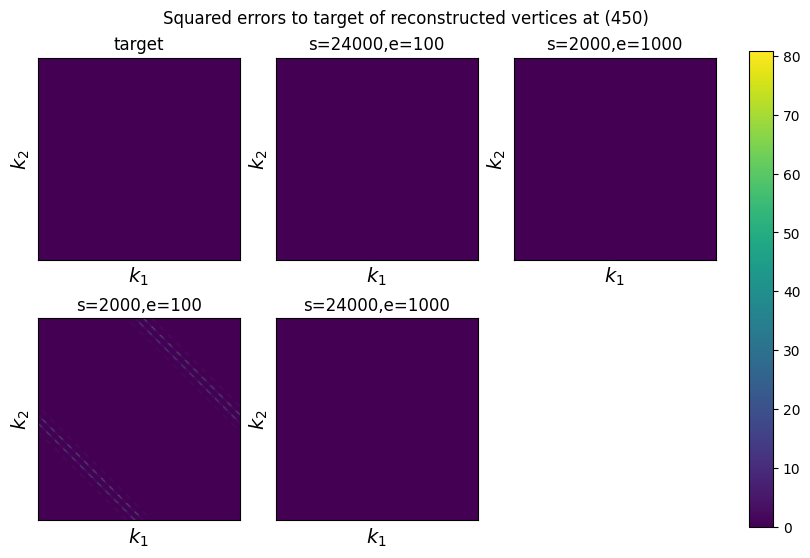

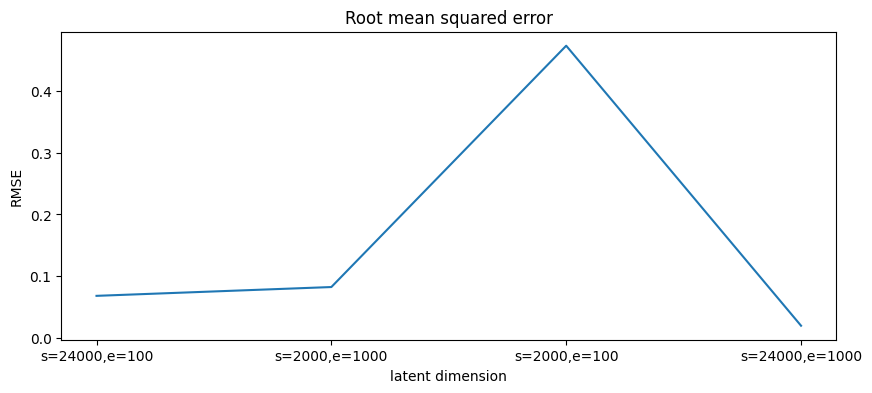

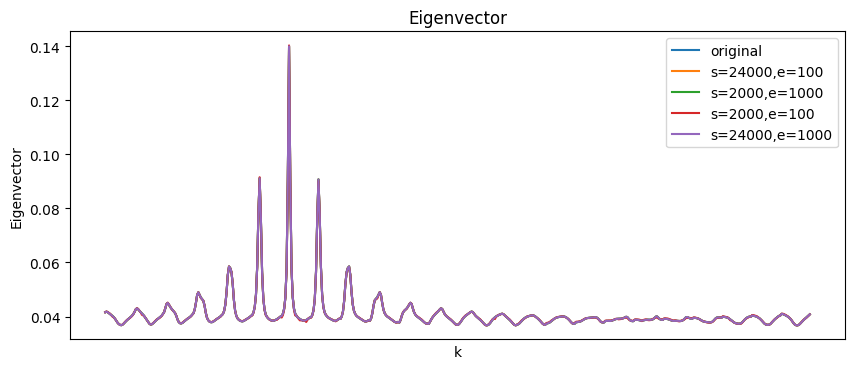

In [14]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

# 03 Latent dimension evaluation

* use most efficient sample- and epoch-count
* compare different layer sizes

In [18]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
config_kwargs = {'path_train': '../../../frgs_6d', 
                 'hidden_dims': [128, 64, 32],
                 'epochs': 100,
                 'sample_count_per_vertex': 24000, 
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 15, 
                 'strategy': 'auto', 
                 'batch_size': 8192}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [7]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 118: 'val_loss' reached 4.48584 (best 4.48584), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=0-step=118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 236: 'val_loss' reached 2.52052 (best 2.52052), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=1-step=236.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 354: 'val_loss' reached 2.07766 (best 2.07766), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=2-step=354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 472: 'val_loss' reached 1.75494 (best 1.75494), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=3-step=472.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 590: 'val_loss' reached 0.98456 (best 0.98456), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=4-step=590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 708: 'val_loss' reached 0.68186 (best 0.68186), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=5-step=708.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 826: 'val_loss' reached 0.59219 (best 0.59219), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=6-step=826.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 944: 'val_loss' reached 0.50953 (best 0.50953), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=7-step=944.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1062: 'val_loss' reached 0.43442 (best 0.43442), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=8-step=1062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1180: 'val_loss' reached 0.37980 (best 0.37980), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=9-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1298: 'val_loss' reached 0.33588 (best 0.33588), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=10-step=1298.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1416: 'val_loss' reached 0.29753 (best 0.29753), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=11-step=1416.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1534: 'val_loss' reached 0.26249 (best 0.26249), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=12-step=1534.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1652: 'val_loss' reached 0.23478 (best 0.23478), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=13-step=1652.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1770: 'val_loss' reached 0.21367 (best 0.21367), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=14-step=1770.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1888: 'val_loss' reached 0.19718 (best 0.19718), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=15-step=1888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2006: 'val_loss' reached 0.18382 (best 0.18382), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=16-step=2006.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2124: 'val_loss' reached 0.17208 (best 0.17208), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=17-step=2124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2242: 'val_loss' reached 0.16179 (best 0.16179), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=18-step=2242.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2360: 'val_loss' reached 0.15275 (best 0.15275), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=19-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2478: 'val_loss' reached 0.14496 (best 0.14496), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=20-step=2478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2596: 'val_loss' reached 0.13838 (best 0.13838), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=21-step=2596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2714: 'val_loss' reached 0.13179 (best 0.13179), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=22-step=2714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2832: 'val_loss' reached 0.12539 (best 0.12539), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=23-step=2832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 2950: 'val_loss' reached 0.11917 (best 0.11917), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=24-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3068: 'val_loss' reached 0.11441 (best 0.11441), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=25-step=3068.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3186: 'val_loss' reached 0.11039 (best 0.11039), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=26-step=3186.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3304: 'val_loss' reached 0.10679 (best 0.10679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=27-step=3304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3422: 'val_loss' reached 0.10370 (best 0.10370), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=28-step=3422.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3540: 'val_loss' reached 0.10104 (best 0.10104), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=29-step=3540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3658: 'val_loss' reached 0.09862 (best 0.09862), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=30-step=3658.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3776: 'val_loss' reached 0.09642 (best 0.09642), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=31-step=3776.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 3894: 'val_loss' reached 0.09427 (best 0.09427), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=32-step=3894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4012: 'val_loss' reached 0.09240 (best 0.09240), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=33-step=4012.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4130: 'val_loss' reached 0.09049 (best 0.09049), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=34-step=4130.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4248: 'val_loss' reached 0.08883 (best 0.08883), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=35-step=4248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4366: 'val_loss' reached 0.08735 (best 0.08735), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=36-step=4366.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4484: 'val_loss' reached 0.08578 (best 0.08578), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=37-step=4484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4602: 'val_loss' reached 0.08421 (best 0.08421), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=38-step=4602.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4720: 'val_loss' reached 0.08283 (best 0.08283), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=39-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 4838: 'val_loss' reached 0.08137 (best 0.08137), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=40-step=4838.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 4956: 'val_loss' reached 0.07985 (best 0.07985), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=41-step=4956.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 5074: 'val_loss' reached 0.07841 (best 0.07841), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=42-step=5074.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 5192: 'val_loss' reached 0.07698 (best 0.07698), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=43-step=5192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 5310: 'val_loss' reached 0.07555 (best 0.07555), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=44-step=5310.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 5428: 'val_loss' reached 0.07411 (best 0.07411), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=45-step=5428.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 5546: 'val_loss' reached 0.07278 (best 0.07278), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=46-step=5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 5664: 'val_loss' reached 0.07130 (best 0.07130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=47-step=5664.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 5782: 'val_loss' reached 0.06982 (best 0.06982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=48-step=5782.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 5900: 'val_loss' reached 0.06838 (best 0.06838), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=49-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 6018: 'val_loss' reached 0.06685 (best 0.06685), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=50-step=6018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 6136: 'val_loss' reached 0.06529 (best 0.06529), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=51-step=6136.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 6254: 'val_loss' reached 0.06382 (best 0.06382), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=52-step=6254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 6372: 'val_loss' reached 0.06266 (best 0.06266), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=53-step=6372.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 6490: 'val_loss' reached 0.06095 (best 0.06095), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=54-step=6490.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 6608: 'val_loss' reached 0.05938 (best 0.05938), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=55-step=6608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 6726: 'val_loss' reached 0.05781 (best 0.05781), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=56-step=6726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 6844: 'val_loss' reached 0.05630 (best 0.05630), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=57-step=6844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 6962: 'val_loss' reached 0.05476 (best 0.05476), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=58-step=6962.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 7080: 'val_loss' reached 0.05317 (best 0.05317), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=59-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 7198: 'val_loss' reached 0.05191 (best 0.05191), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=60-step=7198.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 7316: 'val_loss' reached 0.05045 (best 0.05045), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=61-step=7316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 7434: 'val_loss' reached 0.04919 (best 0.04919), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=62-step=7434.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 7552: 'val_loss' reached 0.04789 (best 0.04789), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=63-step=7552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 7670: 'val_loss' reached 0.04671 (best 0.04671), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=64-step=7670.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 7788: 'val_loss' reached 0.04549 (best 0.04549), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=65-step=7788.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 7906: 'val_loss' reached 0.04433 (best 0.04433), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=66-step=7906.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 8024: 'val_loss' reached 0.04331 (best 0.04331), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=67-step=8024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 8142: 'val_loss' reached 0.04253 (best 0.04253), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=68-step=8142.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 8260: 'val_loss' reached 0.04166 (best 0.04166), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=69-step=8260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 8378: 'val_loss' reached 0.04093 (best 0.04093), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=70-step=8378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 8496: 'val_loss' reached 0.04029 (best 0.04029), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=71-step=8496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 8614: 'val_loss' reached 0.03987 (best 0.03987), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=72-step=8614.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 8732: 'val_loss' reached 0.03898 (best 0.03898), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=73-step=8732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 8850: 'val_loss' reached 0.03849 (best 0.03849), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=74-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 8968: 'val_loss' reached 0.03790 (best 0.03790), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=75-step=8968.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 9086: 'val_loss' reached 0.03749 (best 0.03749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=76-step=9086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 9204: 'val_loss' reached 0.03701 (best 0.03701), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=77-step=9204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 9322: 'val_loss' reached 0.03660 (best 0.03660), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=78-step=9322.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 9440: 'val_loss' reached 0.03615 (best 0.03615), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=79-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 9558: 'val_loss' reached 0.03562 (best 0.03562), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=80-step=9558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 9676: 'val_loss' reached 0.03523 (best 0.03523), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=81-step=9676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 9794: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 9912: 'val_loss' reached 0.03438 (best 0.03438), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=83-step=9912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 10030: 'val_loss' reached 0.03406 (best 0.03406), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=84-step=10030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 10148: 'val_loss' reached 0.03359 (best 0.03359), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=85-step=10148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 10266: 'val_loss' reached 0.03331 (best 0.03331), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=86-step=10266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 10384: 'val_loss' reached 0.03292 (best 0.03292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=87-step=10384.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 10502: 'val_loss' reached 0.03256 (best 0.03256), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=88-step=10502.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 10620: 'val_loss' reached 0.03220 (best 0.03220), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=89-step=10620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 10738: 'val_loss' reached 0.03200 (best 0.03200), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=90-step=10738.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 10856: 'val_loss' reached 0.03156 (best 0.03156), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=91-step=10856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 10974: 'val_loss' reached 0.03134 (best 0.03134), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=92-step=10974.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 11092: 'val_loss' reached 0.03104 (best 0.03104), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=93-step=11092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 11210: 'val_loss' reached 0.03080 (best 0.03080), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=94-step=11210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 11328: 'val_loss' reached 0.03052 (best 0.03052), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=95-step=11328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 11446: 'val_loss' reached 0.03023 (best 0.03023), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=96-step=11446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 11564: 'val_loss' reached 0.03001 (best 0.03001), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=97-step=11564.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 11682: 'val_loss' reached 0.02975 (best 0.02975), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=98-step=11682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 11800: 'val_loss' reached 0.02963 (best 0.02963), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2'


In [8]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable params
33.6 K    Total params
0.135     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 118: 'val_loss' reached 6.62159 (best 6.62159), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=0-step=118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 236: 'val_loss' reached 2.60602 (best 2.60602), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=1-step=236.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 354: 'val_loss' reached 2.19752 (best 2.19752), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=2-step=354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 472: 'val_loss' reached 2.10548 (best 2.10548), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=3-step=472.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 590: 'val_loss' reached 2.09840 (best 2.09840), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=4-step=590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 708: 'val_loss' reached 2.06419 (best 2.06419), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=5-step=708.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 826: 'val_loss' reached 1.65764 (best 1.65764), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=6-step=826.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 944: 'val_loss' reached 1.42341 (best 1.42341), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=7-step=944.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1062: 'val_loss' reached 1.37357 (best 1.37357), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=8-step=1062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1180: 'val_loss' reached 1.33884 (best 1.33884), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=9-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1298: 'val_loss' reached 1.29571 (best 1.29571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=10-step=1298.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1416: 'val_loss' reached 0.84835 (best 0.84835), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=11-step=1416.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1534: 'val_loss' reached 0.57200 (best 0.57200), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=12-step=1534.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1652: 'val_loss' reached 0.49462 (best 0.49462), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=13-step=1652.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1770: 'val_loss' reached 0.43420 (best 0.43420), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=14-step=1770.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1888: 'val_loss' reached 0.39749 (best 0.39749), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=15-step=1888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2006: 'val_loss' reached 0.37422 (best 0.37422), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=16-step=2006.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2124: 'val_loss' reached 0.35584 (best 0.35584), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=17-step=2124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2242: 'val_loss' reached 0.34090 (best 0.34090), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=18-step=2242.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2360: 'val_loss' reached 0.32699 (best 0.32699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=19-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2478: 'val_loss' reached 0.31355 (best 0.31355), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=20-step=2478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2596: 'val_loss' reached 0.30096 (best 0.30096), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=21-step=2596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2714: 'val_loss' reached 0.28851 (best 0.28851), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=22-step=2714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2832: 'val_loss' reached 0.27601 (best 0.27601), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=23-step=2832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 2950: 'val_loss' reached 0.26325 (best 0.26325), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=24-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3068: 'val_loss' reached 0.24988 (best 0.24988), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=25-step=3068.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3186: 'val_loss' reached 0.23591 (best 0.23591), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=26-step=3186.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3304: 'val_loss' reached 0.22196 (best 0.22196), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=27-step=3304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3422: 'val_loss' reached 0.20958 (best 0.20958), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=28-step=3422.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3540: 'val_loss' reached 0.19986 (best 0.19986), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=29-step=3540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3658: 'val_loss' reached 0.19309 (best 0.19309), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=30-step=3658.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3776: 'val_loss' reached 0.18767 (best 0.18767), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=31-step=3776.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 3894: 'val_loss' reached 0.18286 (best 0.18286), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=32-step=3894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4012: 'val_loss' reached 0.17896 (best 0.17896), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=33-step=4012.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4130: 'val_loss' reached 0.17571 (best 0.17571), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=34-step=4130.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4248: 'val_loss' reached 0.17262 (best 0.17262), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=35-step=4248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4366: 'val_loss' reached 0.16979 (best 0.16979), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=36-step=4366.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4484: 'val_loss' reached 0.16745 (best 0.16745), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=37-step=4484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4602: 'val_loss' reached 0.16521 (best 0.16521), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=38-step=4602.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4720: 'val_loss' reached 0.16324 (best 0.16324), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=39-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 4838: 'val_loss' reached 0.16127 (best 0.16127), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=40-step=4838.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 4956: 'val_loss' reached 0.15984 (best 0.15984), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=41-step=4956.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 5074: 'val_loss' reached 0.15801 (best 0.15801), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=42-step=5074.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 5192: 'val_loss' reached 0.15670 (best 0.15670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=43-step=5192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 5310: 'val_loss' reached 0.15499 (best 0.15499), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=44-step=5310.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 5428: 'val_loss' reached 0.15390 (best 0.15390), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=45-step=5428.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 5546: 'val_loss' reached 0.15241 (best 0.15241), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=46-step=5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 5664: 'val_loss' reached 0.15130 (best 0.15130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=47-step=5664.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 5782: 'val_loss' reached 0.15013 (best 0.15013), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=48-step=5782.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 5900: 'val_loss' reached 0.14903 (best 0.14903), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=49-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 6018: 'val_loss' reached 0.14801 (best 0.14801), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=50-step=6018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 6136: 'val_loss' reached 0.14699 (best 0.14699), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=51-step=6136.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 6254: 'val_loss' reached 0.14588 (best 0.14588), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=52-step=6254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 6372: 'val_loss' reached 0.14496 (best 0.14496), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=53-step=6372.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 6490: 'val_loss' reached 0.14430 (best 0.14430), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=54-step=6490.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 6608: 'val_loss' reached 0.14284 (best 0.14284), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=55-step=6608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 6726: 'val_loss' reached 0.14186 (best 0.14186), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=56-step=6726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 6844: 'val_loss' reached 0.14072 (best 0.14072), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=57-step=6844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 6962: 'val_loss' reached 0.13993 (best 0.13993), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=58-step=6962.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 7080: 'val_loss' reached 0.13870 (best 0.13870), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=59-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 7198: 'val_loss' reached 0.13765 (best 0.13765), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=60-step=7198.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 7316: 'val_loss' reached 0.13621 (best 0.13621), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=61-step=7316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 7434: 'val_loss' reached 0.13497 (best 0.13497), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=62-step=7434.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 7552: 'val_loss' reached 0.13342 (best 0.13342), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=63-step=7552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 7670: 'val_loss' reached 0.13190 (best 0.13190), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=64-step=7670.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 7788: 'val_loss' reached 0.13014 (best 0.13014), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=65-step=7788.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 7906: 'val_loss' reached 0.12879 (best 0.12879), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=66-step=7906.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 8024: 'val_loss' reached 0.12760 (best 0.12760), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=67-step=8024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 8142: 'val_loss' reached 0.12568 (best 0.12568), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=68-step=8142.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 8260: 'val_loss' reached 0.12428 (best 0.12428), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=69-step=8260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 8378: 'val_loss' reached 0.12299 (best 0.12299), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=70-step=8378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 8496: 'val_loss' reached 0.12199 (best 0.12199), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=71-step=8496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 8614: 'val_loss' reached 0.12078 (best 0.12078), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=72-step=8614.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 8732: 'val_loss' reached 0.11959 (best 0.11959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=73-step=8732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 8850: 'val_loss' reached 0.11851 (best 0.11851), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=74-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 8968: 'val_loss' reached 0.11736 (best 0.11736), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=75-step=8968.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 9086: 'val_loss' reached 0.11632 (best 0.11632), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=76-step=9086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 9204: 'val_loss' reached 0.11497 (best 0.11497), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=77-step=9204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 9322: 'val_loss' reached 0.11364 (best 0.11364), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=78-step=9322.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 9440: 'val_loss' reached 0.11292 (best 0.11292), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=79-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 9558: 'val_loss' reached 0.11102 (best 0.11102), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=80-step=9558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 9676: 'val_loss' reached 0.10954 (best 0.10954), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=81-step=9676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 9794: 'val_loss' reached 0.10825 (best 0.10825), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=82-step=9794.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 9912: 'val_loss' reached 0.10679 (best 0.10679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=83-step=9912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 10030: 'val_loss' reached 0.10547 (best 0.10547), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=84-step=10030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 10148: 'val_loss' reached 0.10471 (best 0.10471), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=85-step=10148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 10266: 'val_loss' reached 0.10356 (best 0.10356), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=86-step=10266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 10384: 'val_loss' reached 0.10240 (best 0.10240), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=87-step=10384.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 10502: 'val_loss' reached 0.10150 (best 0.10150), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=88-step=10502.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 10620: 'val_loss' reached 0.10075 (best 0.10075), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=89-step=10620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 10738: 'val_loss' reached 0.09975 (best 0.09975), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=90-step=10738.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 10856: 'val_loss' reached 0.09936 (best 0.09936), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=91-step=10856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 10974: 'val_loss' reached 0.09822 (best 0.09822), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=92-step=10974.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 11092: 'val_loss' reached 0.09752 (best 0.09752), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=93-step=11092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 11210: 'val_loss' reached 0.09742 (best 0.09742), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=94-step=11210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 11328: 'val_loss' reached 0.09632 (best 0.09632), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=95-step=11328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 11446: 'val_loss' reached 0.09569 (best 0.09569), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=96-step=11446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 11564: 'val_loss' reached 0.09512 (best 0.09512), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=97-step=11564.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 11682: 'val_loss' reached 0.09466 (best 0.09466), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=98-step=11682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 11800: 'val_loss' reached 0.09393 (best 0.09393), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 16
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3'


In [9]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 118: 'val_loss' reached 4.61384 (best 4.61384), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=0-step=118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 236: 'val_loss' reached 2.63252 (best 2.63252), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=1-step=236.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 354: 'val_loss' reached 2.23816 (best 2.23816), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=2-step=354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 472: 'val_loss' reached 2.10728 (best 2.10728), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=3-step=472.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 590: 'val_loss' reached 2.10484 (best 2.10484), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=4-step=590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 708: 'val_loss' reached 2.10187 (best 2.10187), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=5-step=708.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 826: 'val_loss' reached 2.08417 (best 2.08417), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=6-step=826.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 944: 'val_loss' reached 1.86952 (best 1.86952), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=7-step=944.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1062: 'val_loss' reached 1.42875 (best 1.42875), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=8-step=1062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1180: 'val_loss' reached 1.32226 (best 1.32226), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=9-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1298: 'val_loss' reached 0.93941 (best 0.93941), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=10-step=1298.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1416: 'val_loss' reached 0.60225 (best 0.60225), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=11-step=1416.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1534: 'val_loss' reached 0.50312 (best 0.50312), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=12-step=1534.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1652: 'val_loss' reached 0.43517 (best 0.43517), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=13-step=1652.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1770: 'val_loss' reached 0.39494 (best 0.39494), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=14-step=1770.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1888: 'val_loss' reached 0.36925 (best 0.36925), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=15-step=1888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2006: 'val_loss' reached 0.34891 (best 0.34891), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=16-step=2006.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2124: 'val_loss' reached 0.33418 (best 0.33418), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=17-step=2124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2242: 'val_loss' reached 0.32263 (best 0.32263), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=18-step=2242.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2360: 'val_loss' reached 0.31138 (best 0.31138), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=19-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2478: 'val_loss' reached 0.30065 (best 0.30065), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=20-step=2478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2596: 'val_loss' reached 0.28845 (best 0.28845), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=21-step=2596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2714: 'val_loss' reached 0.27353 (best 0.27353), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=22-step=2714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2832: 'val_loss' reached 0.25832 (best 0.25832), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=23-step=2832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 2950: 'val_loss' reached 0.24715 (best 0.24715), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=24-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3068: 'val_loss' reached 0.23937 (best 0.23937), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=25-step=3068.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3186: 'val_loss' reached 0.23361 (best 0.23361), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=26-step=3186.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3304: 'val_loss' reached 0.22869 (best 0.22869), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=27-step=3304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3422: 'val_loss' reached 0.22434 (best 0.22434), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=28-step=3422.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3540: 'val_loss' reached 0.22065 (best 0.22065), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=29-step=3540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3658: 'val_loss' reached 0.21716 (best 0.21716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=30-step=3658.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3776: 'val_loss' reached 0.21404 (best 0.21404), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=31-step=3776.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 3894: 'val_loss' reached 0.21087 (best 0.21087), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=32-step=3894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4012: 'val_loss' reached 0.20804 (best 0.20804), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=33-step=4012.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4130: 'val_loss' reached 0.20514 (best 0.20514), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=34-step=4130.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4248: 'val_loss' reached 0.20238 (best 0.20238), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=35-step=4248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4366: 'val_loss' reached 0.19941 (best 0.19941), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=36-step=4366.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4484: 'val_loss' reached 0.19656 (best 0.19656), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=37-step=4484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4602: 'val_loss' reached 0.19288 (best 0.19288), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=38-step=4602.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4720: 'val_loss' reached 0.18754 (best 0.18754), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=39-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 4838: 'val_loss' reached 0.18060 (best 0.18060), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=40-step=4838.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 4956: 'val_loss' reached 0.17316 (best 0.17316), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=41-step=4956.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 5074: 'val_loss' reached 0.16530 (best 0.16530), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=42-step=5074.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 5192: 'val_loss' reached 0.15824 (best 0.15824), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=43-step=5192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 5310: 'val_loss' reached 0.15315 (best 0.15315), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=44-step=5310.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 5428: 'val_loss' reached 0.14999 (best 0.14999), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=45-step=5428.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 5546: 'val_loss' reached 0.14732 (best 0.14732), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=46-step=5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 5664: 'val_loss' reached 0.14527 (best 0.14527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=47-step=5664.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 5782: 'val_loss' reached 0.14357 (best 0.14357), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=48-step=5782.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 5900: 'val_loss' reached 0.14205 (best 0.14205), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=49-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 6018: 'val_loss' reached 0.14093 (best 0.14093), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=50-step=6018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 6136: 'val_loss' reached 0.13959 (best 0.13959), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=51-step=6136.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 6254: 'val_loss' reached 0.13821 (best 0.13821), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=52-step=6254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 6372: 'val_loss' reached 0.13692 (best 0.13692), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=53-step=6372.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 6490: 'val_loss' reached 0.13586 (best 0.13586), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=54-step=6490.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 6608: 'val_loss' reached 0.13465 (best 0.13465), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=55-step=6608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 6726: 'val_loss' reached 0.13357 (best 0.13357), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=56-step=6726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 6844: 'val_loss' reached 0.13260 (best 0.13260), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=57-step=6844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 6962: 'val_loss' reached 0.13138 (best 0.13138), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=58-step=6962.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 7080: 'val_loss' reached 0.13030 (best 0.13030), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=59-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 7198: 'val_loss' reached 0.12902 (best 0.12902), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=60-step=7198.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 7316: 'val_loss' reached 0.12804 (best 0.12804), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=61-step=7316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 7434: 'val_loss' reached 0.12716 (best 0.12716), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=62-step=7434.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 7552: 'val_loss' reached 0.12547 (best 0.12547), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=63-step=7552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 7670: 'val_loss' reached 0.12400 (best 0.12400), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=64-step=7670.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 7788: 'val_loss' reached 0.12286 (best 0.12286), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=65-step=7788.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 7906: 'val_loss' reached 0.12171 (best 0.12171), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=66-step=7906.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 8024: 'val_loss' reached 0.12093 (best 0.12093), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=67-step=8024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 8142: 'val_loss' reached 0.11962 (best 0.11962), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=68-step=8142.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 8260: 'val_loss' reached 0.11865 (best 0.11865), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=69-step=8260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 8378: 'val_loss' reached 0.11765 (best 0.11765), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=70-step=8378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 8496: 'val_loss' reached 0.11722 (best 0.11722), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=71-step=8496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 8614: 'val_loss' reached 0.11564 (best 0.11564), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=72-step=8614.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 8732: 'val_loss' reached 0.11471 (best 0.11471), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=73-step=8732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 8850: 'val_loss' reached 0.11396 (best 0.11396), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=74-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 8968: 'val_loss' reached 0.11310 (best 0.11310), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=75-step=8968.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 9086: 'val_loss' reached 0.11262 (best 0.11262), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=76-step=9086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 9204: 'val_loss' reached 0.11178 (best 0.11178), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=77-step=9204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 9322: 'val_loss' reached 0.11129 (best 0.11129), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=78-step=9322.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 9440: 'val_loss' reached 0.11032 (best 0.11032), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=79-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 9558: 'val_loss' reached 0.10990 (best 0.10990), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=80-step=9558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 9676: 'val_loss' reached 0.10908 (best 0.10908), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=81-step=9676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 9794: 'val_loss' reached 0.10851 (best 0.10851), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=82-step=9794.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 9912: 'val_loss' reached 0.10801 (best 0.10801), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=83-step=9912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 10030: 'val_loss' reached 0.10740 (best 0.10740), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=84-step=10030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 10148: 'val_loss' reached 0.10696 (best 0.10696), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=85-step=10148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 10266: 'val_loss' reached 0.10618 (best 0.10618), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=86-step=10266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 10384: 'val_loss' reached 0.10560 (best 0.10560), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=87-step=10384.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 10502: 'val_loss' reached 0.10512 (best 0.10512), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=88-step=10502.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 10620: 'val_loss' reached 0.10437 (best 0.10437), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=89-step=10620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 10738: 'val_loss' reached 0.10376 (best 0.10376), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=90-step=10738.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 10856: 'val_loss' reached 0.10317 (best 0.10317), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=91-step=10856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 10974: 'val_loss' reached 0.10273 (best 0.10273), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=92-step=10974.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 11092: 'val_loss' reached 0.10207 (best 0.10207), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=93-step=11092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 11210: 'val_loss' reached 0.10138 (best 0.10138), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=94-step=11210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 11328: 'val_loss' reached 0.10100 (best 0.10100), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=95-step=11328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 11446: 'val_loss' reached 0.10038 (best 0.10038), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=96-step=11446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 11564: 'val_loss' reached 0.09968 (best 0.09968), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=97-step=11564.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 11682: 'val_loss' reached 0.09896 (best 0.09896), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=98-step=11682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 11800: 'val_loss' reached 0.09844 (best 0.09844), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 8
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4'


In [10]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 118: 'val_loss' reached 12.24822 (best 12.24822), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=0-step=118.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 236: 'val_loss' reached 4.47792 (best 4.47792), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=1-step=236.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 354: 'val_loss' reached 2.80125 (best 2.80125), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=2-step=354.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 472: 'val_loss' reached 2.40891 (best 2.40891), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=3-step=472.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 590: 'val_loss' reached 2.18187 (best 2.18187), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=4-step=590.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 708: 'val_loss' reached 2.11064 (best 2.11064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=5-step=708.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 826: 'val_loss' reached 2.10668 (best 2.10668), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=6-step=826.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 944: 'val_loss' reached 2.10437 (best 2.10437), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=7-step=944.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1062: 'val_loss' reached 2.10052 (best 2.10052), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=8-step=1062.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1180: 'val_loss' reached 2.09263 (best 2.09263), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=9-step=1180.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1298: 'val_loss' reached 2.06794 (best 2.06794), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=10-step=1298.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1416: 'val_loss' reached 1.98395 (best 1.98395), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=11-step=1416.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1534: 'val_loss' reached 1.77607 (best 1.77607), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=12-step=1534.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1652: 'val_loss' reached 1.54535 (best 1.54535), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=13-step=1652.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1770: 'val_loss' reached 1.44898 (best 1.44898), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=14-step=1770.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1888: 'val_loss' reached 1.42502 (best 1.42502), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=15-step=1888.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2006: 'val_loss' reached 1.41536 (best 1.41536), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=16-step=2006.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2124: 'val_loss' reached 1.40826 (best 1.40826), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=17-step=2124.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2242: 'val_loss' reached 1.40156 (best 1.40156), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=18-step=2242.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2360: 'val_loss' reached 1.39464 (best 1.39464), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=19-step=2360.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2478: 'val_loss' reached 1.38700 (best 1.38700), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=20-step=2478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2596: 'val_loss' reached 1.37353 (best 1.37353), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=21-step=2596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2714: 'val_loss' reached 1.35775 (best 1.35775), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=22-step=2714.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2832: 'val_loss' reached 1.34602 (best 1.34602), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=23-step=2832.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 2950: 'val_loss' reached 1.33740 (best 1.33740), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=24-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3068: 'val_loss' reached 1.33066 (best 1.33066), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=25-step=3068.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3186: 'val_loss' reached 1.32449 (best 1.32449), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=26-step=3186.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3304: 'val_loss' reached 1.31948 (best 1.31948), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=27-step=3304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3422: 'val_loss' reached 1.31498 (best 1.31498), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=28-step=3422.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3540: 'val_loss' reached 1.31064 (best 1.31064), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=29-step=3540.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3658: 'val_loss' reached 1.30614 (best 1.30614), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=30-step=3658.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3776: 'val_loss' reached 1.30149 (best 1.30149), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=31-step=3776.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 3894: 'val_loss' reached 1.29649 (best 1.29649), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=32-step=3894.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4012: 'val_loss' reached 1.29130 (best 1.29130), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=33-step=4012.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4130: 'val_loss' reached 1.28557 (best 1.28557), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=34-step=4130.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4248: 'val_loss' reached 1.27982 (best 1.27982), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=35-step=4248.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4366: 'val_loss' reached 1.27275 (best 1.27275), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=36-step=4366.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4484: 'val_loss' reached 1.26487 (best 1.26487), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=37-step=4484.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4602: 'val_loss' reached 1.25561 (best 1.25561), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=38-step=4602.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4720: 'val_loss' reached 1.24582 (best 1.24582), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=39-step=4720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 4838: 'val_loss' reached 1.23822 (best 1.23822), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=40-step=4838.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 4956: 'val_loss' reached 1.22662 (best 1.22662), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=41-step=4956.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 5074: 'val_loss' reached 1.21724 (best 1.21724), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=42-step=5074.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 5192: 'val_loss' reached 1.20679 (best 1.20679), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=43-step=5192.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 5310: 'val_loss' reached 1.19783 (best 1.19783), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=44-step=5310.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 5428: 'val_loss' reached 1.18930 (best 1.18930), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=45-step=5428.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 5546: 'val_loss' reached 1.18017 (best 1.18017), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=46-step=5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 5664: 'val_loss' reached 1.17253 (best 1.17253), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=47-step=5664.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 5782: 'val_loss' reached 1.16527 (best 1.16527), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=48-step=5782.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 5900: 'val_loss' reached 1.15853 (best 1.15853), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=49-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 6018: 'val_loss' reached 1.15118 (best 1.15118), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=50-step=6018.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 6136: 'val_loss' reached 1.14500 (best 1.14500), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=51-step=6136.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 6254: 'val_loss' reached 1.13941 (best 1.13941), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=52-step=6254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 6372: 'val_loss' reached 1.13260 (best 1.13260), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=53-step=6372.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 6490: 'val_loss' reached 1.12669 (best 1.12669), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=54-step=6490.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 6608: 'val_loss' reached 1.12045 (best 1.12045), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=55-step=6608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 6726: 'val_loss' reached 1.11399 (best 1.11399), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=56-step=6726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 6844: 'val_loss' reached 1.10789 (best 1.10789), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=57-step=6844.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 6962: 'val_loss' reached 1.10123 (best 1.10123), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=58-step=6962.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 7080: 'val_loss' reached 1.09622 (best 1.09622), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=59-step=7080.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 7198: 'val_loss' reached 1.08912 (best 1.08912), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=60-step=7198.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 7316: 'val_loss' reached 1.07849 (best 1.07849), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=61-step=7316.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 7434: 'val_loss' reached 1.07243 (best 1.07243), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=62-step=7434.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 7552: 'val_loss' reached 1.06381 (best 1.06381), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=63-step=7552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 7670: 'val_loss' reached 1.05708 (best 1.05708), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=64-step=7670.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 7788: 'val_loss' reached 1.05216 (best 1.05216), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=65-step=7788.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 7906: 'val_loss' reached 1.04341 (best 1.04341), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=66-step=7906.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 8024: 'val_loss' reached 1.03732 (best 1.03732), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=67-step=8024.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 8142: 'val_loss' reached 1.03272 (best 1.03272), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=68-step=8142.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 8260: 'val_loss' reached 1.02578 (best 1.02578), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=69-step=8260.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 8378: 'val_loss' reached 1.02039 (best 1.02039), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=70-step=8378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 8496: 'val_loss' reached 1.01432 (best 1.01432), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=71-step=8496.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 8614: 'val_loss' reached 1.00883 (best 1.00883), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=72-step=8614.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 8732: 'val_loss' reached 1.00418 (best 1.00418), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=73-step=8732.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 8850: 'val_loss' reached 0.99937 (best 0.99937), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=74-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 8968: 'val_loss' reached 0.99309 (best 0.99309), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=75-step=8968.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 9086: 'val_loss' reached 0.98945 (best 0.98945), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=76-step=9086.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 9204: 'val_loss' reached 0.98381 (best 0.98381), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=77-step=9204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 9322: 'val_loss' reached 0.98313 (best 0.98313), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=78-step=9322.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 9440: 'val_loss' reached 0.97629 (best 0.97629), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=79-step=9440.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 9558: 'val_loss' reached 0.97330 (best 0.97330), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=80-step=9558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 9676: 'val_loss' reached 0.96757 (best 0.96757), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=81-step=9676.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 9794: 'val_loss' reached 0.96384 (best 0.96384), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=82-step=9794.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 9912: 'val_loss' reached 0.96158 (best 0.96158), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=83-step=9912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 10030: 'val_loss' reached 0.95750 (best 0.95750), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=84-step=10030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 10148: 'val_loss' reached 0.95357 (best 0.95357), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=85-step=10148.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 10266: 'val_loss' reached 0.95011 (best 0.95011), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=86-step=10266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 10384: 'val_loss' reached 0.94670 (best 0.94670), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=87-step=10384.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 10502: 'val_loss' reached 0.94441 (best 0.94441), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=88-step=10502.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 10620: 'val_loss' reached 0.94119 (best 0.94119), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=89-step=10620.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 10738: 'val_loss' reached 0.93877 (best 0.93877), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=90-step=10738.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 10856: 'val_loss' reached 0.93498 (best 0.93498), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=91-step=10856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 10974: 'val_loss' reached 0.93129 (best 0.93129), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=92-step=10974.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 11092: 'val_loss' reached 0.92841 (best 0.92841), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=93-step=11092.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 11210: 'val_loss' reached 0.92573 (best 0.92573), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=94-step=11210.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 11328: 'val_loss' reached 0.92225 (best 0.92225), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=95-step=11328.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 11446: 'val_loss' reached 0.91956 (best 0.91956), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=96-step=11446.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 11564: 'val_loss' reached 0.91659 (best 0.91659), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=97-step=11564.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 11682: 'val_loss' reached 0.91264 (best 0.91264), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=98-step=11682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 11800: 'val_loss' reached 0.90827 (best 0.90827), saving model to '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 4
>>> save_path: '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5'


## evaluate prediction

In [19]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f"n={x['latent_dim']}" for x in info]
trainer = init_trainer(device_type='cpu', batch_size=8192, num_dataloader_workers=4)
#trainer = init_trainer(device_type='cpu', devices=64, batch_size=2048, num_dataloader_workers=16)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt
/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_work

Predicting: |          | 0/? [00:00<?, ?it/s]

/home/fs71925/shepp123/.local/lib/python3.11/site-packages/lightning/pytorch/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=n=32: RMSE=0.0982
   latent_dim=n=16: RMSE=0.2768
   latent_dim=n=8: RMSE=0.1676
   latent_dim=n=4: RMSE=1.0288


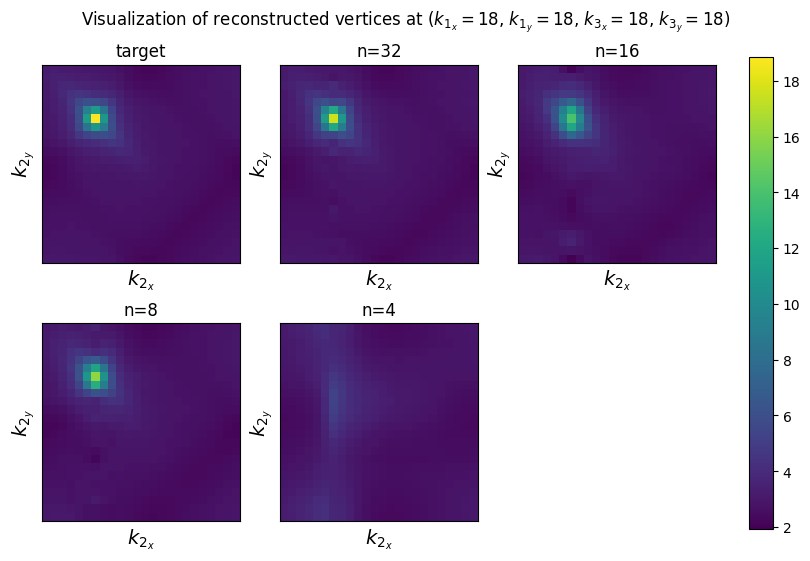

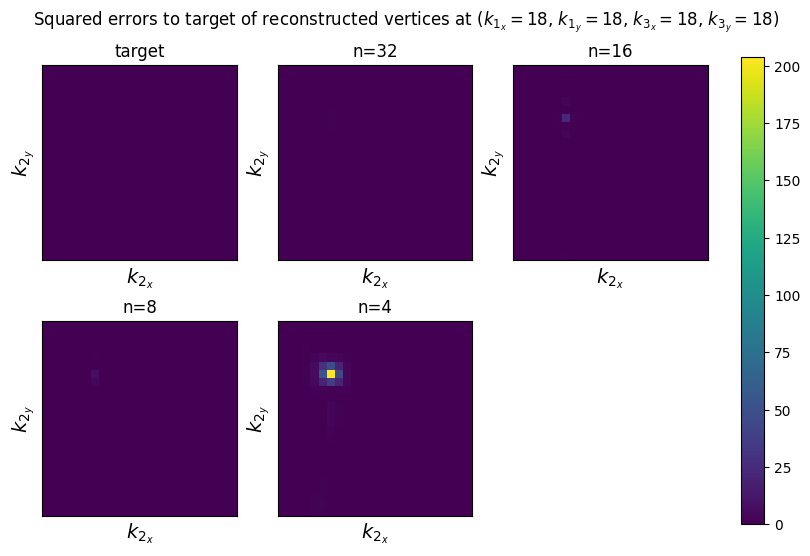

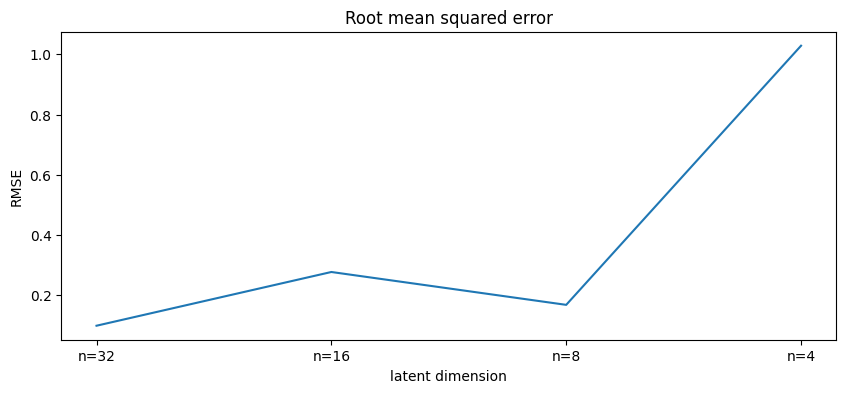

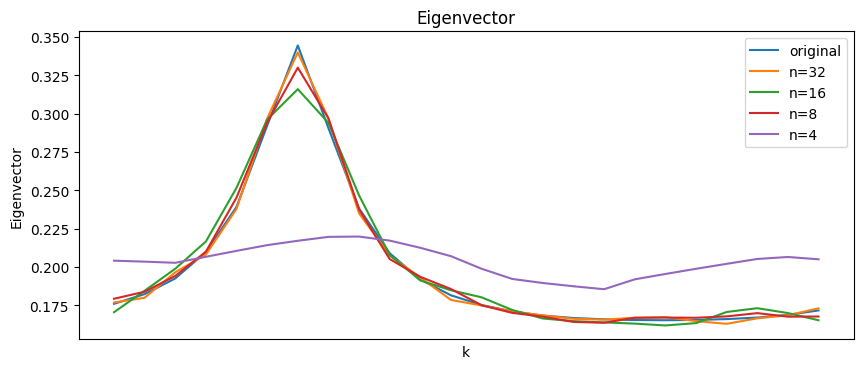

In [20]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=n=32: RMSE=0.1027
   latent_dim=n=16: RMSE=0.2803
   latent_dim=n=8: RMSE=0.1843
   latent_dim=n=4: RMSE=1.2764


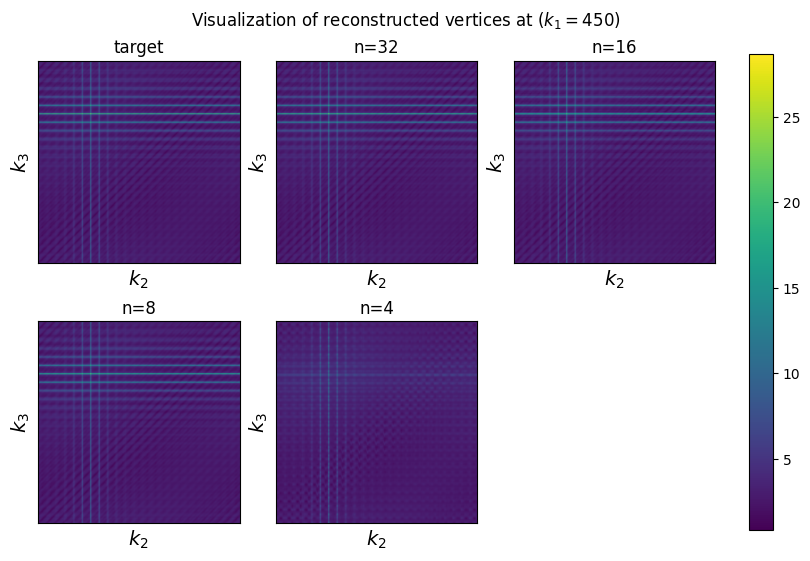

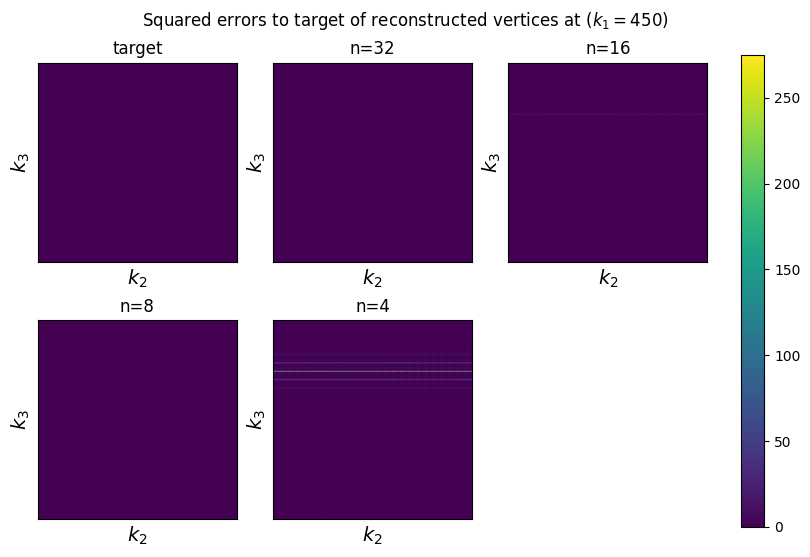

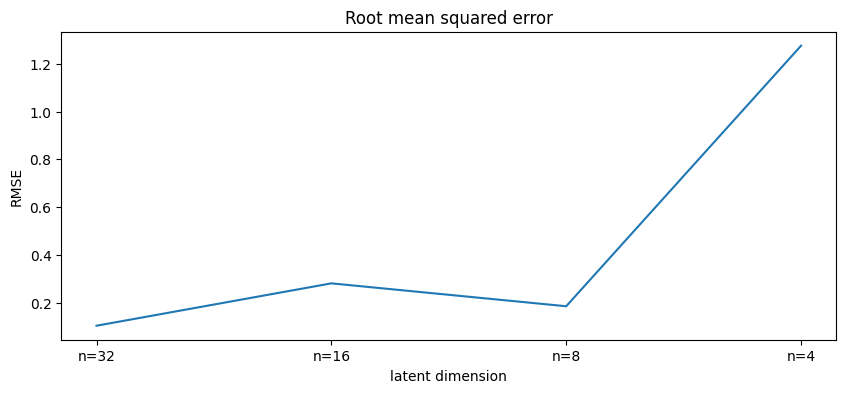

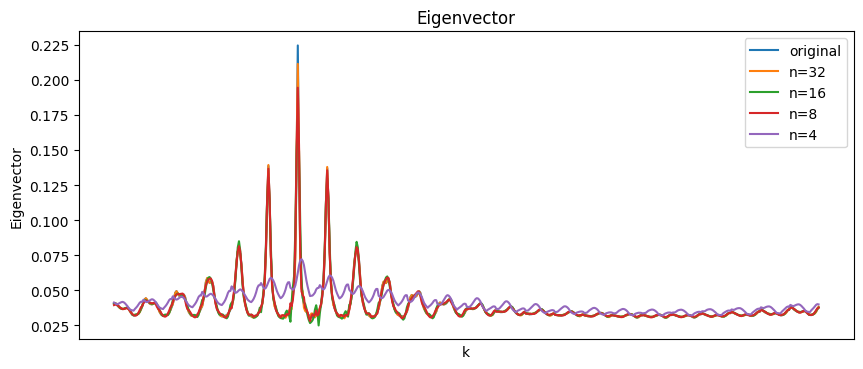

In [21]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_3/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_4/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt
Loaded model weights from the checkpoint at /gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_5/checkpoints/epoch=99-step=11800.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=n=32: RMSE=0.1179
   latent_dim=n=16: RMSE=0.2584
   latent_dim=n=8: RMSE=0.2356
   latent_dim=n=4: RMSE=0.8983


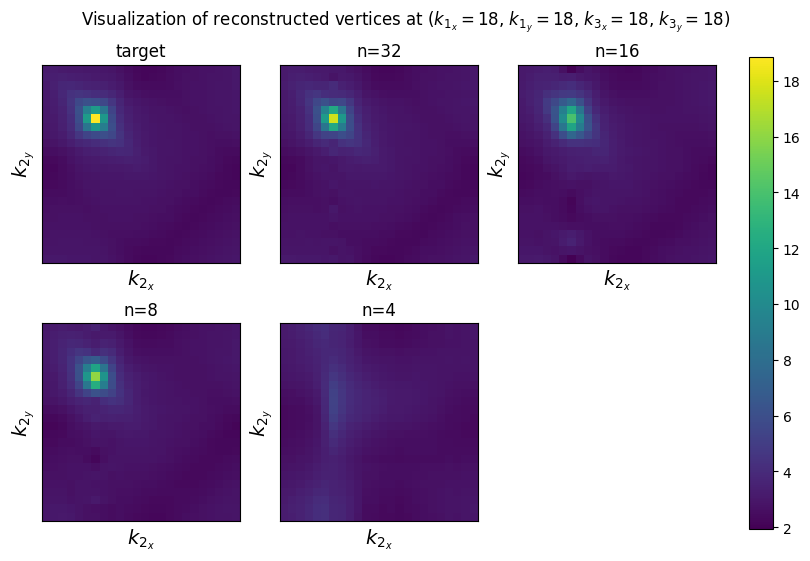

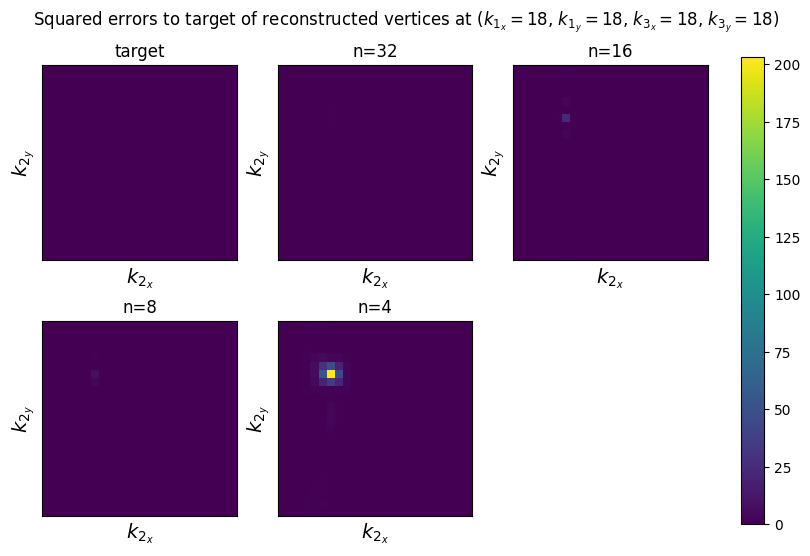

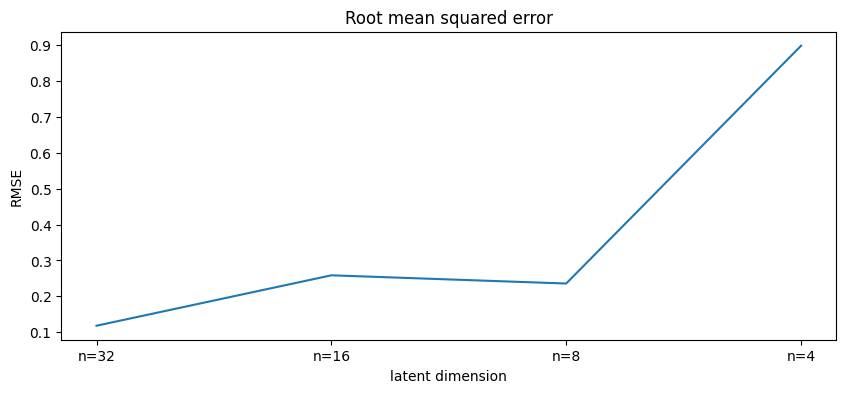

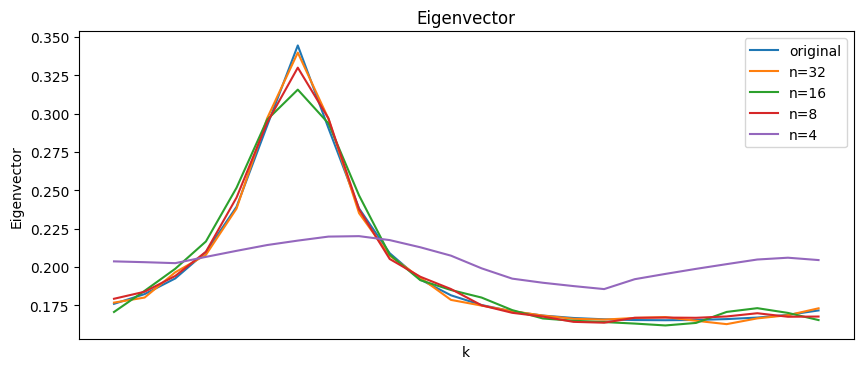

In [22]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=n=32: RMSE=0.1179
   latent_dim=n=16: RMSE=0.2584
   latent_dim=n=8: RMSE=0.2356
   latent_dim=n=4: RMSE=0.8983


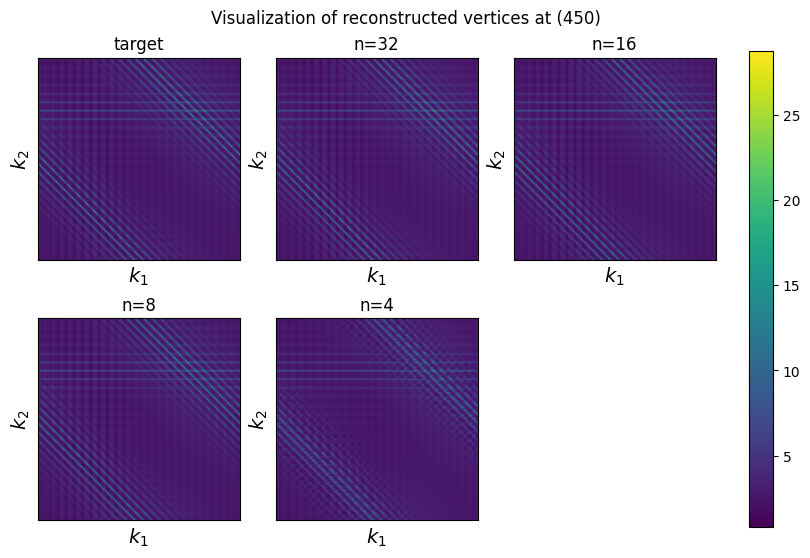

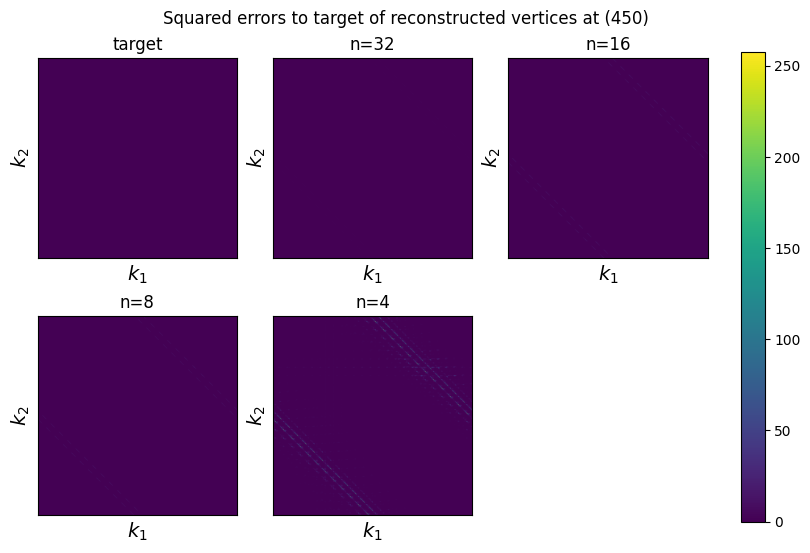

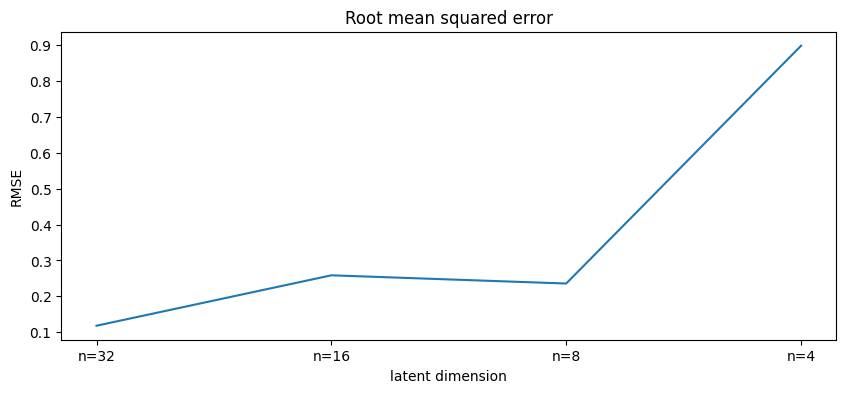

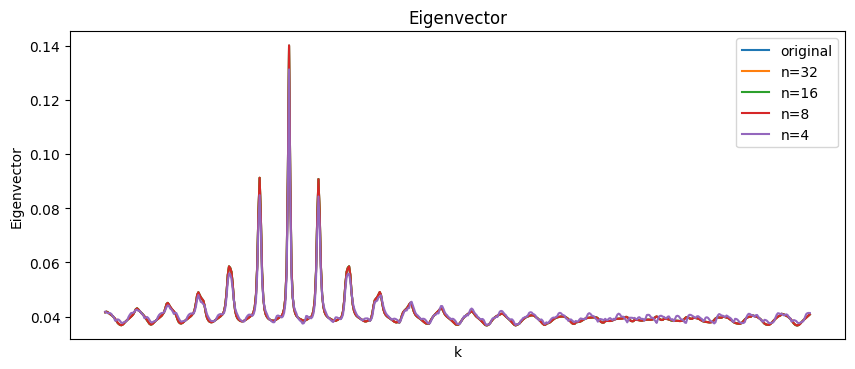

In [23]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

# ---